In [454]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd
import os# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
#from tarfile import TarFile

#TarFile.open("",'r')

#os.mkdir("/kaggle/working/image")
#os.mkdir("/kaggle/working/mask")
for i in ["/kaggle/working/image","/kaggle/working/mask"]:
    for j in os.listdir(i):
        os.unlink(os.path.join(i,j))
# Any results you write to the current directory are saved as output.

In [455]:
#from tarfile import TarFile
#TarFile.open("/kaggle/input/epithelium-segmentation/nuclei.tgz").extractall()

In [456]:
import matplotlib.pyplot as plt
import matplotlib.image as im
import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Activation,Input,BatchNormalization,Conv2DTranspose,concatenate
from keras.models import Sequential
from keras.utils import Sequence
from PIL import Image
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

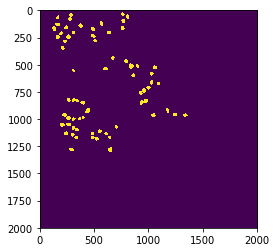

In [457]:
for i in os.listdir("/kaggle/working"):
    img = im.imread(os.path.join("/kaggle/working",i))
    plt.imshow(img)
    break

In [458]:
image_shape=img.shape
image_shape

(2000, 2000)

In [459]:
#os.mkdir("/kaggle/working/image")
#os.mkdir("/kaggle/working/mask")

In [460]:
#uncomment to make image,mask directory

image_path=[]
mask_path=[]

for i in os.listdir("/kaggle/working"):
    if "_original" in i:
        image_path.append(i)
    elif "_mask" in i:
        mask_path.append(i)
        

In [461]:
print(len(image_path),len(mask_path))

total_number_of_images = len(image_path)
path = "/kaggle/working"

141 141


In [462]:
class Data_Generator(Sequence):
    
    def __init__(self,path,image_path,batch_size=32,total_number_of_images=141,number_of_channels=3,
                  dim=(2000,2000),new_dim=(128,128)):
        self.path=path
        self.image_path=image_path
        self.batch_size = batch_size
        self.total_number_of_images=total_number_of_images
        self.number_of_channels=number_of_channels
        self.dim=dim
        self.new_dim=new_dim
        self.len = self.__len__()
    
    def __len__(self):
        return (self.total_number_of_images//self.batch_size)
    
    def __getitem__(self,index):
        img1 = self.get_image(os.path.join(self.path,self.image_path[index]))
        img2 = self.get_image(os.path.join(self.path,self.image_path[index]).replace("_original.tif","_mask.png"))
        
        self.patch_generator(img1,img2,self.image_path[index])
        
        
    
    def patch_generator(self,img1,img2,image_name):
        
        count  = 0 ;
        for i in range(128,self.dim[0],128):
            for j in range(128,self.dim[1],128):
                count =count + 1
                image = cv2.resize(img1[i-128:i,j-128:j],self.new_dim)
                mask = cv2.resize(img2[i-128:i,j-128:j],self.new_dim)
                cv2.imwrite(os.path.join(self.path+"/image",image_name).replace("_original.tif",str(count)+".png"),image)
                cv2.imwrite(os.path.join(self.path+"/mask",image_name).replace("_original.tif",str(count)+".png"),mask)
                
                #print(os.path.join(self.path+"/image",image_name).replace("_original.tif",str(count)+".png"))
                #print(os.path.join(self.path+"/mask",image_name).replace("_original.tif",str(count)+".png"))
             
                
            
    
    def get_image(self,path):
        img  = im.imread(path)
        #img = img/255
        
        return img

In [463]:
path = "/kaggle/working"
image_name = image_path[0]
count=1
print(os.path.join(path+"/image",image_name).replace(".tif",str(count)+".png"))
print(os.path.join(path+"/mask",image_name).replace("_original.tif","_mask"+str(count)+".png"))

/kaggle/working/image/14153_500_f00019_original1.png
/kaggle/working/mask/14153_500_f00019_mask1.png


In [464]:
data_generator = Data_Generator(path,image_path)

for i in range(total_number_of_images):
    data_generator.__getitem__(i)
    

/kaggle/working/image/14153_500_f000191.png
/kaggle/working/mask/14153_500_f000191.png
/kaggle/working/image/14153_500_f000192.png
/kaggle/working/mask/14153_500_f000192.png
/kaggle/working/image/14153_500_f000193.png
/kaggle/working/mask/14153_500_f000193.png
/kaggle/working/image/14153_500_f000194.png
/kaggle/working/mask/14153_500_f000194.png
/kaggle/working/image/14153_500_f000195.png
/kaggle/working/mask/14153_500_f000195.png
/kaggle/working/image/14153_500_f000196.png
/kaggle/working/mask/14153_500_f000196.png
/kaggle/working/image/14153_500_f000197.png
/kaggle/working/mask/14153_500_f000197.png
/kaggle/working/image/14153_500_f000198.png
/kaggle/working/mask/14153_500_f000198.png
/kaggle/working/image/14153_500_f000199.png
/kaggle/working/mask/14153_500_f000199.png
/kaggle/working/image/14153_500_f0001910.png
/kaggle/working/mask/14153_500_f0001910.png
/kaggle/working/image/14153_500_f0001911.png
/kaggle/working/mask/14153_500_f0001911.png
/kaggle/working/image/14153_500_f000191

/kaggle/working/mask/14153_500_f0001993.png
/kaggle/working/image/14153_500_f0001994.png
/kaggle/working/mask/14153_500_f0001994.png
/kaggle/working/image/14153_500_f0001995.png
/kaggle/working/mask/14153_500_f0001995.png
/kaggle/working/image/14153_500_f0001996.png
/kaggle/working/mask/14153_500_f0001996.png
/kaggle/working/image/14153_500_f0001997.png
/kaggle/working/mask/14153_500_f0001997.png
/kaggle/working/image/14153_500_f0001998.png
/kaggle/working/mask/14153_500_f0001998.png
/kaggle/working/image/14153_500_f0001999.png
/kaggle/working/mask/14153_500_f0001999.png
/kaggle/working/image/14153_500_f00019100.png
/kaggle/working/mask/14153_500_f00019100.png
/kaggle/working/image/14153_500_f00019101.png
/kaggle/working/mask/14153_500_f00019101.png
/kaggle/working/image/14153_500_f00019102.png
/kaggle/working/mask/14153_500_f00019102.png
/kaggle/working/image/14153_500_f00019103.png
/kaggle/working/mask/14153_500_f00019103.png
/kaggle/working/image/14153_500_f00019104.png
/kaggle/work

/kaggle/working/image/14153_500_f00019197.png
/kaggle/working/mask/14153_500_f00019197.png
/kaggle/working/image/14153_500_f00019198.png
/kaggle/working/mask/14153_500_f00019198.png
/kaggle/working/image/14153_500_f00019199.png
/kaggle/working/mask/14153_500_f00019199.png
/kaggle/working/image/14153_500_f00019200.png
/kaggle/working/mask/14153_500_f00019200.png
/kaggle/working/image/14153_500_f00019201.png
/kaggle/working/mask/14153_500_f00019201.png
/kaggle/working/image/14153_500_f00019202.png
/kaggle/working/mask/14153_500_f00019202.png
/kaggle/working/image/14153_500_f00019203.png
/kaggle/working/mask/14153_500_f00019203.png
/kaggle/working/image/14153_500_f00019204.png
/kaggle/working/mask/14153_500_f00019204.png
/kaggle/working/image/14153_500_f00019205.png
/kaggle/working/mask/14153_500_f00019205.png
/kaggle/working/image/14153_500_f00019206.png
/kaggle/working/mask/14153_500_f00019206.png
/kaggle/working/image/14153_500_f00019207.png
/kaggle/working/mask/14153_500_f00019207.png

/kaggle/working/mask/12931_500_f0005772.png
/kaggle/working/image/12931_500_f0005773.png
/kaggle/working/mask/12931_500_f0005773.png
/kaggle/working/image/12931_500_f0005774.png
/kaggle/working/mask/12931_500_f0005774.png
/kaggle/working/image/12931_500_f0005775.png
/kaggle/working/mask/12931_500_f0005775.png
/kaggle/working/image/12931_500_f0005776.png
/kaggle/working/mask/12931_500_f0005776.png
/kaggle/working/image/12931_500_f0005777.png
/kaggle/working/mask/12931_500_f0005777.png
/kaggle/working/image/12931_500_f0005778.png
/kaggle/working/mask/12931_500_f0005778.png
/kaggle/working/image/12931_500_f0005779.png
/kaggle/working/mask/12931_500_f0005779.png
/kaggle/working/image/12931_500_f0005780.png
/kaggle/working/mask/12931_500_f0005780.png
/kaggle/working/image/12931_500_f0005781.png
/kaggle/working/mask/12931_500_f0005781.png
/kaggle/working/image/12931_500_f0005782.png
/kaggle/working/mask/12931_500_f0005782.png
/kaggle/working/image/12931_500_f0005783.png
/kaggle/working/mask/

/kaggle/working/image/12931_500_f00057200.png
/kaggle/working/mask/12931_500_f00057200.png
/kaggle/working/image/12931_500_f00057201.png
/kaggle/working/mask/12931_500_f00057201.png
/kaggle/working/image/12931_500_f00057202.png
/kaggle/working/mask/12931_500_f00057202.png
/kaggle/working/image/12931_500_f00057203.png
/kaggle/working/mask/12931_500_f00057203.png
/kaggle/working/image/12931_500_f00057204.png
/kaggle/working/mask/12931_500_f00057204.png
/kaggle/working/image/12931_500_f00057205.png
/kaggle/working/mask/12931_500_f00057205.png
/kaggle/working/image/12931_500_f00057206.png
/kaggle/working/mask/12931_500_f00057206.png
/kaggle/working/image/12931_500_f00057207.png
/kaggle/working/mask/12931_500_f00057207.png
/kaggle/working/image/12931_500_f00057208.png
/kaggle/working/mask/12931_500_f00057208.png
/kaggle/working/image/12931_500_f00057209.png
/kaggle/working/mask/12931_500_f00057209.png
/kaggle/working/image/12931_500_f00057210.png
/kaggle/working/mask/12931_500_f00057210.png

/kaggle/working/image/9228_500_f0002376.png
/kaggle/working/mask/9228_500_f0002376.png
/kaggle/working/image/9228_500_f0002377.png
/kaggle/working/mask/9228_500_f0002377.png
/kaggle/working/image/9228_500_f0002378.png
/kaggle/working/mask/9228_500_f0002378.png
/kaggle/working/image/9228_500_f0002379.png
/kaggle/working/mask/9228_500_f0002379.png
/kaggle/working/image/9228_500_f0002380.png
/kaggle/working/mask/9228_500_f0002380.png
/kaggle/working/image/9228_500_f0002381.png
/kaggle/working/mask/9228_500_f0002381.png
/kaggle/working/image/9228_500_f0002382.png
/kaggle/working/mask/9228_500_f0002382.png
/kaggle/working/image/9228_500_f0002383.png
/kaggle/working/mask/9228_500_f0002383.png
/kaggle/working/image/9228_500_f0002384.png
/kaggle/working/mask/9228_500_f0002384.png
/kaggle/working/image/9228_500_f0002385.png
/kaggle/working/mask/9228_500_f0002385.png
/kaggle/working/image/9228_500_f0002386.png
/kaggle/working/mask/9228_500_f0002386.png
/kaggle/working/image/9228_500_f0002387.png

/kaggle/working/image/9228_500_f00023209.png
/kaggle/working/mask/9228_500_f00023209.png
/kaggle/working/image/9228_500_f00023210.png
/kaggle/working/mask/9228_500_f00023210.png
/kaggle/working/image/9228_500_f00023211.png
/kaggle/working/mask/9228_500_f00023211.png
/kaggle/working/image/9228_500_f00023212.png
/kaggle/working/mask/9228_500_f00023212.png
/kaggle/working/image/9228_500_f00023213.png
/kaggle/working/mask/9228_500_f00023213.png
/kaggle/working/image/9228_500_f00023214.png
/kaggle/working/mask/9228_500_f00023214.png
/kaggle/working/image/9228_500_f00023215.png
/kaggle/working/mask/9228_500_f00023215.png
/kaggle/working/image/9228_500_f00023216.png
/kaggle/working/mask/9228_500_f00023216.png
/kaggle/working/image/9228_500_f00023217.png
/kaggle/working/mask/9228_500_f00023217.png
/kaggle/working/image/9228_500_f00023218.png
/kaggle/working/mask/9228_500_f00023218.png
/kaggle/working/image/9228_500_f00023219.png
/kaggle/working/mask/9228_500_f00023219.png
/kaggle/working/image

/kaggle/working/image/12932_500_f0004079.png
/kaggle/working/mask/12932_500_f0004079.png
/kaggle/working/image/12932_500_f0004080.png
/kaggle/working/mask/12932_500_f0004080.png
/kaggle/working/image/12932_500_f0004081.png
/kaggle/working/mask/12932_500_f0004081.png
/kaggle/working/image/12932_500_f0004082.png
/kaggle/working/mask/12932_500_f0004082.png
/kaggle/working/image/12932_500_f0004083.png
/kaggle/working/mask/12932_500_f0004083.png
/kaggle/working/image/12932_500_f0004084.png
/kaggle/working/mask/12932_500_f0004084.png
/kaggle/working/image/12932_500_f0004085.png
/kaggle/working/mask/12932_500_f0004085.png
/kaggle/working/image/12932_500_f0004086.png
/kaggle/working/mask/12932_500_f0004086.png
/kaggle/working/image/12932_500_f0004087.png
/kaggle/working/mask/12932_500_f0004087.png
/kaggle/working/image/12932_500_f0004088.png
/kaggle/working/mask/12932_500_f0004088.png
/kaggle/working/image/12932_500_f0004089.png
/kaggle/working/mask/12932_500_f0004089.png
/kaggle/working/image

/kaggle/working/image/12932_500_f00040211.png
/kaggle/working/mask/12932_500_f00040211.png
/kaggle/working/image/12932_500_f00040212.png
/kaggle/working/mask/12932_500_f00040212.png
/kaggle/working/image/12932_500_f00040213.png
/kaggle/working/mask/12932_500_f00040213.png
/kaggle/working/image/12932_500_f00040214.png
/kaggle/working/mask/12932_500_f00040214.png
/kaggle/working/image/12932_500_f00040215.png
/kaggle/working/mask/12932_500_f00040215.png
/kaggle/working/image/12932_500_f00040216.png
/kaggle/working/mask/12932_500_f00040216.png
/kaggle/working/image/12932_500_f00040217.png
/kaggle/working/mask/12932_500_f00040217.png
/kaggle/working/image/12932_500_f00040218.png
/kaggle/working/mask/12932_500_f00040218.png
/kaggle/working/image/12932_500_f00040219.png
/kaggle/working/mask/12932_500_f00040219.png
/kaggle/working/image/12932_500_f00040220.png
/kaggle/working/mask/12932_500_f00040220.png
/kaggle/working/image/12932_500_f00040221.png
/kaggle/working/mask/12932_500_f00040221.png

/kaggle/working/image/10256_500_f0002087.png
/kaggle/working/mask/10256_500_f0002087.png
/kaggle/working/image/10256_500_f0002088.png
/kaggle/working/mask/10256_500_f0002088.png
/kaggle/working/image/10256_500_f0002089.png
/kaggle/working/mask/10256_500_f0002089.png
/kaggle/working/image/10256_500_f0002090.png
/kaggle/working/mask/10256_500_f0002090.png
/kaggle/working/image/10256_500_f0002091.png
/kaggle/working/mask/10256_500_f0002091.png
/kaggle/working/image/10256_500_f0002092.png
/kaggle/working/mask/10256_500_f0002092.png
/kaggle/working/image/10256_500_f0002093.png
/kaggle/working/mask/10256_500_f0002093.png
/kaggle/working/image/10256_500_f0002094.png
/kaggle/working/mask/10256_500_f0002094.png
/kaggle/working/image/10256_500_f0002095.png
/kaggle/working/mask/10256_500_f0002095.png
/kaggle/working/image/10256_500_f0002096.png
/kaggle/working/mask/10256_500_f0002096.png
/kaggle/working/image/10256_500_f0002097.png
/kaggle/working/mask/10256_500_f0002097.png
/kaggle/working/image

/kaggle/working/image/10256_500_f00020220.png
/kaggle/working/mask/10256_500_f00020220.png
/kaggle/working/image/10256_500_f00020221.png
/kaggle/working/mask/10256_500_f00020221.png
/kaggle/working/image/10256_500_f00020222.png
/kaggle/working/mask/10256_500_f00020222.png
/kaggle/working/image/10256_500_f00020223.png
/kaggle/working/mask/10256_500_f00020223.png
/kaggle/working/image/10256_500_f00020224.png
/kaggle/working/mask/10256_500_f00020224.png
/kaggle/working/image/10256_500_f00020225.png
/kaggle/working/mask/10256_500_f00020225.png
/kaggle/working/image/17113_500_f000391.png
/kaggle/working/mask/17113_500_f000391.png
/kaggle/working/image/17113_500_f000392.png
/kaggle/working/mask/17113_500_f000392.png
/kaggle/working/image/17113_500_f000393.png
/kaggle/working/mask/17113_500_f000393.png
/kaggle/working/image/17113_500_f000394.png
/kaggle/working/mask/17113_500_f000394.png
/kaggle/working/image/17113_500_f000395.png
/kaggle/working/mask/17113_500_f000395.png
/kaggle/working/ima

/kaggle/working/image/17113_500_f00039100.png
/kaggle/working/mask/17113_500_f00039100.png
/kaggle/working/image/17113_500_f00039101.png
/kaggle/working/mask/17113_500_f00039101.png
/kaggle/working/image/17113_500_f00039102.png
/kaggle/working/mask/17113_500_f00039102.png
/kaggle/working/image/17113_500_f00039103.png
/kaggle/working/mask/17113_500_f00039103.png
/kaggle/working/image/17113_500_f00039104.png
/kaggle/working/mask/17113_500_f00039104.png
/kaggle/working/image/17113_500_f00039105.png
/kaggle/working/mask/17113_500_f00039105.png
/kaggle/working/image/17113_500_f00039106.png
/kaggle/working/mask/17113_500_f00039106.png
/kaggle/working/image/17113_500_f00039107.png
/kaggle/working/mask/17113_500_f00039107.png
/kaggle/working/image/17113_500_f00039108.png
/kaggle/working/mask/17113_500_f00039108.png
/kaggle/working/image/17113_500_f00039109.png
/kaggle/working/mask/17113_500_f00039109.png
/kaggle/working/image/17113_500_f00039110.png
/kaggle/working/mask/17113_500_f00039110.png

/kaggle/working/image/17113_500_f00039224.png
/kaggle/working/mask/17113_500_f00039224.png
/kaggle/working/image/17113_500_f00039225.png
/kaggle/working/mask/17113_500_f00039225.png
/kaggle/working/image/12875_500_f000511.png
/kaggle/working/mask/12875_500_f000511.png
/kaggle/working/image/12875_500_f000512.png
/kaggle/working/mask/12875_500_f000512.png
/kaggle/working/image/12875_500_f000513.png
/kaggle/working/mask/12875_500_f000513.png
/kaggle/working/image/12875_500_f000514.png
/kaggle/working/mask/12875_500_f000514.png
/kaggle/working/image/12875_500_f000515.png
/kaggle/working/mask/12875_500_f000515.png
/kaggle/working/image/12875_500_f000516.png
/kaggle/working/mask/12875_500_f000516.png
/kaggle/working/image/12875_500_f000517.png
/kaggle/working/mask/12875_500_f000517.png
/kaggle/working/image/12875_500_f000518.png
/kaggle/working/mask/12875_500_f000518.png
/kaggle/working/image/12875_500_f000519.png
/kaggle/working/mask/12875_500_f000519.png
/kaggle/working/image/12875_500_f00

/kaggle/working/image/12875_500_f00051135.png
/kaggle/working/mask/12875_500_f00051135.png
/kaggle/working/image/12875_500_f00051136.png
/kaggle/working/mask/12875_500_f00051136.png
/kaggle/working/image/12875_500_f00051137.png
/kaggle/working/mask/12875_500_f00051137.png
/kaggle/working/image/12875_500_f00051138.png
/kaggle/working/mask/12875_500_f00051138.png
/kaggle/working/image/12875_500_f00051139.png
/kaggle/working/mask/12875_500_f00051139.png
/kaggle/working/image/12875_500_f00051140.png
/kaggle/working/mask/12875_500_f00051140.png
/kaggle/working/image/12875_500_f00051141.png
/kaggle/working/mask/12875_500_f00051141.png
/kaggle/working/image/12875_500_f00051142.png
/kaggle/working/mask/12875_500_f00051142.png
/kaggle/working/image/12875_500_f00051143.png
/kaggle/working/mask/12875_500_f00051143.png
/kaggle/working/image/12875_500_f00051144.png
/kaggle/working/mask/12875_500_f00051144.png
/kaggle/working/image/12875_500_f00051145.png
/kaggle/working/mask/12875_500_f00051145.png

/kaggle/working/image/25744_500_f000775.png
/kaggle/working/mask/25744_500_f000775.png
/kaggle/working/image/25744_500_f000776.png
/kaggle/working/mask/25744_500_f000776.png
/kaggle/working/image/25744_500_f000777.png
/kaggle/working/mask/25744_500_f000777.png
/kaggle/working/image/25744_500_f000778.png
/kaggle/working/mask/25744_500_f000778.png
/kaggle/working/image/25744_500_f000779.png
/kaggle/working/mask/25744_500_f000779.png
/kaggle/working/image/25744_500_f0007710.png
/kaggle/working/mask/25744_500_f0007710.png
/kaggle/working/image/25744_500_f0007711.png
/kaggle/working/mask/25744_500_f0007711.png
/kaggle/working/image/25744_500_f0007712.png
/kaggle/working/mask/25744_500_f0007712.png
/kaggle/working/image/25744_500_f0007713.png
/kaggle/working/mask/25744_500_f0007713.png
/kaggle/working/image/25744_500_f0007714.png
/kaggle/working/mask/25744_500_f0007714.png
/kaggle/working/image/25744_500_f0007715.png
/kaggle/working/mask/25744_500_f0007715.png
/kaggle/working/image/25744_500

/kaggle/working/image/25744_500_f00077132.png
/kaggle/working/mask/25744_500_f00077132.png
/kaggle/working/image/25744_500_f00077133.png
/kaggle/working/mask/25744_500_f00077133.png
/kaggle/working/image/25744_500_f00077134.png
/kaggle/working/mask/25744_500_f00077134.png
/kaggle/working/image/25744_500_f00077135.png
/kaggle/working/mask/25744_500_f00077135.png
/kaggle/working/image/25744_500_f00077136.png
/kaggle/working/mask/25744_500_f00077136.png
/kaggle/working/image/25744_500_f00077137.png
/kaggle/working/mask/25744_500_f00077137.png
/kaggle/working/image/25744_500_f00077138.png
/kaggle/working/mask/25744_500_f00077138.png
/kaggle/working/image/25744_500_f00077139.png
/kaggle/working/mask/25744_500_f00077139.png
/kaggle/working/image/25744_500_f00077140.png
/kaggle/working/mask/25744_500_f00077140.png
/kaggle/working/image/25744_500_f00077141.png
/kaggle/working/mask/25744_500_f00077141.png
/kaggle/working/image/25744_500_f00077142.png
/kaggle/working/mask/25744_500_f00077142.png

/kaggle/working/image/14081_500_f000463.png
/kaggle/working/mask/14081_500_f000463.png
/kaggle/working/image/14081_500_f000464.png
/kaggle/working/mask/14081_500_f000464.png
/kaggle/working/image/14081_500_f000465.png
/kaggle/working/mask/14081_500_f000465.png
/kaggle/working/image/14081_500_f000466.png
/kaggle/working/mask/14081_500_f000466.png
/kaggle/working/image/14081_500_f000467.png
/kaggle/working/mask/14081_500_f000467.png
/kaggle/working/image/14081_500_f000468.png
/kaggle/working/mask/14081_500_f000468.png
/kaggle/working/image/14081_500_f000469.png
/kaggle/working/mask/14081_500_f000469.png
/kaggle/working/image/14081_500_f0004610.png
/kaggle/working/mask/14081_500_f0004610.png
/kaggle/working/image/14081_500_f0004611.png
/kaggle/working/mask/14081_500_f0004611.png
/kaggle/working/image/14081_500_f0004612.png
/kaggle/working/mask/14081_500_f0004612.png
/kaggle/working/image/14081_500_f0004613.png
/kaggle/working/mask/14081_500_f0004613.png
/kaggle/working/image/14081_500_f00

/kaggle/working/mask/14081_500_f00046130.png
/kaggle/working/image/14081_500_f00046131.png
/kaggle/working/mask/14081_500_f00046131.png
/kaggle/working/image/14081_500_f00046132.png
/kaggle/working/mask/14081_500_f00046132.png
/kaggle/working/image/14081_500_f00046133.png
/kaggle/working/mask/14081_500_f00046133.png
/kaggle/working/image/14081_500_f00046134.png
/kaggle/working/mask/14081_500_f00046134.png
/kaggle/working/image/14081_500_f00046135.png
/kaggle/working/mask/14081_500_f00046135.png
/kaggle/working/image/14081_500_f00046136.png
/kaggle/working/mask/14081_500_f00046136.png
/kaggle/working/image/14081_500_f00046137.png
/kaggle/working/mask/14081_500_f00046137.png
/kaggle/working/image/14081_500_f00046138.png
/kaggle/working/mask/14081_500_f00046138.png
/kaggle/working/image/14081_500_f00046139.png
/kaggle/working/mask/14081_500_f00046139.png
/kaggle/working/image/14081_500_f00046140.png
/kaggle/working/mask/14081_500_f00046140.png
/kaggle/working/image/14081_500_f00046141.png

/kaggle/working/image/12826_500_f000307.png
/kaggle/working/mask/12826_500_f000307.png
/kaggle/working/image/12826_500_f000308.png
/kaggle/working/mask/12826_500_f000308.png
/kaggle/working/image/12826_500_f000309.png
/kaggle/working/mask/12826_500_f000309.png
/kaggle/working/image/12826_500_f0003010.png
/kaggle/working/mask/12826_500_f0003010.png
/kaggle/working/image/12826_500_f0003011.png
/kaggle/working/mask/12826_500_f0003011.png
/kaggle/working/image/12826_500_f0003012.png
/kaggle/working/mask/12826_500_f0003012.png
/kaggle/working/image/12826_500_f0003013.png
/kaggle/working/mask/12826_500_f0003013.png
/kaggle/working/image/12826_500_f0003014.png
/kaggle/working/mask/12826_500_f0003014.png
/kaggle/working/image/12826_500_f0003015.png
/kaggle/working/mask/12826_500_f0003015.png
/kaggle/working/image/12826_500_f0003016.png
/kaggle/working/mask/12826_500_f0003016.png
/kaggle/working/image/12826_500_f0003017.png
/kaggle/working/mask/12826_500_f0003017.png
/kaggle/working/image/12826

/kaggle/working/image/12826_500_f00030140.png
/kaggle/working/mask/12826_500_f00030140.png
/kaggle/working/image/12826_500_f00030141.png
/kaggle/working/mask/12826_500_f00030141.png
/kaggle/working/image/12826_500_f00030142.png
/kaggle/working/mask/12826_500_f00030142.png
/kaggle/working/image/12826_500_f00030143.png
/kaggle/working/mask/12826_500_f00030143.png
/kaggle/working/image/12826_500_f00030144.png
/kaggle/working/mask/12826_500_f00030144.png
/kaggle/working/image/12826_500_f00030145.png
/kaggle/working/mask/12826_500_f00030145.png
/kaggle/working/image/12826_500_f00030146.png
/kaggle/working/mask/12826_500_f00030146.png
/kaggle/working/image/12826_500_f00030147.png
/kaggle/working/mask/12826_500_f00030147.png
/kaggle/working/image/12826_500_f00030148.png
/kaggle/working/mask/12826_500_f00030148.png
/kaggle/working/image/12826_500_f00030149.png
/kaggle/working/mask/12826_500_f00030149.png
/kaggle/working/image/12826_500_f00030150.png
/kaggle/working/mask/12826_500_f00030150.png

/kaggle/working/image/13591_500_f0000617.png
/kaggle/working/mask/13591_500_f0000617.png
/kaggle/working/image/13591_500_f0000618.png
/kaggle/working/mask/13591_500_f0000618.png
/kaggle/working/image/13591_500_f0000619.png
/kaggle/working/mask/13591_500_f0000619.png
/kaggle/working/image/13591_500_f0000620.png
/kaggle/working/mask/13591_500_f0000620.png
/kaggle/working/image/13591_500_f0000621.png
/kaggle/working/mask/13591_500_f0000621.png
/kaggle/working/image/13591_500_f0000622.png
/kaggle/working/mask/13591_500_f0000622.png
/kaggle/working/image/13591_500_f0000623.png
/kaggle/working/mask/13591_500_f0000623.png
/kaggle/working/image/13591_500_f0000624.png
/kaggle/working/mask/13591_500_f0000624.png
/kaggle/working/image/13591_500_f0000625.png
/kaggle/working/mask/13591_500_f0000625.png
/kaggle/working/image/13591_500_f0000626.png
/kaggle/working/mask/13591_500_f0000626.png
/kaggle/working/image/13591_500_f0000627.png
/kaggle/working/mask/13591_500_f0000627.png
/kaggle/working/image

/kaggle/working/image/13591_500_f00006148.png
/kaggle/working/mask/13591_500_f00006148.png
/kaggle/working/image/13591_500_f00006149.png
/kaggle/working/mask/13591_500_f00006149.png
/kaggle/working/image/13591_500_f00006150.png
/kaggle/working/mask/13591_500_f00006150.png
/kaggle/working/image/13591_500_f00006151.png
/kaggle/working/mask/13591_500_f00006151.png
/kaggle/working/image/13591_500_f00006152.png
/kaggle/working/mask/13591_500_f00006152.png
/kaggle/working/image/13591_500_f00006153.png
/kaggle/working/mask/13591_500_f00006153.png
/kaggle/working/image/13591_500_f00006154.png
/kaggle/working/mask/13591_500_f00006154.png
/kaggle/working/image/13591_500_f00006155.png
/kaggle/working/mask/13591_500_f00006155.png
/kaggle/working/image/13591_500_f00006156.png
/kaggle/working/mask/13591_500_f00006156.png
/kaggle/working/image/13591_500_f00006157.png
/kaggle/working/mask/13591_500_f00006157.png
/kaggle/working/image/13591_500_f00006158.png
/kaggle/working/mask/13591_500_f00006158.png

/kaggle/working/image/17887_500_f0001823.png
/kaggle/working/mask/17887_500_f0001823.png
/kaggle/working/image/17887_500_f0001824.png
/kaggle/working/mask/17887_500_f0001824.png
/kaggle/working/image/17887_500_f0001825.png
/kaggle/working/mask/17887_500_f0001825.png
/kaggle/working/image/17887_500_f0001826.png
/kaggle/working/mask/17887_500_f0001826.png
/kaggle/working/image/17887_500_f0001827.png
/kaggle/working/mask/17887_500_f0001827.png
/kaggle/working/image/17887_500_f0001828.png
/kaggle/working/mask/17887_500_f0001828.png
/kaggle/working/image/17887_500_f0001829.png
/kaggle/working/mask/17887_500_f0001829.png
/kaggle/working/image/17887_500_f0001830.png
/kaggle/working/mask/17887_500_f0001830.png
/kaggle/working/image/17887_500_f0001831.png
/kaggle/working/mask/17887_500_f0001831.png
/kaggle/working/image/17887_500_f0001832.png
/kaggle/working/mask/17887_500_f0001832.png
/kaggle/working/image/17887_500_f0001833.png
/kaggle/working/mask/17887_500_f0001833.png
/kaggle/working/image

/kaggle/working/image/17887_500_f00018127.png
/kaggle/working/mask/17887_500_f00018127.png
/kaggle/working/image/17887_500_f00018128.png
/kaggle/working/mask/17887_500_f00018128.png
/kaggle/working/image/17887_500_f00018129.png
/kaggle/working/mask/17887_500_f00018129.png
/kaggle/working/image/17887_500_f00018130.png
/kaggle/working/mask/17887_500_f00018130.png
/kaggle/working/image/17887_500_f00018131.png
/kaggle/working/mask/17887_500_f00018131.png
/kaggle/working/image/17887_500_f00018132.png
/kaggle/working/mask/17887_500_f00018132.png
/kaggle/working/image/17887_500_f00018133.png
/kaggle/working/mask/17887_500_f00018133.png
/kaggle/working/image/17887_500_f00018134.png
/kaggle/working/mask/17887_500_f00018134.png
/kaggle/working/image/17887_500_f00018135.png
/kaggle/working/mask/17887_500_f00018135.png
/kaggle/working/image/17887_500_f00018136.png
/kaggle/working/mask/17887_500_f00018136.png
/kaggle/working/image/17887_500_f00018137.png
/kaggle/working/mask/17887_500_f00018137.png

/kaggle/working/image/12626_500_f000436.png
/kaggle/working/mask/12626_500_f000436.png
/kaggle/working/image/12626_500_f000437.png
/kaggle/working/mask/12626_500_f000437.png
/kaggle/working/image/12626_500_f000438.png
/kaggle/working/mask/12626_500_f000438.png
/kaggle/working/image/12626_500_f000439.png
/kaggle/working/mask/12626_500_f000439.png
/kaggle/working/image/12626_500_f0004310.png
/kaggle/working/mask/12626_500_f0004310.png
/kaggle/working/image/12626_500_f0004311.png
/kaggle/working/mask/12626_500_f0004311.png
/kaggle/working/image/12626_500_f0004312.png
/kaggle/working/mask/12626_500_f0004312.png
/kaggle/working/image/12626_500_f0004313.png
/kaggle/working/mask/12626_500_f0004313.png
/kaggle/working/image/12626_500_f0004314.png
/kaggle/working/mask/12626_500_f0004314.png
/kaggle/working/image/12626_500_f0004315.png
/kaggle/working/mask/12626_500_f0004315.png
/kaggle/working/image/12626_500_f0004316.png
/kaggle/working/mask/12626_500_f0004316.png
/kaggle/working/image/12626_5

/kaggle/working/image/12626_500_f00043139.png
/kaggle/working/mask/12626_500_f00043139.png
/kaggle/working/image/12626_500_f00043140.png
/kaggle/working/mask/12626_500_f00043140.png
/kaggle/working/image/12626_500_f00043141.png
/kaggle/working/mask/12626_500_f00043141.png
/kaggle/working/image/12626_500_f00043142.png
/kaggle/working/mask/12626_500_f00043142.png
/kaggle/working/image/12626_500_f00043143.png
/kaggle/working/mask/12626_500_f00043143.png
/kaggle/working/image/12626_500_f00043144.png
/kaggle/working/mask/12626_500_f00043144.png
/kaggle/working/image/12626_500_f00043145.png
/kaggle/working/mask/12626_500_f00043145.png
/kaggle/working/image/12626_500_f00043146.png
/kaggle/working/mask/12626_500_f00043146.png
/kaggle/working/image/12626_500_f00043147.png
/kaggle/working/mask/12626_500_f00043147.png
/kaggle/working/image/12626_500_f00043148.png
/kaggle/working/mask/12626_500_f00043148.png
/kaggle/working/image/12626_500_f00043149.png
/kaggle/working/mask/12626_500_f00043149.png

/kaggle/working/image/25293_500_f0000920.png
/kaggle/working/mask/25293_500_f0000920.png
/kaggle/working/image/25293_500_f0000921.png
/kaggle/working/mask/25293_500_f0000921.png
/kaggle/working/image/25293_500_f0000922.png
/kaggle/working/mask/25293_500_f0000922.png
/kaggle/working/image/25293_500_f0000923.png
/kaggle/working/mask/25293_500_f0000923.png
/kaggle/working/image/25293_500_f0000924.png
/kaggle/working/mask/25293_500_f0000924.png
/kaggle/working/image/25293_500_f0000925.png
/kaggle/working/mask/25293_500_f0000925.png
/kaggle/working/image/25293_500_f0000926.png
/kaggle/working/mask/25293_500_f0000926.png
/kaggle/working/image/25293_500_f0000927.png
/kaggle/working/mask/25293_500_f0000927.png
/kaggle/working/image/25293_500_f0000928.png
/kaggle/working/mask/25293_500_f0000928.png
/kaggle/working/image/25293_500_f0000929.png
/kaggle/working/mask/25293_500_f0000929.png
/kaggle/working/image/25293_500_f0000930.png
/kaggle/working/mask/25293_500_f0000930.png
/kaggle/working/image

/kaggle/working/image/25293_500_f00009126.png
/kaggle/working/mask/25293_500_f00009126.png
/kaggle/working/image/25293_500_f00009127.png
/kaggle/working/mask/25293_500_f00009127.png
/kaggle/working/image/25293_500_f00009128.png
/kaggle/working/mask/25293_500_f00009128.png
/kaggle/working/image/25293_500_f00009129.png
/kaggle/working/mask/25293_500_f00009129.png
/kaggle/working/image/25293_500_f00009130.png
/kaggle/working/mask/25293_500_f00009130.png
/kaggle/working/image/25293_500_f00009131.png
/kaggle/working/mask/25293_500_f00009131.png
/kaggle/working/image/25293_500_f00009132.png
/kaggle/working/mask/25293_500_f00009132.png
/kaggle/working/image/25293_500_f00009133.png
/kaggle/working/mask/25293_500_f00009133.png
/kaggle/working/image/25293_500_f00009134.png
/kaggle/working/mask/25293_500_f00009134.png
/kaggle/working/image/25293_500_f00009135.png
/kaggle/working/mask/25293_500_f00009135.png
/kaggle/working/image/25293_500_f00009136.png
/kaggle/working/mask/25293_500_f00009136.png

/kaggle/working/image/8917_500_f000731.png
/kaggle/working/mask/8917_500_f000731.png
/kaggle/working/image/8917_500_f000732.png
/kaggle/working/mask/8917_500_f000732.png
/kaggle/working/image/8917_500_f000733.png
/kaggle/working/mask/8917_500_f000733.png
/kaggle/working/image/8917_500_f000734.png
/kaggle/working/mask/8917_500_f000734.png
/kaggle/working/image/8917_500_f000735.png
/kaggle/working/mask/8917_500_f000735.png
/kaggle/working/image/8917_500_f000736.png
/kaggle/working/mask/8917_500_f000736.png
/kaggle/working/image/8917_500_f000737.png
/kaggle/working/mask/8917_500_f000737.png
/kaggle/working/image/8917_500_f000738.png
/kaggle/working/mask/8917_500_f000738.png
/kaggle/working/image/8917_500_f000739.png
/kaggle/working/mask/8917_500_f000739.png
/kaggle/working/image/8917_500_f0007310.png
/kaggle/working/mask/8917_500_f0007310.png
/kaggle/working/image/8917_500_f0007311.png
/kaggle/working/mask/8917_500_f0007311.png
/kaggle/working/image/8917_500_f0007312.png
/kaggle/working/m

/kaggle/working/image/8917_500_f00073137.png
/kaggle/working/mask/8917_500_f00073137.png
/kaggle/working/image/8917_500_f00073138.png
/kaggle/working/mask/8917_500_f00073138.png
/kaggle/working/image/8917_500_f00073139.png
/kaggle/working/mask/8917_500_f00073139.png
/kaggle/working/image/8917_500_f00073140.png
/kaggle/working/mask/8917_500_f00073140.png
/kaggle/working/image/8917_500_f00073141.png
/kaggle/working/mask/8917_500_f00073141.png
/kaggle/working/image/8917_500_f00073142.png
/kaggle/working/mask/8917_500_f00073142.png
/kaggle/working/image/8917_500_f00073143.png
/kaggle/working/mask/8917_500_f00073143.png
/kaggle/working/image/8917_500_f00073144.png
/kaggle/working/mask/8917_500_f00073144.png
/kaggle/working/image/8917_500_f00073145.png
/kaggle/working/mask/8917_500_f00073145.png
/kaggle/working/image/8917_500_f00073146.png
/kaggle/working/mask/8917_500_f00073146.png
/kaggle/working/image/8917_500_f00073147.png
/kaggle/working/mask/8917_500_f00073147.png
/kaggle/working/image

/kaggle/working/image/10264_500_f0031816.png
/kaggle/working/mask/10264_500_f0031816.png
/kaggle/working/image/10264_500_f0031817.png
/kaggle/working/mask/10264_500_f0031817.png
/kaggle/working/image/10264_500_f0031818.png
/kaggle/working/mask/10264_500_f0031818.png
/kaggle/working/image/10264_500_f0031819.png
/kaggle/working/mask/10264_500_f0031819.png
/kaggle/working/image/10264_500_f0031820.png
/kaggle/working/mask/10264_500_f0031820.png
/kaggle/working/image/10264_500_f0031821.png
/kaggle/working/mask/10264_500_f0031821.png
/kaggle/working/image/10264_500_f0031822.png
/kaggle/working/mask/10264_500_f0031822.png
/kaggle/working/image/10264_500_f0031823.png
/kaggle/working/mask/10264_500_f0031823.png
/kaggle/working/image/10264_500_f0031824.png
/kaggle/working/mask/10264_500_f0031824.png
/kaggle/working/image/10264_500_f0031825.png
/kaggle/working/mask/10264_500_f0031825.png
/kaggle/working/image/10264_500_f0031826.png
/kaggle/working/mask/10264_500_f0031826.png
/kaggle/working/image

/kaggle/working/image/10264_500_f00318149.png
/kaggle/working/mask/10264_500_f00318149.png
/kaggle/working/image/10264_500_f00318150.png
/kaggle/working/mask/10264_500_f00318150.png
/kaggle/working/image/10264_500_f00318151.png
/kaggle/working/mask/10264_500_f00318151.png
/kaggle/working/image/10264_500_f00318152.png
/kaggle/working/mask/10264_500_f00318152.png
/kaggle/working/image/10264_500_f00318153.png
/kaggle/working/mask/10264_500_f00318153.png
/kaggle/working/image/10264_500_f00318154.png
/kaggle/working/mask/10264_500_f00318154.png
/kaggle/working/image/10264_500_f00318155.png
/kaggle/working/mask/10264_500_f00318155.png
/kaggle/working/image/10264_500_f00318156.png
/kaggle/working/mask/10264_500_f00318156.png
/kaggle/working/image/10264_500_f00318157.png
/kaggle/working/mask/10264_500_f00318157.png
/kaggle/working/image/10264_500_f00318158.png
/kaggle/working/mask/10264_500_f00318158.png
/kaggle/working/image/10264_500_f00318159.png
/kaggle/working/mask/10264_500_f00318159.png

/kaggle/working/image/13459_500_f0002022.png
/kaggle/working/mask/13459_500_f0002022.png
/kaggle/working/image/13459_500_f0002023.png
/kaggle/working/mask/13459_500_f0002023.png
/kaggle/working/image/13459_500_f0002024.png
/kaggle/working/mask/13459_500_f0002024.png
/kaggle/working/image/13459_500_f0002025.png
/kaggle/working/mask/13459_500_f0002025.png
/kaggle/working/image/13459_500_f0002026.png
/kaggle/working/mask/13459_500_f0002026.png
/kaggle/working/image/13459_500_f0002027.png
/kaggle/working/mask/13459_500_f0002027.png
/kaggle/working/image/13459_500_f0002028.png
/kaggle/working/mask/13459_500_f0002028.png
/kaggle/working/image/13459_500_f0002029.png
/kaggle/working/mask/13459_500_f0002029.png
/kaggle/working/image/13459_500_f0002030.png
/kaggle/working/mask/13459_500_f0002030.png
/kaggle/working/image/13459_500_f0002031.png
/kaggle/working/mask/13459_500_f0002031.png
/kaggle/working/image/13459_500_f0002032.png
/kaggle/working/mask/13459_500_f0002032.png
/kaggle/working/image

/kaggle/working/image/13459_500_f00020160.png
/kaggle/working/mask/13459_500_f00020160.png
/kaggle/working/image/13459_500_f00020161.png
/kaggle/working/mask/13459_500_f00020161.png
/kaggle/working/image/13459_500_f00020162.png
/kaggle/working/mask/13459_500_f00020162.png
/kaggle/working/image/13459_500_f00020163.png
/kaggle/working/mask/13459_500_f00020163.png
/kaggle/working/image/13459_500_f00020164.png
/kaggle/working/mask/13459_500_f00020164.png
/kaggle/working/image/13459_500_f00020165.png
/kaggle/working/mask/13459_500_f00020165.png
/kaggle/working/image/13459_500_f00020166.png
/kaggle/working/mask/13459_500_f00020166.png
/kaggle/working/image/13459_500_f00020167.png
/kaggle/working/mask/13459_500_f00020167.png
/kaggle/working/image/13459_500_f00020168.png
/kaggle/working/mask/13459_500_f00020168.png
/kaggle/working/image/13459_500_f00020169.png
/kaggle/working/mask/13459_500_f00020169.png
/kaggle/working/image/13459_500_f00020170.png
/kaggle/working/mask/13459_500_f00020170.png

/kaggle/working/image/14306_500_f0001235.png
/kaggle/working/mask/14306_500_f0001235.png
/kaggle/working/image/14306_500_f0001236.png
/kaggle/working/mask/14306_500_f0001236.png
/kaggle/working/image/14306_500_f0001237.png
/kaggle/working/mask/14306_500_f0001237.png
/kaggle/working/image/14306_500_f0001238.png
/kaggle/working/mask/14306_500_f0001238.png
/kaggle/working/image/14306_500_f0001239.png
/kaggle/working/mask/14306_500_f0001239.png
/kaggle/working/image/14306_500_f0001240.png
/kaggle/working/mask/14306_500_f0001240.png
/kaggle/working/image/14306_500_f0001241.png
/kaggle/working/mask/14306_500_f0001241.png
/kaggle/working/image/14306_500_f0001242.png
/kaggle/working/mask/14306_500_f0001242.png
/kaggle/working/image/14306_500_f0001243.png
/kaggle/working/mask/14306_500_f0001243.png
/kaggle/working/image/14306_500_f0001244.png
/kaggle/working/mask/14306_500_f0001244.png
/kaggle/working/image/14306_500_f0001245.png
/kaggle/working/mask/14306_500_f0001245.png
/kaggle/working/image

/kaggle/working/image/14306_500_f00012163.png
/kaggle/working/mask/14306_500_f00012163.png
/kaggle/working/image/14306_500_f00012164.png
/kaggle/working/mask/14306_500_f00012164.png
/kaggle/working/image/14306_500_f00012165.png
/kaggle/working/mask/14306_500_f00012165.png
/kaggle/working/image/14306_500_f00012166.png
/kaggle/working/mask/14306_500_f00012166.png
/kaggle/working/image/14306_500_f00012167.png
/kaggle/working/mask/14306_500_f00012167.png
/kaggle/working/image/14306_500_f00012168.png
/kaggle/working/mask/14306_500_f00012168.png
/kaggle/working/image/14306_500_f00012169.png
/kaggle/working/mask/14306_500_f00012169.png
/kaggle/working/image/14306_500_f00012170.png
/kaggle/working/mask/14306_500_f00012170.png
/kaggle/working/image/14306_500_f00012171.png
/kaggle/working/mask/14306_500_f00012171.png
/kaggle/working/image/14306_500_f00012172.png
/kaggle/working/mask/14306_500_f00012172.png
/kaggle/working/image/14306_500_f00012173.png
/kaggle/working/mask/14306_500_f00012173.png

/kaggle/working/image/9024_500_f0001541.png
/kaggle/working/mask/9024_500_f0001541.png
/kaggle/working/image/9024_500_f0001542.png
/kaggle/working/mask/9024_500_f0001542.png
/kaggle/working/image/9024_500_f0001543.png
/kaggle/working/mask/9024_500_f0001543.png
/kaggle/working/image/9024_500_f0001544.png
/kaggle/working/mask/9024_500_f0001544.png
/kaggle/working/image/9024_500_f0001545.png
/kaggle/working/mask/9024_500_f0001545.png
/kaggle/working/image/9024_500_f0001546.png
/kaggle/working/mask/9024_500_f0001546.png
/kaggle/working/image/9024_500_f0001547.png
/kaggle/working/mask/9024_500_f0001547.png
/kaggle/working/image/9024_500_f0001548.png
/kaggle/working/mask/9024_500_f0001548.png
/kaggle/working/image/9024_500_f0001549.png
/kaggle/working/mask/9024_500_f0001549.png
/kaggle/working/image/9024_500_f0001550.png
/kaggle/working/mask/9024_500_f0001550.png
/kaggle/working/image/9024_500_f0001551.png
/kaggle/working/mask/9024_500_f0001551.png
/kaggle/working/image/9024_500_f0001552.png

/kaggle/working/image/9024_500_f00015173.png
/kaggle/working/mask/9024_500_f00015173.png
/kaggle/working/image/9024_500_f00015174.png
/kaggle/working/mask/9024_500_f00015174.png
/kaggle/working/image/9024_500_f00015175.png
/kaggle/working/mask/9024_500_f00015175.png
/kaggle/working/image/9024_500_f00015176.png
/kaggle/working/mask/9024_500_f00015176.png
/kaggle/working/image/9024_500_f00015177.png
/kaggle/working/mask/9024_500_f00015177.png
/kaggle/working/image/9024_500_f00015178.png
/kaggle/working/mask/9024_500_f00015178.png
/kaggle/working/image/9024_500_f00015179.png
/kaggle/working/mask/9024_500_f00015179.png
/kaggle/working/image/9024_500_f00015180.png
/kaggle/working/mask/9024_500_f00015180.png
/kaggle/working/image/9024_500_f00015181.png
/kaggle/working/mask/9024_500_f00015181.png
/kaggle/working/image/9024_500_f00015182.png
/kaggle/working/mask/9024_500_f00015182.png
/kaggle/working/image/9024_500_f00015183.png
/kaggle/working/mask/9024_500_f00015183.png
/kaggle/working/image

/kaggle/working/image/15633_500_f0067751.png
/kaggle/working/mask/15633_500_f0067751.png
/kaggle/working/image/15633_500_f0067752.png
/kaggle/working/mask/15633_500_f0067752.png
/kaggle/working/image/15633_500_f0067753.png
/kaggle/working/mask/15633_500_f0067753.png
/kaggle/working/image/15633_500_f0067754.png
/kaggle/working/mask/15633_500_f0067754.png
/kaggle/working/image/15633_500_f0067755.png
/kaggle/working/mask/15633_500_f0067755.png
/kaggle/working/image/15633_500_f0067756.png
/kaggle/working/mask/15633_500_f0067756.png
/kaggle/working/image/15633_500_f0067757.png
/kaggle/working/mask/15633_500_f0067757.png
/kaggle/working/image/15633_500_f0067758.png
/kaggle/working/mask/15633_500_f0067758.png
/kaggle/working/image/15633_500_f0067759.png
/kaggle/working/mask/15633_500_f0067759.png
/kaggle/working/image/15633_500_f0067760.png
/kaggle/working/mask/15633_500_f0067760.png
/kaggle/working/image/15633_500_f0067761.png
/kaggle/working/mask/15633_500_f0067761.png
/kaggle/working/image

/kaggle/working/image/15633_500_f00677183.png
/kaggle/working/mask/15633_500_f00677183.png
/kaggle/working/image/15633_500_f00677184.png
/kaggle/working/mask/15633_500_f00677184.png
/kaggle/working/image/15633_500_f00677185.png
/kaggle/working/mask/15633_500_f00677185.png
/kaggle/working/image/15633_500_f00677186.png
/kaggle/working/mask/15633_500_f00677186.png
/kaggle/working/image/15633_500_f00677187.png
/kaggle/working/mask/15633_500_f00677187.png
/kaggle/working/image/15633_500_f00677188.png
/kaggle/working/mask/15633_500_f00677188.png
/kaggle/working/image/15633_500_f00677189.png
/kaggle/working/mask/15633_500_f00677189.png
/kaggle/working/image/15633_500_f00677190.png
/kaggle/working/mask/15633_500_f00677190.png
/kaggle/working/image/15633_500_f00677191.png
/kaggle/working/mask/15633_500_f00677191.png
/kaggle/working/image/15633_500_f00677192.png
/kaggle/working/mask/15633_500_f00677192.png
/kaggle/working/image/15633_500_f00677193.png
/kaggle/working/mask/15633_500_f00677193.png

/kaggle/working/image/13687_500_f0000162.png
/kaggle/working/mask/13687_500_f0000162.png
/kaggle/working/image/13687_500_f0000163.png
/kaggle/working/mask/13687_500_f0000163.png
/kaggle/working/image/13687_500_f0000164.png
/kaggle/working/mask/13687_500_f0000164.png
/kaggle/working/image/13687_500_f0000165.png
/kaggle/working/mask/13687_500_f0000165.png
/kaggle/working/image/13687_500_f0000166.png
/kaggle/working/mask/13687_500_f0000166.png
/kaggle/working/image/13687_500_f0000167.png
/kaggle/working/mask/13687_500_f0000167.png
/kaggle/working/image/13687_500_f0000168.png
/kaggle/working/mask/13687_500_f0000168.png
/kaggle/working/image/13687_500_f0000169.png
/kaggle/working/mask/13687_500_f0000169.png
/kaggle/working/image/13687_500_f0000170.png
/kaggle/working/mask/13687_500_f0000170.png
/kaggle/working/image/13687_500_f0000171.png
/kaggle/working/mask/13687_500_f0000171.png
/kaggle/working/image/13687_500_f0000172.png
/kaggle/working/mask/13687_500_f0000172.png
/kaggle/working/image

/kaggle/working/image/13687_500_f00001189.png
/kaggle/working/mask/13687_500_f00001189.png
/kaggle/working/image/13687_500_f00001190.png
/kaggle/working/mask/13687_500_f00001190.png
/kaggle/working/image/13687_500_f00001191.png
/kaggle/working/mask/13687_500_f00001191.png
/kaggle/working/image/13687_500_f00001192.png
/kaggle/working/mask/13687_500_f00001192.png
/kaggle/working/image/13687_500_f00001193.png
/kaggle/working/mask/13687_500_f00001193.png
/kaggle/working/image/13687_500_f00001194.png
/kaggle/working/mask/13687_500_f00001194.png
/kaggle/working/image/13687_500_f00001195.png
/kaggle/working/mask/13687_500_f00001195.png
/kaggle/working/image/13687_500_f00001196.png
/kaggle/working/mask/13687_500_f00001196.png
/kaggle/working/image/13687_500_f00001197.png
/kaggle/working/mask/13687_500_f00001197.png
/kaggle/working/image/13687_500_f00001198.png
/kaggle/working/mask/13687_500_f00001198.png
/kaggle/working/image/13687_500_f00001199.png
/kaggle/working/mask/13687_500_f00001199.png

/kaggle/working/image/17643_500_f0001060.png
/kaggle/working/mask/17643_500_f0001060.png
/kaggle/working/image/17643_500_f0001061.png
/kaggle/working/mask/17643_500_f0001061.png
/kaggle/working/image/17643_500_f0001062.png
/kaggle/working/mask/17643_500_f0001062.png
/kaggle/working/image/17643_500_f0001063.png
/kaggle/working/mask/17643_500_f0001063.png
/kaggle/working/image/17643_500_f0001064.png
/kaggle/working/mask/17643_500_f0001064.png
/kaggle/working/image/17643_500_f0001065.png
/kaggle/working/mask/17643_500_f0001065.png
/kaggle/working/image/17643_500_f0001066.png
/kaggle/working/mask/17643_500_f0001066.png
/kaggle/working/image/17643_500_f0001067.png
/kaggle/working/mask/17643_500_f0001067.png
/kaggle/working/image/17643_500_f0001068.png
/kaggle/working/mask/17643_500_f0001068.png
/kaggle/working/image/17643_500_f0001069.png
/kaggle/working/mask/17643_500_f0001069.png
/kaggle/working/image/17643_500_f0001070.png
/kaggle/working/mask/17643_500_f0001070.png
/kaggle/working/image

/kaggle/working/image/17643_500_f00010193.png
/kaggle/working/mask/17643_500_f00010193.png
/kaggle/working/image/17643_500_f00010194.png
/kaggle/working/mask/17643_500_f00010194.png
/kaggle/working/image/17643_500_f00010195.png
/kaggle/working/mask/17643_500_f00010195.png
/kaggle/working/image/17643_500_f00010196.png
/kaggle/working/mask/17643_500_f00010196.png
/kaggle/working/image/17643_500_f00010197.png
/kaggle/working/mask/17643_500_f00010197.png
/kaggle/working/image/17643_500_f00010198.png
/kaggle/working/mask/17643_500_f00010198.png
/kaggle/working/image/17643_500_f00010199.png
/kaggle/working/mask/17643_500_f00010199.png
/kaggle/working/image/17643_500_f00010200.png
/kaggle/working/mask/17643_500_f00010200.png
/kaggle/working/image/17643_500_f00010201.png
/kaggle/working/mask/17643_500_f00010201.png
/kaggle/working/image/17643_500_f00010202.png
/kaggle/working/mask/17643_500_f00010202.png
/kaggle/working/image/17643_500_f00010203.png
/kaggle/working/mask/17643_500_f00010203.png

/kaggle/working/image/9256_500_f0021665.png
/kaggle/working/mask/9256_500_f0021665.png
/kaggle/working/image/9256_500_f0021666.png
/kaggle/working/mask/9256_500_f0021666.png
/kaggle/working/image/9256_500_f0021667.png
/kaggle/working/mask/9256_500_f0021667.png
/kaggle/working/image/9256_500_f0021668.png
/kaggle/working/mask/9256_500_f0021668.png
/kaggle/working/image/9256_500_f0021669.png
/kaggle/working/mask/9256_500_f0021669.png
/kaggle/working/image/9256_500_f0021670.png
/kaggle/working/mask/9256_500_f0021670.png
/kaggle/working/image/9256_500_f0021671.png
/kaggle/working/mask/9256_500_f0021671.png
/kaggle/working/image/9256_500_f0021672.png
/kaggle/working/mask/9256_500_f0021672.png
/kaggle/working/image/9256_500_f0021673.png
/kaggle/working/mask/9256_500_f0021673.png
/kaggle/working/image/9256_500_f0021674.png
/kaggle/working/mask/9256_500_f0021674.png
/kaggle/working/image/9256_500_f0021675.png
/kaggle/working/mask/9256_500_f0021675.png
/kaggle/working/image/9256_500_f0021676.png

/kaggle/working/image/9256_500_f00216198.png
/kaggle/working/mask/9256_500_f00216198.png
/kaggle/working/image/9256_500_f00216199.png
/kaggle/working/mask/9256_500_f00216199.png
/kaggle/working/image/9256_500_f00216200.png
/kaggle/working/mask/9256_500_f00216200.png
/kaggle/working/image/9256_500_f00216201.png
/kaggle/working/mask/9256_500_f00216201.png
/kaggle/working/image/9256_500_f00216202.png
/kaggle/working/mask/9256_500_f00216202.png
/kaggle/working/image/9256_500_f00216203.png
/kaggle/working/mask/9256_500_f00216203.png
/kaggle/working/image/9256_500_f00216204.png
/kaggle/working/mask/9256_500_f00216204.png
/kaggle/working/image/9256_500_f00216205.png
/kaggle/working/mask/9256_500_f00216205.png
/kaggle/working/image/9256_500_f00216206.png
/kaggle/working/mask/9256_500_f00216206.png
/kaggle/working/image/9256_500_f00216207.png
/kaggle/working/mask/9256_500_f00216207.png
/kaggle/working/image/9256_500_f00216208.png
/kaggle/working/mask/9256_500_f00216208.png
/kaggle/working/image

/kaggle/working/mask/12811_500_f0006865.png
/kaggle/working/image/12811_500_f0006866.png
/kaggle/working/mask/12811_500_f0006866.png
/kaggle/working/image/12811_500_f0006867.png
/kaggle/working/mask/12811_500_f0006867.png
/kaggle/working/image/12811_500_f0006868.png
/kaggle/working/mask/12811_500_f0006868.png
/kaggle/working/image/12811_500_f0006869.png
/kaggle/working/mask/12811_500_f0006869.png
/kaggle/working/image/12811_500_f0006870.png
/kaggle/working/mask/12811_500_f0006870.png
/kaggle/working/image/12811_500_f0006871.png
/kaggle/working/mask/12811_500_f0006871.png
/kaggle/working/image/12811_500_f0006872.png
/kaggle/working/mask/12811_500_f0006872.png
/kaggle/working/image/12811_500_f0006873.png
/kaggle/working/mask/12811_500_f0006873.png
/kaggle/working/image/12811_500_f0006874.png
/kaggle/working/mask/12811_500_f0006874.png
/kaggle/working/image/12811_500_f0006875.png
/kaggle/working/mask/12811_500_f0006875.png
/kaggle/working/image/12811_500_f0006876.png
/kaggle/working/mask/

/kaggle/working/image/12811_500_f00068187.png
/kaggle/working/mask/12811_500_f00068187.png
/kaggle/working/image/12811_500_f00068188.png
/kaggle/working/mask/12811_500_f00068188.png
/kaggle/working/image/12811_500_f00068189.png
/kaggle/working/mask/12811_500_f00068189.png
/kaggle/working/image/12811_500_f00068190.png
/kaggle/working/mask/12811_500_f00068190.png
/kaggle/working/image/12811_500_f00068191.png
/kaggle/working/mask/12811_500_f00068191.png
/kaggle/working/image/12811_500_f00068192.png
/kaggle/working/mask/12811_500_f00068192.png
/kaggle/working/image/12811_500_f00068193.png
/kaggle/working/mask/12811_500_f00068193.png
/kaggle/working/image/12811_500_f00068194.png
/kaggle/working/mask/12811_500_f00068194.png
/kaggle/working/image/12811_500_f00068195.png
/kaggle/working/mask/12811_500_f00068195.png
/kaggle/working/image/12811_500_f00068196.png
/kaggle/working/mask/12811_500_f00068196.png
/kaggle/working/image/12811_500_f00068197.png
/kaggle/working/mask/12811_500_f00068197.png

/kaggle/working/image/25617_500_f0000467.png
/kaggle/working/mask/25617_500_f0000467.png
/kaggle/working/image/25617_500_f0000468.png
/kaggle/working/mask/25617_500_f0000468.png
/kaggle/working/image/25617_500_f0000469.png
/kaggle/working/mask/25617_500_f0000469.png
/kaggle/working/image/25617_500_f0000470.png
/kaggle/working/mask/25617_500_f0000470.png
/kaggle/working/image/25617_500_f0000471.png
/kaggle/working/mask/25617_500_f0000471.png
/kaggle/working/image/25617_500_f0000472.png
/kaggle/working/mask/25617_500_f0000472.png
/kaggle/working/image/25617_500_f0000473.png
/kaggle/working/mask/25617_500_f0000473.png
/kaggle/working/image/25617_500_f0000474.png
/kaggle/working/mask/25617_500_f0000474.png
/kaggle/working/image/25617_500_f0000475.png
/kaggle/working/mask/25617_500_f0000475.png
/kaggle/working/image/25617_500_f0000476.png
/kaggle/working/mask/25617_500_f0000476.png
/kaggle/working/image/25617_500_f0000477.png
/kaggle/working/mask/25617_500_f0000477.png
/kaggle/working/image

/kaggle/working/image/25617_500_f00004190.png
/kaggle/working/mask/25617_500_f00004190.png
/kaggle/working/image/25617_500_f00004191.png
/kaggle/working/mask/25617_500_f00004191.png
/kaggle/working/image/25617_500_f00004192.png
/kaggle/working/mask/25617_500_f00004192.png
/kaggle/working/image/25617_500_f00004193.png
/kaggle/working/mask/25617_500_f00004193.png
/kaggle/working/image/25617_500_f00004194.png
/kaggle/working/mask/25617_500_f00004194.png
/kaggle/working/image/25617_500_f00004195.png
/kaggle/working/mask/25617_500_f00004195.png
/kaggle/working/image/25617_500_f00004196.png
/kaggle/working/mask/25617_500_f00004196.png
/kaggle/working/image/25617_500_f00004197.png
/kaggle/working/mask/25617_500_f00004197.png
/kaggle/working/image/25617_500_f00004198.png
/kaggle/working/mask/25617_500_f00004198.png
/kaggle/working/image/25617_500_f00004199.png
/kaggle/working/mask/25617_500_f00004199.png
/kaggle/working/image/25617_500_f00004200.png
/kaggle/working/mask/25617_500_f00004200.png

/kaggle/working/image/13402_500_f0008065.png
/kaggle/working/mask/13402_500_f0008065.png
/kaggle/working/image/13402_500_f0008066.png
/kaggle/working/mask/13402_500_f0008066.png
/kaggle/working/image/13402_500_f0008067.png
/kaggle/working/mask/13402_500_f0008067.png
/kaggle/working/image/13402_500_f0008068.png
/kaggle/working/mask/13402_500_f0008068.png
/kaggle/working/image/13402_500_f0008069.png
/kaggle/working/mask/13402_500_f0008069.png
/kaggle/working/image/13402_500_f0008070.png
/kaggle/working/mask/13402_500_f0008070.png
/kaggle/working/image/13402_500_f0008071.png
/kaggle/working/mask/13402_500_f0008071.png
/kaggle/working/image/13402_500_f0008072.png
/kaggle/working/mask/13402_500_f0008072.png
/kaggle/working/image/13402_500_f0008073.png
/kaggle/working/mask/13402_500_f0008073.png
/kaggle/working/image/13402_500_f0008074.png
/kaggle/working/mask/13402_500_f0008074.png
/kaggle/working/image/13402_500_f0008075.png
/kaggle/working/mask/13402_500_f0008075.png
/kaggle/working/image

/kaggle/working/image/13402_500_f00080166.png
/kaggle/working/mask/13402_500_f00080166.png
/kaggle/working/image/13402_500_f00080167.png
/kaggle/working/mask/13402_500_f00080167.png
/kaggle/working/image/13402_500_f00080168.png
/kaggle/working/mask/13402_500_f00080168.png
/kaggle/working/image/13402_500_f00080169.png
/kaggle/working/mask/13402_500_f00080169.png
/kaggle/working/image/13402_500_f00080170.png
/kaggle/working/mask/13402_500_f00080170.png
/kaggle/working/image/13402_500_f00080171.png
/kaggle/working/mask/13402_500_f00080171.png
/kaggle/working/image/13402_500_f00080172.png
/kaggle/working/mask/13402_500_f00080172.png
/kaggle/working/image/13402_500_f00080173.png
/kaggle/working/mask/13402_500_f00080173.png
/kaggle/working/image/13402_500_f00080174.png
/kaggle/working/mask/13402_500_f00080174.png
/kaggle/working/image/13402_500_f00080175.png
/kaggle/working/mask/13402_500_f00080175.png
/kaggle/working/image/13402_500_f00080176.png
/kaggle/working/mask/13402_500_f00080176.png

/kaggle/working/image/12749_500_f0017437.png
/kaggle/working/mask/12749_500_f0017437.png
/kaggle/working/image/12749_500_f0017438.png
/kaggle/working/mask/12749_500_f0017438.png
/kaggle/working/image/12749_500_f0017439.png
/kaggle/working/mask/12749_500_f0017439.png
/kaggle/working/image/12749_500_f0017440.png
/kaggle/working/mask/12749_500_f0017440.png
/kaggle/working/image/12749_500_f0017441.png
/kaggle/working/mask/12749_500_f0017441.png
/kaggle/working/image/12749_500_f0017442.png
/kaggle/working/mask/12749_500_f0017442.png
/kaggle/working/image/12749_500_f0017443.png
/kaggle/working/mask/12749_500_f0017443.png
/kaggle/working/image/12749_500_f0017444.png
/kaggle/working/mask/12749_500_f0017444.png
/kaggle/working/image/12749_500_f0017445.png
/kaggle/working/mask/12749_500_f0017445.png
/kaggle/working/image/12749_500_f0017446.png
/kaggle/working/mask/12749_500_f0017446.png
/kaggle/working/image/12749_500_f0017447.png
/kaggle/working/mask/12749_500_f0017447.png
/kaggle/working/image

/kaggle/working/image/12749_500_f00174161.png
/kaggle/working/mask/12749_500_f00174161.png
/kaggle/working/image/12749_500_f00174162.png
/kaggle/working/mask/12749_500_f00174162.png
/kaggle/working/image/12749_500_f00174163.png
/kaggle/working/mask/12749_500_f00174163.png
/kaggle/working/image/12749_500_f00174164.png
/kaggle/working/mask/12749_500_f00174164.png
/kaggle/working/image/12749_500_f00174165.png
/kaggle/working/mask/12749_500_f00174165.png
/kaggle/working/image/12749_500_f00174166.png
/kaggle/working/mask/12749_500_f00174166.png
/kaggle/working/image/12749_500_f00174167.png
/kaggle/working/mask/12749_500_f00174167.png
/kaggle/working/image/12749_500_f00174168.png
/kaggle/working/mask/12749_500_f00174168.png
/kaggle/working/image/12749_500_f00174169.png
/kaggle/working/mask/12749_500_f00174169.png
/kaggle/working/image/12749_500_f00174170.png
/kaggle/working/mask/12749_500_f00174170.png
/kaggle/working/image/12749_500_f00174171.png
/kaggle/working/mask/12749_500_f00174171.png

/kaggle/working/mask/9124_500_f0014130.png
/kaggle/working/image/9124_500_f0014131.png
/kaggle/working/mask/9124_500_f0014131.png
/kaggle/working/image/9124_500_f0014132.png
/kaggle/working/mask/9124_500_f0014132.png
/kaggle/working/image/9124_500_f0014133.png
/kaggle/working/mask/9124_500_f0014133.png
/kaggle/working/image/9124_500_f0014134.png
/kaggle/working/mask/9124_500_f0014134.png
/kaggle/working/image/9124_500_f0014135.png
/kaggle/working/mask/9124_500_f0014135.png
/kaggle/working/image/9124_500_f0014136.png
/kaggle/working/mask/9124_500_f0014136.png
/kaggle/working/image/9124_500_f0014137.png
/kaggle/working/mask/9124_500_f0014137.png
/kaggle/working/image/9124_500_f0014138.png
/kaggle/working/mask/9124_500_f0014138.png
/kaggle/working/image/9124_500_f0014139.png
/kaggle/working/mask/9124_500_f0014139.png
/kaggle/working/image/9124_500_f0014140.png
/kaggle/working/mask/9124_500_f0014140.png
/kaggle/working/image/9124_500_f0014141.png
/kaggle/working/mask/9124_500_f0014141.png


/kaggle/working/image/9124_500_f00141154.png
/kaggle/working/mask/9124_500_f00141154.png
/kaggle/working/image/9124_500_f00141155.png
/kaggle/working/mask/9124_500_f00141155.png
/kaggle/working/image/9124_500_f00141156.png
/kaggle/working/mask/9124_500_f00141156.png
/kaggle/working/image/9124_500_f00141157.png
/kaggle/working/mask/9124_500_f00141157.png
/kaggle/working/image/9124_500_f00141158.png
/kaggle/working/mask/9124_500_f00141158.png
/kaggle/working/image/9124_500_f00141159.png
/kaggle/working/mask/9124_500_f00141159.png
/kaggle/working/image/9124_500_f00141160.png
/kaggle/working/mask/9124_500_f00141160.png
/kaggle/working/image/9124_500_f00141161.png
/kaggle/working/mask/9124_500_f00141161.png
/kaggle/working/image/9124_500_f00141162.png
/kaggle/working/mask/9124_500_f00141162.png
/kaggle/working/image/9124_500_f00141163.png
/kaggle/working/mask/9124_500_f00141163.png
/kaggle/working/image/9124_500_f00141164.png
/kaggle/working/mask/9124_500_f00141164.png
/kaggle/working/image

/kaggle/working/image/13458_500_f0001424.png
/kaggle/working/mask/13458_500_f0001424.png
/kaggle/working/image/13458_500_f0001425.png
/kaggle/working/mask/13458_500_f0001425.png
/kaggle/working/image/13458_500_f0001426.png
/kaggle/working/mask/13458_500_f0001426.png
/kaggle/working/image/13458_500_f0001427.png
/kaggle/working/mask/13458_500_f0001427.png
/kaggle/working/image/13458_500_f0001428.png
/kaggle/working/mask/13458_500_f0001428.png
/kaggle/working/image/13458_500_f0001429.png
/kaggle/working/mask/13458_500_f0001429.png
/kaggle/working/image/13458_500_f0001430.png
/kaggle/working/mask/13458_500_f0001430.png
/kaggle/working/image/13458_500_f0001431.png
/kaggle/working/mask/13458_500_f0001431.png
/kaggle/working/image/13458_500_f0001432.png
/kaggle/working/mask/13458_500_f0001432.png
/kaggle/working/image/13458_500_f0001433.png
/kaggle/working/mask/13458_500_f0001433.png
/kaggle/working/image/13458_500_f0001434.png
/kaggle/working/mask/13458_500_f0001434.png
/kaggle/working/image

/kaggle/working/image/13458_500_f00014128.png
/kaggle/working/mask/13458_500_f00014128.png
/kaggle/working/image/13458_500_f00014129.png
/kaggle/working/mask/13458_500_f00014129.png
/kaggle/working/image/13458_500_f00014130.png
/kaggle/working/mask/13458_500_f00014130.png
/kaggle/working/image/13458_500_f00014131.png
/kaggle/working/mask/13458_500_f00014131.png
/kaggle/working/image/13458_500_f00014132.png
/kaggle/working/mask/13458_500_f00014132.png
/kaggle/working/image/13458_500_f00014133.png
/kaggle/working/mask/13458_500_f00014133.png
/kaggle/working/image/13458_500_f00014134.png
/kaggle/working/mask/13458_500_f00014134.png
/kaggle/working/image/13458_500_f00014135.png
/kaggle/working/mask/13458_500_f00014135.png
/kaggle/working/image/13458_500_f00014136.png
/kaggle/working/mask/13458_500_f00014136.png
/kaggle/working/image/13458_500_f00014137.png
/kaggle/working/mask/13458_500_f00014137.png
/kaggle/working/image/13458_500_f00014138.png
/kaggle/working/mask/13458_500_f00014138.png

/kaggle/working/mask/25279_500_f001105.png
/kaggle/working/image/25279_500_f001106.png
/kaggle/working/mask/25279_500_f001106.png
/kaggle/working/image/25279_500_f001107.png
/kaggle/working/mask/25279_500_f001107.png
/kaggle/working/image/25279_500_f001108.png
/kaggle/working/mask/25279_500_f001108.png
/kaggle/working/image/25279_500_f001109.png
/kaggle/working/mask/25279_500_f001109.png
/kaggle/working/image/25279_500_f0011010.png
/kaggle/working/mask/25279_500_f0011010.png
/kaggle/working/image/25279_500_f0011011.png
/kaggle/working/mask/25279_500_f0011011.png
/kaggle/working/image/25279_500_f0011012.png
/kaggle/working/mask/25279_500_f0011012.png
/kaggle/working/image/25279_500_f0011013.png
/kaggle/working/mask/25279_500_f0011013.png
/kaggle/working/image/25279_500_f0011014.png
/kaggle/working/mask/25279_500_f0011014.png
/kaggle/working/image/25279_500_f0011015.png
/kaggle/working/mask/25279_500_f0011015.png
/kaggle/working/image/25279_500_f0011016.png
/kaggle/working/mask/25279_500

/kaggle/working/image/25279_500_f00110140.png
/kaggle/working/mask/25279_500_f00110140.png
/kaggle/working/image/25279_500_f00110141.png
/kaggle/working/mask/25279_500_f00110141.png
/kaggle/working/image/25279_500_f00110142.png
/kaggle/working/mask/25279_500_f00110142.png
/kaggle/working/image/25279_500_f00110143.png
/kaggle/working/mask/25279_500_f00110143.png
/kaggle/working/image/25279_500_f00110144.png
/kaggle/working/mask/25279_500_f00110144.png
/kaggle/working/image/25279_500_f00110145.png
/kaggle/working/mask/25279_500_f00110145.png
/kaggle/working/image/25279_500_f00110146.png
/kaggle/working/mask/25279_500_f00110146.png
/kaggle/working/image/25279_500_f00110147.png
/kaggle/working/mask/25279_500_f00110147.png
/kaggle/working/image/25279_500_f00110148.png
/kaggle/working/mask/25279_500_f00110148.png
/kaggle/working/image/25279_500_f00110149.png
/kaggle/working/mask/25279_500_f00110149.png
/kaggle/working/image/25279_500_f00110150.png
/kaggle/working/mask/25279_500_f00110150.png

/kaggle/working/image/10307_500_f0002518.png
/kaggle/working/mask/10307_500_f0002518.png
/kaggle/working/image/10307_500_f0002519.png
/kaggle/working/mask/10307_500_f0002519.png
/kaggle/working/image/10307_500_f0002520.png
/kaggle/working/mask/10307_500_f0002520.png
/kaggle/working/image/10307_500_f0002521.png
/kaggle/working/mask/10307_500_f0002521.png
/kaggle/working/image/10307_500_f0002522.png
/kaggle/working/mask/10307_500_f0002522.png
/kaggle/working/image/10307_500_f0002523.png
/kaggle/working/mask/10307_500_f0002523.png
/kaggle/working/image/10307_500_f0002524.png
/kaggle/working/mask/10307_500_f0002524.png
/kaggle/working/image/10307_500_f0002525.png
/kaggle/working/mask/10307_500_f0002525.png
/kaggle/working/image/10307_500_f0002526.png
/kaggle/working/mask/10307_500_f0002526.png
/kaggle/working/image/10307_500_f0002527.png
/kaggle/working/mask/10307_500_f0002527.png
/kaggle/working/image/10307_500_f0002528.png
/kaggle/working/mask/10307_500_f0002528.png
/kaggle/working/image

/kaggle/working/image/10307_500_f00025151.png
/kaggle/working/mask/10307_500_f00025151.png
/kaggle/working/image/10307_500_f00025152.png
/kaggle/working/mask/10307_500_f00025152.png
/kaggle/working/image/10307_500_f00025153.png
/kaggle/working/mask/10307_500_f00025153.png
/kaggle/working/image/10307_500_f00025154.png
/kaggle/working/mask/10307_500_f00025154.png
/kaggle/working/image/10307_500_f00025155.png
/kaggle/working/mask/10307_500_f00025155.png
/kaggle/working/image/10307_500_f00025156.png
/kaggle/working/mask/10307_500_f00025156.png
/kaggle/working/image/10307_500_f00025157.png
/kaggle/working/mask/10307_500_f00025157.png
/kaggle/working/image/10307_500_f00025158.png
/kaggle/working/mask/10307_500_f00025158.png
/kaggle/working/image/10307_500_f00025159.png
/kaggle/working/mask/10307_500_f00025159.png
/kaggle/working/image/10307_500_f00025160.png
/kaggle/working/mask/10307_500_f00025160.png
/kaggle/working/image/10307_500_f00025161.png
/kaggle/working/mask/10307_500_f00025161.png

/kaggle/working/image/9036_500_f0000220.png
/kaggle/working/mask/9036_500_f0000220.png
/kaggle/working/image/9036_500_f0000221.png
/kaggle/working/mask/9036_500_f0000221.png
/kaggle/working/image/9036_500_f0000222.png
/kaggle/working/mask/9036_500_f0000222.png
/kaggle/working/image/9036_500_f0000223.png
/kaggle/working/mask/9036_500_f0000223.png
/kaggle/working/image/9036_500_f0000224.png
/kaggle/working/mask/9036_500_f0000224.png
/kaggle/working/image/9036_500_f0000225.png
/kaggle/working/mask/9036_500_f0000225.png
/kaggle/working/image/9036_500_f0000226.png
/kaggle/working/mask/9036_500_f0000226.png
/kaggle/working/image/9036_500_f0000227.png
/kaggle/working/mask/9036_500_f0000227.png
/kaggle/working/image/9036_500_f0000228.png
/kaggle/working/mask/9036_500_f0000228.png
/kaggle/working/image/9036_500_f0000229.png
/kaggle/working/mask/9036_500_f0000229.png
/kaggle/working/image/9036_500_f0000230.png
/kaggle/working/mask/9036_500_f0000230.png
/kaggle/working/image/9036_500_f0000231.png

/kaggle/working/image/9036_500_f00002151.png
/kaggle/working/mask/9036_500_f00002151.png
/kaggle/working/image/9036_500_f00002152.png
/kaggle/working/mask/9036_500_f00002152.png
/kaggle/working/image/9036_500_f00002153.png
/kaggle/working/mask/9036_500_f00002153.png
/kaggle/working/image/9036_500_f00002154.png
/kaggle/working/mask/9036_500_f00002154.png
/kaggle/working/image/9036_500_f00002155.png
/kaggle/working/mask/9036_500_f00002155.png
/kaggle/working/image/9036_500_f00002156.png
/kaggle/working/mask/9036_500_f00002156.png
/kaggle/working/image/9036_500_f00002157.png
/kaggle/working/mask/9036_500_f00002157.png
/kaggle/working/image/9036_500_f00002158.png
/kaggle/working/mask/9036_500_f00002158.png
/kaggle/working/image/9036_500_f00002159.png
/kaggle/working/mask/9036_500_f00002159.png
/kaggle/working/image/9036_500_f00002160.png
/kaggle/working/mask/9036_500_f00002160.png
/kaggle/working/image/9036_500_f00002161.png
/kaggle/working/mask/9036_500_f00002161.png
/kaggle/working/image

/kaggle/working/mask/13019_500_f0002822.png
/kaggle/working/image/13019_500_f0002823.png
/kaggle/working/mask/13019_500_f0002823.png
/kaggle/working/image/13019_500_f0002824.png
/kaggle/working/mask/13019_500_f0002824.png
/kaggle/working/image/13019_500_f0002825.png
/kaggle/working/mask/13019_500_f0002825.png
/kaggle/working/image/13019_500_f0002826.png
/kaggle/working/mask/13019_500_f0002826.png
/kaggle/working/image/13019_500_f0002827.png
/kaggle/working/mask/13019_500_f0002827.png
/kaggle/working/image/13019_500_f0002828.png
/kaggle/working/mask/13019_500_f0002828.png
/kaggle/working/image/13019_500_f0002829.png
/kaggle/working/mask/13019_500_f0002829.png
/kaggle/working/image/13019_500_f0002830.png
/kaggle/working/mask/13019_500_f0002830.png
/kaggle/working/image/13019_500_f0002831.png
/kaggle/working/mask/13019_500_f0002831.png
/kaggle/working/image/13019_500_f0002832.png
/kaggle/working/mask/13019_500_f0002832.png
/kaggle/working/image/13019_500_f0002833.png
/kaggle/working/mask/

/kaggle/working/image/13019_500_f00028145.png
/kaggle/working/mask/13019_500_f00028145.png
/kaggle/working/image/13019_500_f00028146.png
/kaggle/working/mask/13019_500_f00028146.png
/kaggle/working/image/13019_500_f00028147.png
/kaggle/working/mask/13019_500_f00028147.png
/kaggle/working/image/13019_500_f00028148.png
/kaggle/working/mask/13019_500_f00028148.png
/kaggle/working/image/13019_500_f00028149.png
/kaggle/working/mask/13019_500_f00028149.png
/kaggle/working/image/13019_500_f00028150.png
/kaggle/working/mask/13019_500_f00028150.png
/kaggle/working/image/13019_500_f00028151.png
/kaggle/working/mask/13019_500_f00028151.png
/kaggle/working/image/13019_500_f00028152.png
/kaggle/working/mask/13019_500_f00028152.png
/kaggle/working/image/13019_500_f00028153.png
/kaggle/working/mask/13019_500_f00028153.png
/kaggle/working/image/13019_500_f00028154.png
/kaggle/working/mask/13019_500_f00028154.png
/kaggle/working/image/13019_500_f00028155.png
/kaggle/working/mask/13019_500_f00028155.png

/kaggle/working/image/13693_500_f0005217.png
/kaggle/working/mask/13693_500_f0005217.png
/kaggle/working/image/13693_500_f0005218.png
/kaggle/working/mask/13693_500_f0005218.png
/kaggle/working/image/13693_500_f0005219.png
/kaggle/working/mask/13693_500_f0005219.png
/kaggle/working/image/13693_500_f0005220.png
/kaggle/working/mask/13693_500_f0005220.png
/kaggle/working/image/13693_500_f0005221.png
/kaggle/working/mask/13693_500_f0005221.png
/kaggle/working/image/13693_500_f0005222.png
/kaggle/working/mask/13693_500_f0005222.png
/kaggle/working/image/13693_500_f0005223.png
/kaggle/working/mask/13693_500_f0005223.png
/kaggle/working/image/13693_500_f0005224.png
/kaggle/working/mask/13693_500_f0005224.png
/kaggle/working/image/13693_500_f0005225.png
/kaggle/working/mask/13693_500_f0005225.png
/kaggle/working/image/13693_500_f0005226.png
/kaggle/working/mask/13693_500_f0005226.png
/kaggle/working/image/13693_500_f0005227.png
/kaggle/working/mask/13693_500_f0005227.png
/kaggle/working/image

/kaggle/working/image/13693_500_f00052149.png
/kaggle/working/mask/13693_500_f00052149.png
/kaggle/working/image/13693_500_f00052150.png
/kaggle/working/mask/13693_500_f00052150.png
/kaggle/working/image/13693_500_f00052151.png
/kaggle/working/mask/13693_500_f00052151.png
/kaggle/working/image/13693_500_f00052152.png
/kaggle/working/mask/13693_500_f00052152.png
/kaggle/working/image/13693_500_f00052153.png
/kaggle/working/mask/13693_500_f00052153.png
/kaggle/working/image/13693_500_f00052154.png
/kaggle/working/mask/13693_500_f00052154.png
/kaggle/working/image/13693_500_f00052155.png
/kaggle/working/mask/13693_500_f00052155.png
/kaggle/working/image/13693_500_f00052156.png
/kaggle/working/mask/13693_500_f00052156.png
/kaggle/working/image/13693_500_f00052157.png
/kaggle/working/mask/13693_500_f00052157.png
/kaggle/working/image/13693_500_f00052158.png
/kaggle/working/mask/13693_500_f00052158.png
/kaggle/working/image/13693_500_f00052159.png
/kaggle/working/mask/13693_500_f00052159.png

/kaggle/working/mask/12930_500_f0000115.png
/kaggle/working/image/12930_500_f0000116.png
/kaggle/working/mask/12930_500_f0000116.png
/kaggle/working/image/12930_500_f0000117.png
/kaggle/working/mask/12930_500_f0000117.png
/kaggle/working/image/12930_500_f0000118.png
/kaggle/working/mask/12930_500_f0000118.png
/kaggle/working/image/12930_500_f0000119.png
/kaggle/working/mask/12930_500_f0000119.png
/kaggle/working/image/12930_500_f0000120.png
/kaggle/working/mask/12930_500_f0000120.png
/kaggle/working/image/12930_500_f0000121.png
/kaggle/working/mask/12930_500_f0000121.png
/kaggle/working/image/12930_500_f0000122.png
/kaggle/working/mask/12930_500_f0000122.png
/kaggle/working/image/12930_500_f0000123.png
/kaggle/working/mask/12930_500_f0000123.png
/kaggle/working/image/12930_500_f0000124.png
/kaggle/working/mask/12930_500_f0000124.png
/kaggle/working/image/12930_500_f0000125.png
/kaggle/working/mask/12930_500_f0000125.png
/kaggle/working/image/12930_500_f0000126.png
/kaggle/working/mask/

/kaggle/working/image/12930_500_f00001138.png
/kaggle/working/mask/12930_500_f00001138.png
/kaggle/working/image/12930_500_f00001139.png
/kaggle/working/mask/12930_500_f00001139.png
/kaggle/working/image/12930_500_f00001140.png
/kaggle/working/mask/12930_500_f00001140.png
/kaggle/working/image/12930_500_f00001141.png
/kaggle/working/mask/12930_500_f00001141.png
/kaggle/working/image/12930_500_f00001142.png
/kaggle/working/mask/12930_500_f00001142.png
/kaggle/working/image/12930_500_f00001143.png
/kaggle/working/mask/12930_500_f00001143.png
/kaggle/working/image/12930_500_f00001144.png
/kaggle/working/mask/12930_500_f00001144.png
/kaggle/working/image/12930_500_f00001145.png
/kaggle/working/mask/12930_500_f00001145.png
/kaggle/working/image/12930_500_f00001146.png
/kaggle/working/mask/12930_500_f00001146.png
/kaggle/working/image/12930_500_f00001147.png
/kaggle/working/mask/12930_500_f00001147.png
/kaggle/working/image/12930_500_f00001148.png
/kaggle/working/mask/12930_500_f00001148.png

/kaggle/working/image/9023_500_f000297.png
/kaggle/working/mask/9023_500_f000297.png
/kaggle/working/image/9023_500_f000298.png
/kaggle/working/mask/9023_500_f000298.png
/kaggle/working/image/9023_500_f000299.png
/kaggle/working/mask/9023_500_f000299.png
/kaggle/working/image/9023_500_f0002910.png
/kaggle/working/mask/9023_500_f0002910.png
/kaggle/working/image/9023_500_f0002911.png
/kaggle/working/mask/9023_500_f0002911.png
/kaggle/working/image/9023_500_f0002912.png
/kaggle/working/mask/9023_500_f0002912.png
/kaggle/working/image/9023_500_f0002913.png
/kaggle/working/mask/9023_500_f0002913.png
/kaggle/working/image/9023_500_f0002914.png
/kaggle/working/mask/9023_500_f0002914.png
/kaggle/working/image/9023_500_f0002915.png
/kaggle/working/mask/9023_500_f0002915.png
/kaggle/working/image/9023_500_f0002916.png
/kaggle/working/mask/9023_500_f0002916.png
/kaggle/working/image/9023_500_f0002917.png
/kaggle/working/mask/9023_500_f0002917.png
/kaggle/working/image/9023_500_f0002918.png
/kagg

/kaggle/working/image/9023_500_f00029130.png
/kaggle/working/mask/9023_500_f00029130.png
/kaggle/working/image/9023_500_f00029131.png
/kaggle/working/mask/9023_500_f00029131.png
/kaggle/working/image/9023_500_f00029132.png
/kaggle/working/mask/9023_500_f00029132.png
/kaggle/working/image/9023_500_f00029133.png
/kaggle/working/mask/9023_500_f00029133.png
/kaggle/working/image/9023_500_f00029134.png
/kaggle/working/mask/9023_500_f00029134.png
/kaggle/working/image/9023_500_f00029135.png
/kaggle/working/mask/9023_500_f00029135.png
/kaggle/working/image/9023_500_f00029136.png
/kaggle/working/mask/9023_500_f00029136.png
/kaggle/working/image/9023_500_f00029137.png
/kaggle/working/mask/9023_500_f00029137.png
/kaggle/working/image/9023_500_f00029138.png
/kaggle/working/mask/9023_500_f00029138.png
/kaggle/working/image/9023_500_f00029139.png
/kaggle/working/mask/9023_500_f00029139.png
/kaggle/working/image/9023_500_f00029140.png
/kaggle/working/mask/9023_500_f00029140.png
/kaggle/working/image

/kaggle/working/image/8951_500_f000821.png
/kaggle/working/mask/8951_500_f000821.png
/kaggle/working/image/8951_500_f000822.png
/kaggle/working/mask/8951_500_f000822.png
/kaggle/working/image/8951_500_f000823.png
/kaggle/working/mask/8951_500_f000823.png
/kaggle/working/image/8951_500_f000824.png
/kaggle/working/mask/8951_500_f000824.png
/kaggle/working/image/8951_500_f000825.png
/kaggle/working/mask/8951_500_f000825.png
/kaggle/working/image/8951_500_f000826.png
/kaggle/working/mask/8951_500_f000826.png
/kaggle/working/image/8951_500_f000827.png
/kaggle/working/mask/8951_500_f000827.png
/kaggle/working/image/8951_500_f000828.png
/kaggle/working/mask/8951_500_f000828.png
/kaggle/working/image/8951_500_f000829.png
/kaggle/working/mask/8951_500_f000829.png
/kaggle/working/image/8951_500_f0008210.png
/kaggle/working/mask/8951_500_f0008210.png
/kaggle/working/image/8951_500_f0008211.png
/kaggle/working/mask/8951_500_f0008211.png
/kaggle/working/image/8951_500_f0008212.png
/kaggle/working/m

/kaggle/working/image/8951_500_f00082118.png
/kaggle/working/mask/8951_500_f00082118.png
/kaggle/working/image/8951_500_f00082119.png
/kaggle/working/mask/8951_500_f00082119.png
/kaggle/working/image/8951_500_f00082120.png
/kaggle/working/mask/8951_500_f00082120.png
/kaggle/working/image/8951_500_f00082121.png
/kaggle/working/mask/8951_500_f00082121.png
/kaggle/working/image/8951_500_f00082122.png
/kaggle/working/mask/8951_500_f00082122.png
/kaggle/working/image/8951_500_f00082123.png
/kaggle/working/mask/8951_500_f00082123.png
/kaggle/working/image/8951_500_f00082124.png
/kaggle/working/mask/8951_500_f00082124.png
/kaggle/working/image/8951_500_f00082125.png
/kaggle/working/mask/8951_500_f00082125.png
/kaggle/working/image/8951_500_f00082126.png
/kaggle/working/mask/8951_500_f00082126.png
/kaggle/working/image/8951_500_f00082127.png
/kaggle/working/mask/8951_500_f00082127.png
/kaggle/working/image/8951_500_f00082128.png
/kaggle/working/mask/8951_500_f00082128.png
/kaggle/working/image

/kaggle/working/image/12880_500_f004481.png
/kaggle/working/mask/12880_500_f004481.png
/kaggle/working/image/12880_500_f004482.png
/kaggle/working/mask/12880_500_f004482.png
/kaggle/working/image/12880_500_f004483.png
/kaggle/working/mask/12880_500_f004483.png
/kaggle/working/image/12880_500_f004484.png
/kaggle/working/mask/12880_500_f004484.png
/kaggle/working/image/12880_500_f004485.png
/kaggle/working/mask/12880_500_f004485.png
/kaggle/working/image/12880_500_f004486.png
/kaggle/working/mask/12880_500_f004486.png
/kaggle/working/image/12880_500_f004487.png
/kaggle/working/mask/12880_500_f004487.png
/kaggle/working/image/12880_500_f004488.png
/kaggle/working/mask/12880_500_f004488.png
/kaggle/working/image/12880_500_f004489.png
/kaggle/working/mask/12880_500_f004489.png
/kaggle/working/image/12880_500_f0044810.png
/kaggle/working/mask/12880_500_f0044810.png
/kaggle/working/image/12880_500_f0044811.png
/kaggle/working/mask/12880_500_f0044811.png
/kaggle/working/image/12880_500_f004481

/kaggle/working/image/12880_500_f00448123.png
/kaggle/working/mask/12880_500_f00448123.png
/kaggle/working/image/12880_500_f00448124.png
/kaggle/working/mask/12880_500_f00448124.png
/kaggle/working/image/12880_500_f00448125.png
/kaggle/working/mask/12880_500_f00448125.png
/kaggle/working/image/12880_500_f00448126.png
/kaggle/working/mask/12880_500_f00448126.png
/kaggle/working/image/12880_500_f00448127.png
/kaggle/working/mask/12880_500_f00448127.png
/kaggle/working/image/12880_500_f00448128.png
/kaggle/working/mask/12880_500_f00448128.png
/kaggle/working/image/12880_500_f00448129.png
/kaggle/working/mask/12880_500_f00448129.png
/kaggle/working/image/12880_500_f00448130.png
/kaggle/working/mask/12880_500_f00448130.png
/kaggle/working/image/12880_500_f00448131.png
/kaggle/working/mask/12880_500_f00448131.png
/kaggle/working/image/12880_500_f00448132.png
/kaggle/working/mask/12880_500_f00448132.png
/kaggle/working/image/12880_500_f00448133.png
/kaggle/working/mask/12880_500_f00448133.png

/kaggle/working/image/12934_500_f000981.png
/kaggle/working/mask/12934_500_f000981.png
/kaggle/working/image/12934_500_f000982.png
/kaggle/working/mask/12934_500_f000982.png
/kaggle/working/image/12934_500_f000983.png
/kaggle/working/mask/12934_500_f000983.png
/kaggle/working/image/12934_500_f000984.png
/kaggle/working/mask/12934_500_f000984.png
/kaggle/working/image/12934_500_f000985.png
/kaggle/working/mask/12934_500_f000985.png
/kaggle/working/image/12934_500_f000986.png
/kaggle/working/mask/12934_500_f000986.png
/kaggle/working/image/12934_500_f000987.png
/kaggle/working/mask/12934_500_f000987.png
/kaggle/working/image/12934_500_f000988.png
/kaggle/working/mask/12934_500_f000988.png
/kaggle/working/image/12934_500_f000989.png
/kaggle/working/mask/12934_500_f000989.png
/kaggle/working/image/12934_500_f0009810.png
/kaggle/working/mask/12934_500_f0009810.png
/kaggle/working/image/12934_500_f0009811.png
/kaggle/working/mask/12934_500_f0009811.png
/kaggle/working/image/12934_500_f000981

/kaggle/working/image/12934_500_f00098129.png
/kaggle/working/mask/12934_500_f00098129.png
/kaggle/working/image/12934_500_f00098130.png
/kaggle/working/mask/12934_500_f00098130.png
/kaggle/working/image/12934_500_f00098131.png
/kaggle/working/mask/12934_500_f00098131.png
/kaggle/working/image/12934_500_f00098132.png
/kaggle/working/mask/12934_500_f00098132.png
/kaggle/working/image/12934_500_f00098133.png
/kaggle/working/mask/12934_500_f00098133.png
/kaggle/working/image/12934_500_f00098134.png
/kaggle/working/mask/12934_500_f00098134.png
/kaggle/working/image/12934_500_f00098135.png
/kaggle/working/mask/12934_500_f00098135.png
/kaggle/working/image/12934_500_f00098136.png
/kaggle/working/mask/12934_500_f00098136.png
/kaggle/working/image/12934_500_f00098137.png
/kaggle/working/mask/12934_500_f00098137.png
/kaggle/working/image/12934_500_f00098138.png
/kaggle/working/mask/12934_500_f00098138.png
/kaggle/working/image/12934_500_f00098139.png
/kaggle/working/mask/12934_500_f00098139.png

/kaggle/working/image/13401_500_f000475.png
/kaggle/working/mask/13401_500_f000475.png
/kaggle/working/image/13401_500_f000476.png
/kaggle/working/mask/13401_500_f000476.png
/kaggle/working/image/13401_500_f000477.png
/kaggle/working/mask/13401_500_f000477.png
/kaggle/working/image/13401_500_f000478.png
/kaggle/working/mask/13401_500_f000478.png
/kaggle/working/image/13401_500_f000479.png
/kaggle/working/mask/13401_500_f000479.png
/kaggle/working/image/13401_500_f0004710.png
/kaggle/working/mask/13401_500_f0004710.png
/kaggle/working/image/13401_500_f0004711.png
/kaggle/working/mask/13401_500_f0004711.png
/kaggle/working/image/13401_500_f0004712.png
/kaggle/working/mask/13401_500_f0004712.png
/kaggle/working/image/13401_500_f0004713.png
/kaggle/working/mask/13401_500_f0004713.png
/kaggle/working/image/13401_500_f0004714.png
/kaggle/working/mask/13401_500_f0004714.png
/kaggle/working/image/13401_500_f0004715.png
/kaggle/working/mask/13401_500_f0004715.png
/kaggle/working/image/13401_500

/kaggle/working/image/13401_500_f00047134.png
/kaggle/working/mask/13401_500_f00047134.png
/kaggle/working/image/13401_500_f00047135.png
/kaggle/working/mask/13401_500_f00047135.png
/kaggle/working/image/13401_500_f00047136.png
/kaggle/working/mask/13401_500_f00047136.png
/kaggle/working/image/13401_500_f00047137.png
/kaggle/working/mask/13401_500_f00047137.png
/kaggle/working/image/13401_500_f00047138.png
/kaggle/working/mask/13401_500_f00047138.png
/kaggle/working/image/13401_500_f00047139.png
/kaggle/working/mask/13401_500_f00047139.png
/kaggle/working/image/13401_500_f00047140.png
/kaggle/working/mask/13401_500_f00047140.png
/kaggle/working/image/13401_500_f00047141.png
/kaggle/working/mask/13401_500_f00047141.png
/kaggle/working/image/13401_500_f00047142.png
/kaggle/working/mask/13401_500_f00047142.png
/kaggle/working/image/13401_500_f00047143.png
/kaggle/working/mask/13401_500_f00047143.png
/kaggle/working/image/13401_500_f00047144.png
/kaggle/working/mask/13401_500_f00047144.png

/kaggle/working/image/9081_500_f000769.png
/kaggle/working/mask/9081_500_f000769.png
/kaggle/working/image/9081_500_f0007610.png
/kaggle/working/mask/9081_500_f0007610.png
/kaggle/working/image/9081_500_f0007611.png
/kaggle/working/mask/9081_500_f0007611.png
/kaggle/working/image/9081_500_f0007612.png
/kaggle/working/mask/9081_500_f0007612.png
/kaggle/working/image/9081_500_f0007613.png
/kaggle/working/mask/9081_500_f0007613.png
/kaggle/working/image/9081_500_f0007614.png
/kaggle/working/mask/9081_500_f0007614.png
/kaggle/working/image/9081_500_f0007615.png
/kaggle/working/mask/9081_500_f0007615.png
/kaggle/working/image/9081_500_f0007616.png
/kaggle/working/mask/9081_500_f0007616.png
/kaggle/working/image/9081_500_f0007617.png
/kaggle/working/mask/9081_500_f0007617.png
/kaggle/working/image/9081_500_f0007618.png
/kaggle/working/mask/9081_500_f0007618.png
/kaggle/working/image/9081_500_f0007619.png
/kaggle/working/mask/9081_500_f0007619.png
/kaggle/working/image/9081_500_f0007620.png
/

/kaggle/working/image/9081_500_f00076140.png
/kaggle/working/mask/9081_500_f00076140.png
/kaggle/working/image/9081_500_f00076141.png
/kaggle/working/mask/9081_500_f00076141.png
/kaggle/working/image/9081_500_f00076142.png
/kaggle/working/mask/9081_500_f00076142.png
/kaggle/working/image/9081_500_f00076143.png
/kaggle/working/mask/9081_500_f00076143.png
/kaggle/working/image/9081_500_f00076144.png
/kaggle/working/mask/9081_500_f00076144.png
/kaggle/working/image/9081_500_f00076145.png
/kaggle/working/mask/9081_500_f00076145.png
/kaggle/working/image/9081_500_f00076146.png
/kaggle/working/mask/9081_500_f00076146.png
/kaggle/working/image/9081_500_f00076147.png
/kaggle/working/mask/9081_500_f00076147.png
/kaggle/working/image/9081_500_f00076148.png
/kaggle/working/mask/9081_500_f00076148.png
/kaggle/working/image/9081_500_f00076149.png
/kaggle/working/mask/9081_500_f00076149.png
/kaggle/working/image/9081_500_f00076150.png
/kaggle/working/mask/9081_500_f00076150.png
/kaggle/working/image

/kaggle/working/image/9261_500_f0000119.png
/kaggle/working/mask/9261_500_f0000119.png
/kaggle/working/image/9261_500_f0000120.png
/kaggle/working/mask/9261_500_f0000120.png
/kaggle/working/image/9261_500_f0000121.png
/kaggle/working/mask/9261_500_f0000121.png
/kaggle/working/image/9261_500_f0000122.png
/kaggle/working/mask/9261_500_f0000122.png
/kaggle/working/image/9261_500_f0000123.png
/kaggle/working/mask/9261_500_f0000123.png
/kaggle/working/image/9261_500_f0000124.png
/kaggle/working/mask/9261_500_f0000124.png
/kaggle/working/image/9261_500_f0000125.png
/kaggle/working/mask/9261_500_f0000125.png
/kaggle/working/image/9261_500_f0000126.png
/kaggle/working/mask/9261_500_f0000126.png
/kaggle/working/image/9261_500_f0000127.png
/kaggle/working/mask/9261_500_f0000127.png
/kaggle/working/image/9261_500_f0000128.png
/kaggle/working/mask/9261_500_f0000128.png
/kaggle/working/image/9261_500_f0000129.png
/kaggle/working/mask/9261_500_f0000129.png
/kaggle/working/image/9261_500_f0000130.png

/kaggle/working/image/9261_500_f00001151.png
/kaggle/working/mask/9261_500_f00001151.png
/kaggle/working/image/9261_500_f00001152.png
/kaggle/working/mask/9261_500_f00001152.png
/kaggle/working/image/9261_500_f00001153.png
/kaggle/working/mask/9261_500_f00001153.png
/kaggle/working/image/9261_500_f00001154.png
/kaggle/working/mask/9261_500_f00001154.png
/kaggle/working/image/9261_500_f00001155.png
/kaggle/working/mask/9261_500_f00001155.png
/kaggle/working/image/9261_500_f00001156.png
/kaggle/working/mask/9261_500_f00001156.png
/kaggle/working/image/9261_500_f00001157.png
/kaggle/working/mask/9261_500_f00001157.png
/kaggle/working/image/9261_500_f00001158.png
/kaggle/working/mask/9261_500_f00001158.png
/kaggle/working/image/9261_500_f00001159.png
/kaggle/working/mask/9261_500_f00001159.png
/kaggle/working/image/9261_500_f00001160.png
/kaggle/working/mask/9261_500_f00001160.png
/kaggle/working/image/9261_500_f00001161.png
/kaggle/working/mask/9261_500_f00001161.png
/kaggle/working/image

/kaggle/working/image/8918_500_f0003729.png
/kaggle/working/mask/8918_500_f0003729.png
/kaggle/working/image/8918_500_f0003730.png
/kaggle/working/mask/8918_500_f0003730.png
/kaggle/working/image/8918_500_f0003731.png
/kaggle/working/mask/8918_500_f0003731.png
/kaggle/working/image/8918_500_f0003732.png
/kaggle/working/mask/8918_500_f0003732.png
/kaggle/working/image/8918_500_f0003733.png
/kaggle/working/mask/8918_500_f0003733.png
/kaggle/working/image/8918_500_f0003734.png
/kaggle/working/mask/8918_500_f0003734.png
/kaggle/working/image/8918_500_f0003735.png
/kaggle/working/mask/8918_500_f0003735.png
/kaggle/working/image/8918_500_f0003736.png
/kaggle/working/mask/8918_500_f0003736.png
/kaggle/working/image/8918_500_f0003737.png
/kaggle/working/mask/8918_500_f0003737.png
/kaggle/working/image/8918_500_f0003738.png
/kaggle/working/mask/8918_500_f0003738.png
/kaggle/working/image/8918_500_f0003739.png
/kaggle/working/mask/8918_500_f0003739.png
/kaggle/working/image/8918_500_f0003740.png

/kaggle/working/image/8918_500_f00037163.png
/kaggle/working/mask/8918_500_f00037163.png
/kaggle/working/image/8918_500_f00037164.png
/kaggle/working/mask/8918_500_f00037164.png
/kaggle/working/image/8918_500_f00037165.png
/kaggle/working/mask/8918_500_f00037165.png
/kaggle/working/image/8918_500_f00037166.png
/kaggle/working/mask/8918_500_f00037166.png
/kaggle/working/image/8918_500_f00037167.png
/kaggle/working/mask/8918_500_f00037167.png
/kaggle/working/image/8918_500_f00037168.png
/kaggle/working/mask/8918_500_f00037168.png
/kaggle/working/image/8918_500_f00037169.png
/kaggle/working/mask/8918_500_f00037169.png
/kaggle/working/image/8918_500_f00037170.png
/kaggle/working/mask/8918_500_f00037170.png
/kaggle/working/image/8918_500_f00037171.png
/kaggle/working/mask/8918_500_f00037171.png
/kaggle/working/image/8918_500_f00037172.png
/kaggle/working/mask/8918_500_f00037172.png
/kaggle/working/image/8918_500_f00037173.png
/kaggle/working/mask/8918_500_f00037173.png
/kaggle/working/image

/kaggle/working/image/12905_500_f0000140.png
/kaggle/working/mask/12905_500_f0000140.png
/kaggle/working/image/12905_500_f0000141.png
/kaggle/working/mask/12905_500_f0000141.png
/kaggle/working/image/12905_500_f0000142.png
/kaggle/working/mask/12905_500_f0000142.png
/kaggle/working/image/12905_500_f0000143.png
/kaggle/working/mask/12905_500_f0000143.png
/kaggle/working/image/12905_500_f0000144.png
/kaggle/working/mask/12905_500_f0000144.png
/kaggle/working/image/12905_500_f0000145.png
/kaggle/working/mask/12905_500_f0000145.png
/kaggle/working/image/12905_500_f0000146.png
/kaggle/working/mask/12905_500_f0000146.png
/kaggle/working/image/12905_500_f0000147.png
/kaggle/working/mask/12905_500_f0000147.png
/kaggle/working/image/12905_500_f0000148.png
/kaggle/working/mask/12905_500_f0000148.png
/kaggle/working/image/12905_500_f0000149.png
/kaggle/working/mask/12905_500_f0000149.png
/kaggle/working/image/12905_500_f0000150.png
/kaggle/working/mask/12905_500_f0000150.png
/kaggle/working/image

/kaggle/working/mask/12905_500_f00001170.png
/kaggle/working/image/12905_500_f00001171.png
/kaggle/working/mask/12905_500_f00001171.png
/kaggle/working/image/12905_500_f00001172.png
/kaggle/working/mask/12905_500_f00001172.png
/kaggle/working/image/12905_500_f00001173.png
/kaggle/working/mask/12905_500_f00001173.png
/kaggle/working/image/12905_500_f00001174.png
/kaggle/working/mask/12905_500_f00001174.png
/kaggle/working/image/12905_500_f00001175.png
/kaggle/working/mask/12905_500_f00001175.png
/kaggle/working/image/12905_500_f00001176.png
/kaggle/working/mask/12905_500_f00001176.png
/kaggle/working/image/12905_500_f00001177.png
/kaggle/working/mask/12905_500_f00001177.png
/kaggle/working/image/12905_500_f00001178.png
/kaggle/working/mask/12905_500_f00001178.png
/kaggle/working/image/12905_500_f00001179.png
/kaggle/working/mask/12905_500_f00001179.png
/kaggle/working/image/12905_500_f00001180.png
/kaggle/working/mask/12905_500_f00001180.png
/kaggle/working/image/12905_500_f00001181.png

/kaggle/working/image/14210_500_f0000946.png
/kaggle/working/mask/14210_500_f0000946.png
/kaggle/working/image/14210_500_f0000947.png
/kaggle/working/mask/14210_500_f0000947.png
/kaggle/working/image/14210_500_f0000948.png
/kaggle/working/mask/14210_500_f0000948.png
/kaggle/working/image/14210_500_f0000949.png
/kaggle/working/mask/14210_500_f0000949.png
/kaggle/working/image/14210_500_f0000950.png
/kaggle/working/mask/14210_500_f0000950.png
/kaggle/working/image/14210_500_f0000951.png
/kaggle/working/mask/14210_500_f0000951.png
/kaggle/working/image/14210_500_f0000952.png
/kaggle/working/mask/14210_500_f0000952.png
/kaggle/working/image/14210_500_f0000953.png
/kaggle/working/mask/14210_500_f0000953.png
/kaggle/working/image/14210_500_f0000954.png
/kaggle/working/mask/14210_500_f0000954.png
/kaggle/working/image/14210_500_f0000955.png
/kaggle/working/mask/14210_500_f0000955.png
/kaggle/working/image/14210_500_f0000956.png
/kaggle/working/mask/14210_500_f0000956.png
/kaggle/working/image

/kaggle/working/image/14210_500_f00009183.png
/kaggle/working/mask/14210_500_f00009183.png
/kaggle/working/image/14210_500_f00009184.png
/kaggle/working/mask/14210_500_f00009184.png
/kaggle/working/image/14210_500_f00009185.png
/kaggle/working/mask/14210_500_f00009185.png
/kaggle/working/image/14210_500_f00009186.png
/kaggle/working/mask/14210_500_f00009186.png
/kaggle/working/image/14210_500_f00009187.png
/kaggle/working/mask/14210_500_f00009187.png
/kaggle/working/image/14210_500_f00009188.png
/kaggle/working/mask/14210_500_f00009188.png
/kaggle/working/image/14210_500_f00009189.png
/kaggle/working/mask/14210_500_f00009189.png
/kaggle/working/image/14210_500_f00009190.png
/kaggle/working/mask/14210_500_f00009190.png
/kaggle/working/image/14210_500_f00009191.png
/kaggle/working/mask/14210_500_f00009191.png
/kaggle/working/image/14210_500_f00009192.png
/kaggle/working/mask/14210_500_f00009192.png
/kaggle/working/image/14210_500_f00009193.png
/kaggle/working/mask/14210_500_f00009193.png

/kaggle/working/image/8975_500_f0034661.png
/kaggle/working/mask/8975_500_f0034661.png
/kaggle/working/image/8975_500_f0034662.png
/kaggle/working/mask/8975_500_f0034662.png
/kaggle/working/image/8975_500_f0034663.png
/kaggle/working/mask/8975_500_f0034663.png
/kaggle/working/image/8975_500_f0034664.png
/kaggle/working/mask/8975_500_f0034664.png
/kaggle/working/image/8975_500_f0034665.png
/kaggle/working/mask/8975_500_f0034665.png
/kaggle/working/image/8975_500_f0034666.png
/kaggle/working/mask/8975_500_f0034666.png
/kaggle/working/image/8975_500_f0034667.png
/kaggle/working/mask/8975_500_f0034667.png
/kaggle/working/image/8975_500_f0034668.png
/kaggle/working/mask/8975_500_f0034668.png
/kaggle/working/image/8975_500_f0034669.png
/kaggle/working/mask/8975_500_f0034669.png
/kaggle/working/image/8975_500_f0034670.png
/kaggle/working/mask/8975_500_f0034670.png
/kaggle/working/image/8975_500_f0034671.png
/kaggle/working/mask/8975_500_f0034671.png
/kaggle/working/image/8975_500_f0034672.png

/kaggle/working/image/8975_500_f00346193.png
/kaggle/working/mask/8975_500_f00346193.png
/kaggle/working/image/8975_500_f00346194.png
/kaggle/working/mask/8975_500_f00346194.png
/kaggle/working/image/8975_500_f00346195.png
/kaggle/working/mask/8975_500_f00346195.png
/kaggle/working/image/8975_500_f00346196.png
/kaggle/working/mask/8975_500_f00346196.png
/kaggle/working/image/8975_500_f00346197.png
/kaggle/working/mask/8975_500_f00346197.png
/kaggle/working/image/8975_500_f00346198.png
/kaggle/working/mask/8975_500_f00346198.png
/kaggle/working/image/8975_500_f00346199.png
/kaggle/working/mask/8975_500_f00346199.png
/kaggle/working/image/8975_500_f00346200.png
/kaggle/working/mask/8975_500_f00346200.png
/kaggle/working/image/8975_500_f00346201.png
/kaggle/working/mask/8975_500_f00346201.png
/kaggle/working/image/8975_500_f00346202.png
/kaggle/working/mask/8975_500_f00346202.png
/kaggle/working/image/8975_500_f00346203.png
/kaggle/working/mask/8975_500_f00346203.png
/kaggle/working/image

/kaggle/working/image/12909_500_f0003270.png
/kaggle/working/mask/12909_500_f0003270.png
/kaggle/working/image/12909_500_f0003271.png
/kaggle/working/mask/12909_500_f0003271.png
/kaggle/working/image/12909_500_f0003272.png
/kaggle/working/mask/12909_500_f0003272.png
/kaggle/working/image/12909_500_f0003273.png
/kaggle/working/mask/12909_500_f0003273.png
/kaggle/working/image/12909_500_f0003274.png
/kaggle/working/mask/12909_500_f0003274.png
/kaggle/working/image/12909_500_f0003275.png
/kaggle/working/mask/12909_500_f0003275.png
/kaggle/working/image/12909_500_f0003276.png
/kaggle/working/mask/12909_500_f0003276.png
/kaggle/working/image/12909_500_f0003277.png
/kaggle/working/mask/12909_500_f0003277.png
/kaggle/working/image/12909_500_f0003278.png
/kaggle/working/mask/12909_500_f0003278.png
/kaggle/working/image/12909_500_f0003279.png
/kaggle/working/mask/12909_500_f0003279.png
/kaggle/working/image/12909_500_f0003280.png
/kaggle/working/mask/12909_500_f0003280.png
/kaggle/working/image

/kaggle/working/image/12909_500_f00032202.png
/kaggle/working/mask/12909_500_f00032202.png
/kaggle/working/image/12909_500_f00032203.png
/kaggle/working/mask/12909_500_f00032203.png
/kaggle/working/image/12909_500_f00032204.png
/kaggle/working/mask/12909_500_f00032204.png
/kaggle/working/image/12909_500_f00032205.png
/kaggle/working/mask/12909_500_f00032205.png
/kaggle/working/image/12909_500_f00032206.png
/kaggle/working/mask/12909_500_f00032206.png
/kaggle/working/image/12909_500_f00032207.png
/kaggle/working/mask/12909_500_f00032207.png
/kaggle/working/image/12909_500_f00032208.png
/kaggle/working/mask/12909_500_f00032208.png
/kaggle/working/image/12909_500_f00032209.png
/kaggle/working/mask/12909_500_f00032209.png
/kaggle/working/image/12909_500_f00032210.png
/kaggle/working/mask/12909_500_f00032210.png
/kaggle/working/image/12909_500_f00032211.png
/kaggle/working/mask/12909_500_f00032211.png
/kaggle/working/image/12909_500_f00032212.png
/kaggle/working/mask/12909_500_f00032212.png

/kaggle/working/image/12752_500_f0005778.png
/kaggle/working/mask/12752_500_f0005778.png
/kaggle/working/image/12752_500_f0005779.png
/kaggle/working/mask/12752_500_f0005779.png
/kaggle/working/image/12752_500_f0005780.png
/kaggle/working/mask/12752_500_f0005780.png
/kaggle/working/image/12752_500_f0005781.png
/kaggle/working/mask/12752_500_f0005781.png
/kaggle/working/image/12752_500_f0005782.png
/kaggle/working/mask/12752_500_f0005782.png
/kaggle/working/image/12752_500_f0005783.png
/kaggle/working/mask/12752_500_f0005783.png
/kaggle/working/image/12752_500_f0005784.png
/kaggle/working/mask/12752_500_f0005784.png
/kaggle/working/image/12752_500_f0005785.png
/kaggle/working/mask/12752_500_f0005785.png
/kaggle/working/image/12752_500_f0005786.png
/kaggle/working/mask/12752_500_f0005786.png
/kaggle/working/image/12752_500_f0005787.png
/kaggle/working/mask/12752_500_f0005787.png
/kaggle/working/image/12752_500_f0005788.png
/kaggle/working/mask/12752_500_f0005788.png
/kaggle/working/image

/kaggle/working/image/12752_500_f00057209.png
/kaggle/working/mask/12752_500_f00057209.png
/kaggle/working/image/12752_500_f00057210.png
/kaggle/working/mask/12752_500_f00057210.png
/kaggle/working/image/12752_500_f00057211.png
/kaggle/working/mask/12752_500_f00057211.png
/kaggle/working/image/12752_500_f00057212.png
/kaggle/working/mask/12752_500_f00057212.png
/kaggle/working/image/12752_500_f00057213.png
/kaggle/working/mask/12752_500_f00057213.png
/kaggle/working/image/12752_500_f00057214.png
/kaggle/working/mask/12752_500_f00057214.png
/kaggle/working/image/12752_500_f00057215.png
/kaggle/working/mask/12752_500_f00057215.png
/kaggle/working/image/12752_500_f00057216.png
/kaggle/working/mask/12752_500_f00057216.png
/kaggle/working/image/12752_500_f00057217.png
/kaggle/working/mask/12752_500_f00057217.png
/kaggle/working/image/12752_500_f00057218.png
/kaggle/working/mask/12752_500_f00057218.png
/kaggle/working/image/12752_500_f00057219.png
/kaggle/working/mask/12752_500_f00057219.png

/kaggle/working/image/12906_500_f0050086.png
/kaggle/working/mask/12906_500_f0050086.png
/kaggle/working/image/12906_500_f0050087.png
/kaggle/working/mask/12906_500_f0050087.png
/kaggle/working/image/12906_500_f0050088.png
/kaggle/working/mask/12906_500_f0050088.png
/kaggle/working/image/12906_500_f0050089.png
/kaggle/working/mask/12906_500_f0050089.png
/kaggle/working/image/12906_500_f0050090.png
/kaggle/working/mask/12906_500_f0050090.png
/kaggle/working/image/12906_500_f0050091.png
/kaggle/working/mask/12906_500_f0050091.png
/kaggle/working/image/12906_500_f0050092.png
/kaggle/working/mask/12906_500_f0050092.png
/kaggle/working/image/12906_500_f0050093.png
/kaggle/working/mask/12906_500_f0050093.png
/kaggle/working/image/12906_500_f0050094.png
/kaggle/working/mask/12906_500_f0050094.png
/kaggle/working/image/12906_500_f0050095.png
/kaggle/working/mask/12906_500_f0050095.png
/kaggle/working/image/12906_500_f0050096.png
/kaggle/working/mask/12906_500_f0050096.png
/kaggle/working/image

/kaggle/working/image/12906_500_f00500215.png
/kaggle/working/mask/12906_500_f00500215.png
/kaggle/working/image/12906_500_f00500216.png
/kaggle/working/mask/12906_500_f00500216.png
/kaggle/working/image/12906_500_f00500217.png
/kaggle/working/mask/12906_500_f00500217.png
/kaggle/working/image/12906_500_f00500218.png
/kaggle/working/mask/12906_500_f00500218.png
/kaggle/working/image/12906_500_f00500219.png
/kaggle/working/mask/12906_500_f00500219.png
/kaggle/working/image/12906_500_f00500220.png
/kaggle/working/mask/12906_500_f00500220.png
/kaggle/working/image/12906_500_f00500221.png
/kaggle/working/mask/12906_500_f00500221.png
/kaggle/working/image/12906_500_f00500222.png
/kaggle/working/mask/12906_500_f00500222.png
/kaggle/working/image/12906_500_f00500223.png
/kaggle/working/mask/12906_500_f00500223.png
/kaggle/working/image/12906_500_f00500224.png
/kaggle/working/mask/12906_500_f00500224.png
/kaggle/working/image/12906_500_f00500225.png
/kaggle/working/mask/12906_500_f00500225.png

/kaggle/working/image/13688_500_f00001195.png
/kaggle/working/mask/13688_500_f00001195.png
/kaggle/working/image/13688_500_f00001196.png
/kaggle/working/mask/13688_500_f00001196.png
/kaggle/working/image/13688_500_f00001197.png
/kaggle/working/mask/13688_500_f00001197.png
/kaggle/working/image/13688_500_f00001198.png
/kaggle/working/mask/13688_500_f00001198.png
/kaggle/working/image/13688_500_f00001199.png
/kaggle/working/mask/13688_500_f00001199.png
/kaggle/working/image/13688_500_f00001200.png
/kaggle/working/mask/13688_500_f00001200.png
/kaggle/working/image/13688_500_f00001201.png
/kaggle/working/mask/13688_500_f00001201.png
/kaggle/working/image/13688_500_f00001202.png
/kaggle/working/mask/13688_500_f00001202.png
/kaggle/working/image/13688_500_f00001203.png
/kaggle/working/mask/13688_500_f00001203.png
/kaggle/working/image/13688_500_f00001204.png
/kaggle/working/mask/13688_500_f00001204.png
/kaggle/working/image/13688_500_f00001205.png
/kaggle/working/mask/13688_500_f00001205.png

/kaggle/working/image/17557_500_f00021175.png
/kaggle/working/mask/17557_500_f00021175.png
/kaggle/working/image/17557_500_f00021176.png
/kaggle/working/mask/17557_500_f00021176.png
/kaggle/working/image/17557_500_f00021177.png
/kaggle/working/mask/17557_500_f00021177.png
/kaggle/working/image/17557_500_f00021178.png
/kaggle/working/mask/17557_500_f00021178.png
/kaggle/working/image/17557_500_f00021179.png
/kaggle/working/mask/17557_500_f00021179.png
/kaggle/working/image/17557_500_f00021180.png
/kaggle/working/mask/17557_500_f00021180.png
/kaggle/working/image/17557_500_f00021181.png
/kaggle/working/mask/17557_500_f00021181.png
/kaggle/working/image/17557_500_f00021182.png
/kaggle/working/mask/17557_500_f00021182.png
/kaggle/working/image/17557_500_f00021183.png
/kaggle/working/mask/17557_500_f00021183.png
/kaggle/working/image/17557_500_f00021184.png
/kaggle/working/mask/17557_500_f00021184.png
/kaggle/working/image/17557_500_f00021185.png
/kaggle/working/mask/17557_500_f00021185.png

/kaggle/working/image/17079_500_f0006144.png
/kaggle/working/mask/17079_500_f0006144.png
/kaggle/working/image/17079_500_f0006145.png
/kaggle/working/mask/17079_500_f0006145.png
/kaggle/working/image/17079_500_f0006146.png
/kaggle/working/mask/17079_500_f0006146.png
/kaggle/working/image/17079_500_f0006147.png
/kaggle/working/mask/17079_500_f0006147.png
/kaggle/working/image/17079_500_f0006148.png
/kaggle/working/mask/17079_500_f0006148.png
/kaggle/working/image/17079_500_f0006149.png
/kaggle/working/mask/17079_500_f0006149.png
/kaggle/working/image/17079_500_f0006150.png
/kaggle/working/mask/17079_500_f0006150.png
/kaggle/working/image/17079_500_f0006151.png
/kaggle/working/mask/17079_500_f0006151.png
/kaggle/working/image/17079_500_f0006152.png
/kaggle/working/mask/17079_500_f0006152.png
/kaggle/working/image/17079_500_f0006153.png
/kaggle/working/mask/17079_500_f0006153.png
/kaggle/working/image/17079_500_f0006154.png
/kaggle/working/mask/17079_500_f0006154.png
/kaggle/working/image

/kaggle/working/image/17079_500_f00061171.png
/kaggle/working/mask/17079_500_f00061171.png
/kaggle/working/image/17079_500_f00061172.png
/kaggle/working/mask/17079_500_f00061172.png
/kaggle/working/image/17079_500_f00061173.png
/kaggle/working/mask/17079_500_f00061173.png
/kaggle/working/image/17079_500_f00061174.png
/kaggle/working/mask/17079_500_f00061174.png
/kaggle/working/image/17079_500_f00061175.png
/kaggle/working/mask/17079_500_f00061175.png
/kaggle/working/image/17079_500_f00061176.png
/kaggle/working/mask/17079_500_f00061176.png
/kaggle/working/image/17079_500_f00061177.png
/kaggle/working/mask/17079_500_f00061177.png
/kaggle/working/image/17079_500_f00061178.png
/kaggle/working/mask/17079_500_f00061178.png
/kaggle/working/image/17079_500_f00061179.png
/kaggle/working/mask/17079_500_f00061179.png
/kaggle/working/image/17079_500_f00061180.png
/kaggle/working/mask/17079_500_f00061180.png
/kaggle/working/image/17079_500_f00061181.png
/kaggle/working/mask/17079_500_f00061181.png

/kaggle/working/image/25614_500_f0000750.png
/kaggle/working/mask/25614_500_f0000750.png
/kaggle/working/image/25614_500_f0000751.png
/kaggle/working/mask/25614_500_f0000751.png
/kaggle/working/image/25614_500_f0000752.png
/kaggle/working/mask/25614_500_f0000752.png
/kaggle/working/image/25614_500_f0000753.png
/kaggle/working/mask/25614_500_f0000753.png
/kaggle/working/image/25614_500_f0000754.png
/kaggle/working/mask/25614_500_f0000754.png
/kaggle/working/image/25614_500_f0000755.png
/kaggle/working/mask/25614_500_f0000755.png
/kaggle/working/image/25614_500_f0000756.png
/kaggle/working/mask/25614_500_f0000756.png
/kaggle/working/image/25614_500_f0000757.png
/kaggle/working/mask/25614_500_f0000757.png
/kaggle/working/image/25614_500_f0000758.png
/kaggle/working/mask/25614_500_f0000758.png
/kaggle/working/image/25614_500_f0000759.png
/kaggle/working/mask/25614_500_f0000759.png
/kaggle/working/image/25614_500_f0000760.png
/kaggle/working/mask/25614_500_f0000760.png
/kaggle/working/image

/kaggle/working/image/25614_500_f00007182.png
/kaggle/working/mask/25614_500_f00007182.png
/kaggle/working/image/25614_500_f00007183.png
/kaggle/working/mask/25614_500_f00007183.png
/kaggle/working/image/25614_500_f00007184.png
/kaggle/working/mask/25614_500_f00007184.png
/kaggle/working/image/25614_500_f00007185.png
/kaggle/working/mask/25614_500_f00007185.png
/kaggle/working/image/25614_500_f00007186.png
/kaggle/working/mask/25614_500_f00007186.png
/kaggle/working/image/25614_500_f00007187.png
/kaggle/working/mask/25614_500_f00007187.png
/kaggle/working/image/25614_500_f00007188.png
/kaggle/working/mask/25614_500_f00007188.png
/kaggle/working/image/25614_500_f00007189.png
/kaggle/working/mask/25614_500_f00007189.png
/kaggle/working/image/25614_500_f00007190.png
/kaggle/working/mask/25614_500_f00007190.png
/kaggle/working/image/25614_500_f00007191.png
/kaggle/working/mask/25614_500_f00007191.png
/kaggle/working/image/25614_500_f00007192.png
/kaggle/working/mask/25614_500_f00007192.png

/kaggle/working/image/10256_500_f0000161.png
/kaggle/working/mask/10256_500_f0000161.png
/kaggle/working/image/10256_500_f0000162.png
/kaggle/working/mask/10256_500_f0000162.png
/kaggle/working/image/10256_500_f0000163.png
/kaggle/working/mask/10256_500_f0000163.png
/kaggle/working/image/10256_500_f0000164.png
/kaggle/working/mask/10256_500_f0000164.png
/kaggle/working/image/10256_500_f0000165.png
/kaggle/working/mask/10256_500_f0000165.png
/kaggle/working/image/10256_500_f0000166.png
/kaggle/working/mask/10256_500_f0000166.png
/kaggle/working/image/10256_500_f0000167.png
/kaggle/working/mask/10256_500_f0000167.png
/kaggle/working/image/10256_500_f0000168.png
/kaggle/working/mask/10256_500_f0000168.png
/kaggle/working/image/10256_500_f0000169.png
/kaggle/working/mask/10256_500_f0000169.png
/kaggle/working/image/10256_500_f0000170.png
/kaggle/working/mask/10256_500_f0000170.png
/kaggle/working/image/10256_500_f0000171.png
/kaggle/working/mask/10256_500_f0000171.png
/kaggle/working/image

/kaggle/working/image/10256_500_f00001184.png
/kaggle/working/mask/10256_500_f00001184.png
/kaggle/working/image/10256_500_f00001185.png
/kaggle/working/mask/10256_500_f00001185.png
/kaggle/working/image/10256_500_f00001186.png
/kaggle/working/mask/10256_500_f00001186.png
/kaggle/working/image/10256_500_f00001187.png
/kaggle/working/mask/10256_500_f00001187.png
/kaggle/working/image/10256_500_f00001188.png
/kaggle/working/mask/10256_500_f00001188.png
/kaggle/working/image/10256_500_f00001189.png
/kaggle/working/mask/10256_500_f00001189.png
/kaggle/working/image/10256_500_f00001190.png
/kaggle/working/mask/10256_500_f00001190.png
/kaggle/working/image/10256_500_f00001191.png
/kaggle/working/mask/10256_500_f00001191.png
/kaggle/working/image/10256_500_f00001192.png
/kaggle/working/mask/10256_500_f00001192.png
/kaggle/working/image/10256_500_f00001193.png
/kaggle/working/mask/10256_500_f00001193.png
/kaggle/working/image/10256_500_f00001194.png
/kaggle/working/mask/10256_500_f00001194.png

/kaggle/working/image/17642_500_f0000153.png
/kaggle/working/mask/17642_500_f0000153.png
/kaggle/working/image/17642_500_f0000154.png
/kaggle/working/mask/17642_500_f0000154.png
/kaggle/working/image/17642_500_f0000155.png
/kaggle/working/mask/17642_500_f0000155.png
/kaggle/working/image/17642_500_f0000156.png
/kaggle/working/mask/17642_500_f0000156.png
/kaggle/working/image/17642_500_f0000157.png
/kaggle/working/mask/17642_500_f0000157.png
/kaggle/working/image/17642_500_f0000158.png
/kaggle/working/mask/17642_500_f0000158.png
/kaggle/working/image/17642_500_f0000159.png
/kaggle/working/mask/17642_500_f0000159.png
/kaggle/working/image/17642_500_f0000160.png
/kaggle/working/mask/17642_500_f0000160.png
/kaggle/working/image/17642_500_f0000161.png
/kaggle/working/mask/17642_500_f0000161.png
/kaggle/working/image/17642_500_f0000162.png
/kaggle/working/mask/17642_500_f0000162.png
/kaggle/working/image/17642_500_f0000163.png
/kaggle/working/mask/17642_500_f0000163.png
/kaggle/working/image

/kaggle/working/image/17642_500_f00001181.png
/kaggle/working/mask/17642_500_f00001181.png
/kaggle/working/image/17642_500_f00001182.png
/kaggle/working/mask/17642_500_f00001182.png
/kaggle/working/image/17642_500_f00001183.png
/kaggle/working/mask/17642_500_f00001183.png
/kaggle/working/image/17642_500_f00001184.png
/kaggle/working/mask/17642_500_f00001184.png
/kaggle/working/image/17642_500_f00001185.png
/kaggle/working/mask/17642_500_f00001185.png
/kaggle/working/image/17642_500_f00001186.png
/kaggle/working/mask/17642_500_f00001186.png
/kaggle/working/image/17642_500_f00001187.png
/kaggle/working/mask/17642_500_f00001187.png
/kaggle/working/image/17642_500_f00001188.png
/kaggle/working/mask/17642_500_f00001188.png
/kaggle/working/image/17642_500_f00001189.png
/kaggle/working/mask/17642_500_f00001189.png
/kaggle/working/image/17642_500_f00001190.png
/kaggle/working/mask/17642_500_f00001190.png
/kaggle/working/image/17642_500_f00001191.png
/kaggle/working/mask/17642_500_f00001191.png

/kaggle/working/image/13106_500_f0004756.png
/kaggle/working/mask/13106_500_f0004756.png
/kaggle/working/image/13106_500_f0004757.png
/kaggle/working/mask/13106_500_f0004757.png
/kaggle/working/image/13106_500_f0004758.png
/kaggle/working/mask/13106_500_f0004758.png
/kaggle/working/image/13106_500_f0004759.png
/kaggle/working/mask/13106_500_f0004759.png
/kaggle/working/image/13106_500_f0004760.png
/kaggle/working/mask/13106_500_f0004760.png
/kaggle/working/image/13106_500_f0004761.png
/kaggle/working/mask/13106_500_f0004761.png
/kaggle/working/image/13106_500_f0004762.png
/kaggle/working/mask/13106_500_f0004762.png
/kaggle/working/image/13106_500_f0004763.png
/kaggle/working/mask/13106_500_f0004763.png
/kaggle/working/image/13106_500_f0004764.png
/kaggle/working/mask/13106_500_f0004764.png
/kaggle/working/image/13106_500_f0004765.png
/kaggle/working/mask/13106_500_f0004765.png
/kaggle/working/image/13106_500_f0004766.png
/kaggle/working/mask/13106_500_f0004766.png
/kaggle/working/image

/kaggle/working/image/13106_500_f00047186.png
/kaggle/working/mask/13106_500_f00047186.png
/kaggle/working/image/13106_500_f00047187.png
/kaggle/working/mask/13106_500_f00047187.png
/kaggle/working/image/13106_500_f00047188.png
/kaggle/working/mask/13106_500_f00047188.png
/kaggle/working/image/13106_500_f00047189.png
/kaggle/working/mask/13106_500_f00047189.png
/kaggle/working/image/13106_500_f00047190.png
/kaggle/working/mask/13106_500_f00047190.png
/kaggle/working/image/13106_500_f00047191.png
/kaggle/working/mask/13106_500_f00047191.png
/kaggle/working/image/13106_500_f00047192.png
/kaggle/working/mask/13106_500_f00047192.png
/kaggle/working/image/13106_500_f00047193.png
/kaggle/working/mask/13106_500_f00047193.png
/kaggle/working/image/13106_500_f00047194.png
/kaggle/working/mask/13106_500_f00047194.png
/kaggle/working/image/13106_500_f00047195.png
/kaggle/working/mask/13106_500_f00047195.png
/kaggle/working/image/13106_500_f00047196.png
/kaggle/working/mask/13106_500_f00047196.png

/kaggle/working/image/8959_500_f0000257.png
/kaggle/working/mask/8959_500_f0000257.png
/kaggle/working/image/8959_500_f0000258.png
/kaggle/working/mask/8959_500_f0000258.png
/kaggle/working/image/8959_500_f0000259.png
/kaggle/working/mask/8959_500_f0000259.png
/kaggle/working/image/8959_500_f0000260.png
/kaggle/working/mask/8959_500_f0000260.png
/kaggle/working/image/8959_500_f0000261.png
/kaggle/working/mask/8959_500_f0000261.png
/kaggle/working/image/8959_500_f0000262.png
/kaggle/working/mask/8959_500_f0000262.png
/kaggle/working/image/8959_500_f0000263.png
/kaggle/working/mask/8959_500_f0000263.png
/kaggle/working/image/8959_500_f0000264.png
/kaggle/working/mask/8959_500_f0000264.png
/kaggle/working/image/8959_500_f0000265.png
/kaggle/working/mask/8959_500_f0000265.png
/kaggle/working/image/8959_500_f0000266.png
/kaggle/working/mask/8959_500_f0000266.png
/kaggle/working/image/8959_500_f0000267.png
/kaggle/working/mask/8959_500_f0000267.png
/kaggle/working/image/8959_500_f0000268.png

/kaggle/working/image/8959_500_f00002178.png
/kaggle/working/mask/8959_500_f00002178.png
/kaggle/working/image/8959_500_f00002179.png
/kaggle/working/mask/8959_500_f00002179.png
/kaggle/working/image/8959_500_f00002180.png
/kaggle/working/mask/8959_500_f00002180.png
/kaggle/working/image/8959_500_f00002181.png
/kaggle/working/mask/8959_500_f00002181.png
/kaggle/working/image/8959_500_f00002182.png
/kaggle/working/mask/8959_500_f00002182.png
/kaggle/working/image/8959_500_f00002183.png
/kaggle/working/mask/8959_500_f00002183.png
/kaggle/working/image/8959_500_f00002184.png
/kaggle/working/mask/8959_500_f00002184.png
/kaggle/working/image/8959_500_f00002185.png
/kaggle/working/mask/8959_500_f00002185.png
/kaggle/working/image/8959_500_f00002186.png
/kaggle/working/mask/8959_500_f00002186.png
/kaggle/working/image/8959_500_f00002187.png
/kaggle/working/mask/8959_500_f00002187.png
/kaggle/working/image/8959_500_f00002188.png
/kaggle/working/mask/8959_500_f00002188.png
/kaggle/working/image

/kaggle/working/image/17077_500_f0010648.png
/kaggle/working/mask/17077_500_f0010648.png
/kaggle/working/image/17077_500_f0010649.png
/kaggle/working/mask/17077_500_f0010649.png
/kaggle/working/image/17077_500_f0010650.png
/kaggle/working/mask/17077_500_f0010650.png
/kaggle/working/image/17077_500_f0010651.png
/kaggle/working/mask/17077_500_f0010651.png
/kaggle/working/image/17077_500_f0010652.png
/kaggle/working/mask/17077_500_f0010652.png
/kaggle/working/image/17077_500_f0010653.png
/kaggle/working/mask/17077_500_f0010653.png
/kaggle/working/image/17077_500_f0010654.png
/kaggle/working/mask/17077_500_f0010654.png
/kaggle/working/image/17077_500_f0010655.png
/kaggle/working/mask/17077_500_f0010655.png
/kaggle/working/image/17077_500_f0010656.png
/kaggle/working/mask/17077_500_f0010656.png
/kaggle/working/image/17077_500_f0010657.png
/kaggle/working/mask/17077_500_f0010657.png
/kaggle/working/image/17077_500_f0010658.png
/kaggle/working/mask/17077_500_f0010658.png
/kaggle/working/image

/kaggle/working/image/17077_500_f00106177.png
/kaggle/working/mask/17077_500_f00106177.png
/kaggle/working/image/17077_500_f00106178.png
/kaggle/working/mask/17077_500_f00106178.png
/kaggle/working/image/17077_500_f00106179.png
/kaggle/working/mask/17077_500_f00106179.png
/kaggle/working/image/17077_500_f00106180.png
/kaggle/working/mask/17077_500_f00106180.png
/kaggle/working/image/17077_500_f00106181.png
/kaggle/working/mask/17077_500_f00106181.png
/kaggle/working/image/17077_500_f00106182.png
/kaggle/working/mask/17077_500_f00106182.png
/kaggle/working/image/17077_500_f00106183.png
/kaggle/working/mask/17077_500_f00106183.png
/kaggle/working/image/17077_500_f00106184.png
/kaggle/working/mask/17077_500_f00106184.png
/kaggle/working/image/17077_500_f00106185.png
/kaggle/working/mask/17077_500_f00106185.png
/kaggle/working/image/17077_500_f00106186.png
/kaggle/working/mask/17077_500_f00106186.png
/kaggle/working/image/17077_500_f00106187.png
/kaggle/working/mask/17077_500_f00106187.png

/kaggle/working/image/8913_500_f0000353.png
/kaggle/working/mask/8913_500_f0000353.png
/kaggle/working/image/8913_500_f0000354.png
/kaggle/working/mask/8913_500_f0000354.png
/kaggle/working/image/8913_500_f0000355.png
/kaggle/working/mask/8913_500_f0000355.png
/kaggle/working/image/8913_500_f0000356.png
/kaggle/working/mask/8913_500_f0000356.png
/kaggle/working/image/8913_500_f0000357.png
/kaggle/working/mask/8913_500_f0000357.png
/kaggle/working/image/8913_500_f0000358.png
/kaggle/working/mask/8913_500_f0000358.png
/kaggle/working/image/8913_500_f0000359.png
/kaggle/working/mask/8913_500_f0000359.png
/kaggle/working/image/8913_500_f0000360.png
/kaggle/working/mask/8913_500_f0000360.png
/kaggle/working/image/8913_500_f0000361.png
/kaggle/working/mask/8913_500_f0000361.png
/kaggle/working/image/8913_500_f0000362.png
/kaggle/working/mask/8913_500_f0000362.png
/kaggle/working/image/8913_500_f0000363.png
/kaggle/working/mask/8913_500_f0000363.png
/kaggle/working/image/8913_500_f0000364.png

/kaggle/working/image/8913_500_f00003188.png
/kaggle/working/mask/8913_500_f00003188.png
/kaggle/working/image/8913_500_f00003189.png
/kaggle/working/mask/8913_500_f00003189.png
/kaggle/working/image/8913_500_f00003190.png
/kaggle/working/mask/8913_500_f00003190.png
/kaggle/working/image/8913_500_f00003191.png
/kaggle/working/mask/8913_500_f00003191.png
/kaggle/working/image/8913_500_f00003192.png
/kaggle/working/mask/8913_500_f00003192.png
/kaggle/working/image/8913_500_f00003193.png
/kaggle/working/mask/8913_500_f00003193.png
/kaggle/working/image/8913_500_f00003194.png
/kaggle/working/mask/8913_500_f00003194.png
/kaggle/working/image/8913_500_f00003195.png
/kaggle/working/mask/8913_500_f00003195.png
/kaggle/working/image/8913_500_f00003196.png
/kaggle/working/mask/8913_500_f00003196.png
/kaggle/working/image/8913_500_f00003197.png
/kaggle/working/mask/8913_500_f00003197.png
/kaggle/working/image/8913_500_f00003198.png
/kaggle/working/mask/8913_500_f00003198.png
/kaggle/working/image

/kaggle/working/image/12750_500_f0000360.png
/kaggle/working/mask/12750_500_f0000360.png
/kaggle/working/image/12750_500_f0000361.png
/kaggle/working/mask/12750_500_f0000361.png
/kaggle/working/image/12750_500_f0000362.png
/kaggle/working/mask/12750_500_f0000362.png
/kaggle/working/image/12750_500_f0000363.png
/kaggle/working/mask/12750_500_f0000363.png
/kaggle/working/image/12750_500_f0000364.png
/kaggle/working/mask/12750_500_f0000364.png
/kaggle/working/image/12750_500_f0000365.png
/kaggle/working/mask/12750_500_f0000365.png
/kaggle/working/image/12750_500_f0000366.png
/kaggle/working/mask/12750_500_f0000366.png
/kaggle/working/image/12750_500_f0000367.png
/kaggle/working/mask/12750_500_f0000367.png
/kaggle/working/image/12750_500_f0000368.png
/kaggle/working/mask/12750_500_f0000368.png
/kaggle/working/image/12750_500_f0000369.png
/kaggle/working/mask/12750_500_f0000369.png
/kaggle/working/image/12750_500_f0000370.png
/kaggle/working/mask/12750_500_f0000370.png
/kaggle/working/image

/kaggle/working/image/12750_500_f00003192.png
/kaggle/working/mask/12750_500_f00003192.png
/kaggle/working/image/12750_500_f00003193.png
/kaggle/working/mask/12750_500_f00003193.png
/kaggle/working/image/12750_500_f00003194.png
/kaggle/working/mask/12750_500_f00003194.png
/kaggle/working/image/12750_500_f00003195.png
/kaggle/working/mask/12750_500_f00003195.png
/kaggle/working/image/12750_500_f00003196.png
/kaggle/working/mask/12750_500_f00003196.png
/kaggle/working/image/12750_500_f00003197.png
/kaggle/working/mask/12750_500_f00003197.png
/kaggle/working/image/12750_500_f00003198.png
/kaggle/working/mask/12750_500_f00003198.png
/kaggle/working/image/12750_500_f00003199.png
/kaggle/working/mask/12750_500_f00003199.png
/kaggle/working/image/12750_500_f00003200.png
/kaggle/working/mask/12750_500_f00003200.png
/kaggle/working/image/12750_500_f00003201.png
/kaggle/working/mask/12750_500_f00003201.png
/kaggle/working/image/12750_500_f00003202.png
/kaggle/working/mask/12750_500_f00003202.png

/kaggle/working/image/17565_500_f0002963.png
/kaggle/working/mask/17565_500_f0002963.png
/kaggle/working/image/17565_500_f0002964.png
/kaggle/working/mask/17565_500_f0002964.png
/kaggle/working/image/17565_500_f0002965.png
/kaggle/working/mask/17565_500_f0002965.png
/kaggle/working/image/17565_500_f0002966.png
/kaggle/working/mask/17565_500_f0002966.png
/kaggle/working/image/17565_500_f0002967.png
/kaggle/working/mask/17565_500_f0002967.png
/kaggle/working/image/17565_500_f0002968.png
/kaggle/working/mask/17565_500_f0002968.png
/kaggle/working/image/17565_500_f0002969.png
/kaggle/working/mask/17565_500_f0002969.png
/kaggle/working/image/17565_500_f0002970.png
/kaggle/working/mask/17565_500_f0002970.png
/kaggle/working/image/17565_500_f0002971.png
/kaggle/working/mask/17565_500_f0002971.png
/kaggle/working/image/17565_500_f0002972.png
/kaggle/working/mask/17565_500_f0002972.png
/kaggle/working/image/17565_500_f0002973.png
/kaggle/working/mask/17565_500_f0002973.png
/kaggle/working/image

/kaggle/working/image/17565_500_f00029189.png
/kaggle/working/mask/17565_500_f00029189.png
/kaggle/working/image/17565_500_f00029190.png
/kaggle/working/mask/17565_500_f00029190.png
/kaggle/working/image/17565_500_f00029191.png
/kaggle/working/mask/17565_500_f00029191.png
/kaggle/working/image/17565_500_f00029192.png
/kaggle/working/mask/17565_500_f00029192.png
/kaggle/working/image/17565_500_f00029193.png
/kaggle/working/mask/17565_500_f00029193.png
/kaggle/working/image/17565_500_f00029194.png
/kaggle/working/mask/17565_500_f00029194.png
/kaggle/working/image/17565_500_f00029195.png
/kaggle/working/mask/17565_500_f00029195.png
/kaggle/working/image/17565_500_f00029196.png
/kaggle/working/mask/17565_500_f00029196.png
/kaggle/working/image/17565_500_f00029197.png
/kaggle/working/mask/17565_500_f00029197.png
/kaggle/working/image/17565_500_f00029198.png
/kaggle/working/mask/17565_500_f00029198.png
/kaggle/working/image/17565_500_f00029199.png
/kaggle/working/mask/17565_500_f00029199.png

/kaggle/working/image/16661_500_f0000163.png
/kaggle/working/mask/16661_500_f0000163.png
/kaggle/working/image/16661_500_f0000164.png
/kaggle/working/mask/16661_500_f0000164.png
/kaggle/working/image/16661_500_f0000165.png
/kaggle/working/mask/16661_500_f0000165.png
/kaggle/working/image/16661_500_f0000166.png
/kaggle/working/mask/16661_500_f0000166.png
/kaggle/working/image/16661_500_f0000167.png
/kaggle/working/mask/16661_500_f0000167.png
/kaggle/working/image/16661_500_f0000168.png
/kaggle/working/mask/16661_500_f0000168.png
/kaggle/working/image/16661_500_f0000169.png
/kaggle/working/mask/16661_500_f0000169.png
/kaggle/working/image/16661_500_f0000170.png
/kaggle/working/mask/16661_500_f0000170.png
/kaggle/working/image/16661_500_f0000171.png
/kaggle/working/mask/16661_500_f0000171.png
/kaggle/working/image/16661_500_f0000172.png
/kaggle/working/mask/16661_500_f0000172.png
/kaggle/working/image/16661_500_f0000173.png
/kaggle/working/mask/16661_500_f0000173.png
/kaggle/working/image

/kaggle/working/mask/16661_500_f00001198.png
/kaggle/working/image/16661_500_f00001199.png
/kaggle/working/mask/16661_500_f00001199.png
/kaggle/working/image/16661_500_f00001200.png
/kaggle/working/mask/16661_500_f00001200.png
/kaggle/working/image/16661_500_f00001201.png
/kaggle/working/mask/16661_500_f00001201.png
/kaggle/working/image/16661_500_f00001202.png
/kaggle/working/mask/16661_500_f00001202.png
/kaggle/working/image/16661_500_f00001203.png
/kaggle/working/mask/16661_500_f00001203.png
/kaggle/working/image/16661_500_f00001204.png
/kaggle/working/mask/16661_500_f00001204.png
/kaggle/working/image/16661_500_f00001205.png
/kaggle/working/mask/16661_500_f00001205.png
/kaggle/working/image/16661_500_f00001206.png
/kaggle/working/mask/16661_500_f00001206.png
/kaggle/working/image/16661_500_f00001207.png
/kaggle/working/mask/16661_500_f00001207.png
/kaggle/working/image/16661_500_f00001208.png
/kaggle/working/mask/16661_500_f00001208.png
/kaggle/working/image/16661_500_f00001209.png

/kaggle/working/image/9261_500_f00020180.png
/kaggle/working/mask/9261_500_f00020180.png
/kaggle/working/image/9261_500_f00020181.png
/kaggle/working/mask/9261_500_f00020181.png
/kaggle/working/image/9261_500_f00020182.png
/kaggle/working/mask/9261_500_f00020182.png
/kaggle/working/image/9261_500_f00020183.png
/kaggle/working/mask/9261_500_f00020183.png
/kaggle/working/image/9261_500_f00020184.png
/kaggle/working/mask/9261_500_f00020184.png
/kaggle/working/image/9261_500_f00020185.png
/kaggle/working/mask/9261_500_f00020185.png
/kaggle/working/image/9261_500_f00020186.png
/kaggle/working/mask/9261_500_f00020186.png
/kaggle/working/image/9261_500_f00020187.png
/kaggle/working/mask/9261_500_f00020187.png
/kaggle/working/image/9261_500_f00020188.png
/kaggle/working/mask/9261_500_f00020188.png
/kaggle/working/image/9261_500_f00020189.png
/kaggle/working/mask/9261_500_f00020189.png
/kaggle/working/image/9261_500_f00020190.png
/kaggle/working/mask/9261_500_f00020190.png
/kaggle/working/image

/kaggle/working/image/25289_500_f0005452.png
/kaggle/working/mask/25289_500_f0005452.png
/kaggle/working/image/25289_500_f0005453.png
/kaggle/working/mask/25289_500_f0005453.png
/kaggle/working/image/25289_500_f0005454.png
/kaggle/working/mask/25289_500_f0005454.png
/kaggle/working/image/25289_500_f0005455.png
/kaggle/working/mask/25289_500_f0005455.png
/kaggle/working/image/25289_500_f0005456.png
/kaggle/working/mask/25289_500_f0005456.png
/kaggle/working/image/25289_500_f0005457.png
/kaggle/working/mask/25289_500_f0005457.png
/kaggle/working/image/25289_500_f0005458.png
/kaggle/working/mask/25289_500_f0005458.png
/kaggle/working/image/25289_500_f0005459.png
/kaggle/working/mask/25289_500_f0005459.png
/kaggle/working/image/25289_500_f0005460.png
/kaggle/working/mask/25289_500_f0005460.png
/kaggle/working/image/25289_500_f0005461.png
/kaggle/working/mask/25289_500_f0005461.png
/kaggle/working/image/25289_500_f0005462.png
/kaggle/working/mask/25289_500_f0005462.png
/kaggle/working/image

/kaggle/working/image/25289_500_f00054177.png
/kaggle/working/mask/25289_500_f00054177.png
/kaggle/working/image/25289_500_f00054178.png
/kaggle/working/mask/25289_500_f00054178.png
/kaggle/working/image/25289_500_f00054179.png
/kaggle/working/mask/25289_500_f00054179.png
/kaggle/working/image/25289_500_f00054180.png
/kaggle/working/mask/25289_500_f00054180.png
/kaggle/working/image/25289_500_f00054181.png
/kaggle/working/mask/25289_500_f00054181.png
/kaggle/working/image/25289_500_f00054182.png
/kaggle/working/mask/25289_500_f00054182.png
/kaggle/working/image/25289_500_f00054183.png
/kaggle/working/mask/25289_500_f00054183.png
/kaggle/working/image/25289_500_f00054184.png
/kaggle/working/mask/25289_500_f00054184.png
/kaggle/working/image/25289_500_f00054185.png
/kaggle/working/mask/25289_500_f00054185.png
/kaggle/working/image/25289_500_f00054186.png
/kaggle/working/mask/25289_500_f00054186.png
/kaggle/working/image/25289_500_f00054187.png
/kaggle/working/mask/25289_500_f00054187.png

/kaggle/working/image/15473_500_f0002153.png
/kaggle/working/mask/15473_500_f0002153.png
/kaggle/working/image/15473_500_f0002154.png
/kaggle/working/mask/15473_500_f0002154.png
/kaggle/working/image/15473_500_f0002155.png
/kaggle/working/mask/15473_500_f0002155.png
/kaggle/working/image/15473_500_f0002156.png
/kaggle/working/mask/15473_500_f0002156.png
/kaggle/working/image/15473_500_f0002157.png
/kaggle/working/mask/15473_500_f0002157.png
/kaggle/working/image/15473_500_f0002158.png
/kaggle/working/mask/15473_500_f0002158.png
/kaggle/working/image/15473_500_f0002159.png
/kaggle/working/mask/15473_500_f0002159.png
/kaggle/working/image/15473_500_f0002160.png
/kaggle/working/mask/15473_500_f0002160.png
/kaggle/working/image/15473_500_f0002161.png
/kaggle/working/mask/15473_500_f0002161.png
/kaggle/working/image/15473_500_f0002162.png
/kaggle/working/mask/15473_500_f0002162.png
/kaggle/working/image/15473_500_f0002163.png
/kaggle/working/mask/15473_500_f0002163.png
/kaggle/working/image

/kaggle/working/image/15473_500_f00021175.png
/kaggle/working/mask/15473_500_f00021175.png
/kaggle/working/image/15473_500_f00021176.png
/kaggle/working/mask/15473_500_f00021176.png
/kaggle/working/image/15473_500_f00021177.png
/kaggle/working/mask/15473_500_f00021177.png
/kaggle/working/image/15473_500_f00021178.png
/kaggle/working/mask/15473_500_f00021178.png
/kaggle/working/image/15473_500_f00021179.png
/kaggle/working/mask/15473_500_f00021179.png
/kaggle/working/image/15473_500_f00021180.png
/kaggle/working/mask/15473_500_f00021180.png
/kaggle/working/image/15473_500_f00021181.png
/kaggle/working/mask/15473_500_f00021181.png
/kaggle/working/image/15473_500_f00021182.png
/kaggle/working/mask/15473_500_f00021182.png
/kaggle/working/image/15473_500_f00021183.png
/kaggle/working/mask/15473_500_f00021183.png
/kaggle/working/image/15473_500_f00021184.png
/kaggle/working/mask/15473_500_f00021184.png
/kaggle/working/image/15473_500_f00021185.png
/kaggle/working/mask/15473_500_f00021185.png

/kaggle/working/image/25612_500_f0006443.png
/kaggle/working/mask/25612_500_f0006443.png
/kaggle/working/image/25612_500_f0006444.png
/kaggle/working/mask/25612_500_f0006444.png
/kaggle/working/image/25612_500_f0006445.png
/kaggle/working/mask/25612_500_f0006445.png
/kaggle/working/image/25612_500_f0006446.png
/kaggle/working/mask/25612_500_f0006446.png
/kaggle/working/image/25612_500_f0006447.png
/kaggle/working/mask/25612_500_f0006447.png
/kaggle/working/image/25612_500_f0006448.png
/kaggle/working/mask/25612_500_f0006448.png
/kaggle/working/image/25612_500_f0006449.png
/kaggle/working/mask/25612_500_f0006449.png
/kaggle/working/image/25612_500_f0006450.png
/kaggle/working/mask/25612_500_f0006450.png
/kaggle/working/image/25612_500_f0006451.png
/kaggle/working/mask/25612_500_f0006451.png
/kaggle/working/image/25612_500_f0006452.png
/kaggle/working/mask/25612_500_f0006452.png
/kaggle/working/image/25612_500_f0006453.png
/kaggle/working/mask/25612_500_f0006453.png
/kaggle/working/image

/kaggle/working/image/25612_500_f00064162.png
/kaggle/working/mask/25612_500_f00064162.png
/kaggle/working/image/25612_500_f00064163.png
/kaggle/working/mask/25612_500_f00064163.png
/kaggle/working/image/25612_500_f00064164.png
/kaggle/working/mask/25612_500_f00064164.png
/kaggle/working/image/25612_500_f00064165.png
/kaggle/working/mask/25612_500_f00064165.png
/kaggle/working/image/25612_500_f00064166.png
/kaggle/working/mask/25612_500_f00064166.png
/kaggle/working/image/25612_500_f00064167.png
/kaggle/working/mask/25612_500_f00064167.png
/kaggle/working/image/25612_500_f00064168.png
/kaggle/working/mask/25612_500_f00064168.png
/kaggle/working/image/25612_500_f00064169.png
/kaggle/working/mask/25612_500_f00064169.png
/kaggle/working/image/25612_500_f00064170.png
/kaggle/working/mask/25612_500_f00064170.png
/kaggle/working/image/25612_500_f00064171.png
/kaggle/working/mask/25612_500_f00064171.png
/kaggle/working/image/25612_500_f00064172.png
/kaggle/working/mask/25612_500_f00064172.png

/kaggle/working/image/12929_500_f0004132.png
/kaggle/working/mask/12929_500_f0004132.png
/kaggle/working/image/12929_500_f0004133.png
/kaggle/working/mask/12929_500_f0004133.png
/kaggle/working/image/12929_500_f0004134.png
/kaggle/working/mask/12929_500_f0004134.png
/kaggle/working/image/12929_500_f0004135.png
/kaggle/working/mask/12929_500_f0004135.png
/kaggle/working/image/12929_500_f0004136.png
/kaggle/working/mask/12929_500_f0004136.png
/kaggle/working/image/12929_500_f0004137.png
/kaggle/working/mask/12929_500_f0004137.png
/kaggle/working/image/12929_500_f0004138.png
/kaggle/working/mask/12929_500_f0004138.png
/kaggle/working/image/12929_500_f0004139.png
/kaggle/working/mask/12929_500_f0004139.png
/kaggle/working/image/12929_500_f0004140.png
/kaggle/working/mask/12929_500_f0004140.png
/kaggle/working/image/12929_500_f0004141.png
/kaggle/working/mask/12929_500_f0004141.png
/kaggle/working/image/12929_500_f0004142.png
/kaggle/working/mask/12929_500_f0004142.png
/kaggle/working/image

/kaggle/working/image/12929_500_f00041163.png
/kaggle/working/mask/12929_500_f00041163.png
/kaggle/working/image/12929_500_f00041164.png
/kaggle/working/mask/12929_500_f00041164.png
/kaggle/working/image/12929_500_f00041165.png
/kaggle/working/mask/12929_500_f00041165.png
/kaggle/working/image/12929_500_f00041166.png
/kaggle/working/mask/12929_500_f00041166.png
/kaggle/working/image/12929_500_f00041167.png
/kaggle/working/mask/12929_500_f00041167.png
/kaggle/working/image/12929_500_f00041168.png
/kaggle/working/mask/12929_500_f00041168.png
/kaggle/working/image/12929_500_f00041169.png
/kaggle/working/mask/12929_500_f00041169.png
/kaggle/working/image/12929_500_f00041170.png
/kaggle/working/mask/12929_500_f00041170.png
/kaggle/working/image/12929_500_f00041171.png
/kaggle/working/mask/12929_500_f00041171.png
/kaggle/working/image/12929_500_f00041172.png
/kaggle/working/mask/12929_500_f00041172.png
/kaggle/working/image/12929_500_f00041173.png
/kaggle/working/mask/12929_500_f00041173.png

/kaggle/working/image/16532_500_f0002134.png
/kaggle/working/mask/16532_500_f0002134.png
/kaggle/working/image/16532_500_f0002135.png
/kaggle/working/mask/16532_500_f0002135.png
/kaggle/working/image/16532_500_f0002136.png
/kaggle/working/mask/16532_500_f0002136.png
/kaggle/working/image/16532_500_f0002137.png
/kaggle/working/mask/16532_500_f0002137.png
/kaggle/working/image/16532_500_f0002138.png
/kaggle/working/mask/16532_500_f0002138.png
/kaggle/working/image/16532_500_f0002139.png
/kaggle/working/mask/16532_500_f0002139.png
/kaggle/working/image/16532_500_f0002140.png
/kaggle/working/mask/16532_500_f0002140.png
/kaggle/working/image/16532_500_f0002141.png
/kaggle/working/mask/16532_500_f0002141.png
/kaggle/working/image/16532_500_f0002142.png
/kaggle/working/mask/16532_500_f0002142.png
/kaggle/working/image/16532_500_f0002143.png
/kaggle/working/mask/16532_500_f0002143.png
/kaggle/working/image/16532_500_f0002144.png
/kaggle/working/mask/16532_500_f0002144.png
/kaggle/working/image

/kaggle/working/image/16532_500_f00021159.png
/kaggle/working/mask/16532_500_f00021159.png
/kaggle/working/image/16532_500_f00021160.png
/kaggle/working/mask/16532_500_f00021160.png
/kaggle/working/image/16532_500_f00021161.png
/kaggle/working/mask/16532_500_f00021161.png
/kaggle/working/image/16532_500_f00021162.png
/kaggle/working/mask/16532_500_f00021162.png
/kaggle/working/image/16532_500_f00021163.png
/kaggle/working/mask/16532_500_f00021163.png
/kaggle/working/image/16532_500_f00021164.png
/kaggle/working/mask/16532_500_f00021164.png
/kaggle/working/image/16532_500_f00021165.png
/kaggle/working/mask/16532_500_f00021165.png
/kaggle/working/image/16532_500_f00021166.png
/kaggle/working/mask/16532_500_f00021166.png
/kaggle/working/image/16532_500_f00021167.png
/kaggle/working/mask/16532_500_f00021167.png
/kaggle/working/image/16532_500_f00021168.png
/kaggle/working/mask/16532_500_f00021168.png
/kaggle/working/image/16532_500_f00021169.png
/kaggle/working/mask/16532_500_f00021169.png

/kaggle/working/image/10262_500_f0035731.png
/kaggle/working/mask/10262_500_f0035731.png
/kaggle/working/image/10262_500_f0035732.png
/kaggle/working/mask/10262_500_f0035732.png
/kaggle/working/image/10262_500_f0035733.png
/kaggle/working/mask/10262_500_f0035733.png
/kaggle/working/image/10262_500_f0035734.png
/kaggle/working/mask/10262_500_f0035734.png
/kaggle/working/image/10262_500_f0035735.png
/kaggle/working/mask/10262_500_f0035735.png
/kaggle/working/image/10262_500_f0035736.png
/kaggle/working/mask/10262_500_f0035736.png
/kaggle/working/image/10262_500_f0035737.png
/kaggle/working/mask/10262_500_f0035737.png
/kaggle/working/image/10262_500_f0035738.png
/kaggle/working/mask/10262_500_f0035738.png
/kaggle/working/image/10262_500_f0035739.png
/kaggle/working/mask/10262_500_f0035739.png
/kaggle/working/image/10262_500_f0035740.png
/kaggle/working/mask/10262_500_f0035740.png
/kaggle/working/image/10262_500_f0035741.png
/kaggle/working/mask/10262_500_f0035741.png
/kaggle/working/image

/kaggle/working/image/10262_500_f00357165.png
/kaggle/working/mask/10262_500_f00357165.png
/kaggle/working/image/10262_500_f00357166.png
/kaggle/working/mask/10262_500_f00357166.png
/kaggle/working/image/10262_500_f00357167.png
/kaggle/working/mask/10262_500_f00357167.png
/kaggle/working/image/10262_500_f00357168.png
/kaggle/working/mask/10262_500_f00357168.png
/kaggle/working/image/10262_500_f00357169.png
/kaggle/working/mask/10262_500_f00357169.png
/kaggle/working/image/10262_500_f00357170.png
/kaggle/working/mask/10262_500_f00357170.png
/kaggle/working/image/10262_500_f00357171.png
/kaggle/working/mask/10262_500_f00357171.png
/kaggle/working/image/10262_500_f00357172.png
/kaggle/working/mask/10262_500_f00357172.png
/kaggle/working/image/10262_500_f00357173.png
/kaggle/working/mask/10262_500_f00357173.png
/kaggle/working/image/10262_500_f00357174.png
/kaggle/working/mask/10262_500_f00357174.png
/kaggle/working/image/10262_500_f00357175.png
/kaggle/working/mask/10262_500_f00357175.png

/kaggle/working/image/25741_500_f0005145.png
/kaggle/working/mask/25741_500_f0005145.png
/kaggle/working/image/25741_500_f0005146.png
/kaggle/working/mask/25741_500_f0005146.png
/kaggle/working/image/25741_500_f0005147.png
/kaggle/working/mask/25741_500_f0005147.png
/kaggle/working/image/25741_500_f0005148.png
/kaggle/working/mask/25741_500_f0005148.png
/kaggle/working/image/25741_500_f0005149.png
/kaggle/working/mask/25741_500_f0005149.png
/kaggle/working/image/25741_500_f0005150.png
/kaggle/working/mask/25741_500_f0005150.png
/kaggle/working/image/25741_500_f0005151.png
/kaggle/working/mask/25741_500_f0005151.png
/kaggle/working/image/25741_500_f0005152.png
/kaggle/working/mask/25741_500_f0005152.png
/kaggle/working/image/25741_500_f0005153.png
/kaggle/working/mask/25741_500_f0005153.png
/kaggle/working/image/25741_500_f0005154.png
/kaggle/working/mask/25741_500_f0005154.png
/kaggle/working/image/25741_500_f0005155.png
/kaggle/working/mask/25741_500_f0005155.png
/kaggle/working/image

/kaggle/working/image/25741_500_f00051173.png
/kaggle/working/mask/25741_500_f00051173.png
/kaggle/working/image/25741_500_f00051174.png
/kaggle/working/mask/25741_500_f00051174.png
/kaggle/working/image/25741_500_f00051175.png
/kaggle/working/mask/25741_500_f00051175.png
/kaggle/working/image/25741_500_f00051176.png
/kaggle/working/mask/25741_500_f00051176.png
/kaggle/working/image/25741_500_f00051177.png
/kaggle/working/mask/25741_500_f00051177.png
/kaggle/working/image/25741_500_f00051178.png
/kaggle/working/mask/25741_500_f00051178.png
/kaggle/working/image/25741_500_f00051179.png
/kaggle/working/mask/25741_500_f00051179.png
/kaggle/working/image/25741_500_f00051180.png
/kaggle/working/mask/25741_500_f00051180.png
/kaggle/working/image/25741_500_f00051181.png
/kaggle/working/mask/25741_500_f00051181.png
/kaggle/working/image/25741_500_f00051182.png
/kaggle/working/mask/25741_500_f00051182.png
/kaggle/working/image/25741_500_f00051183.png
/kaggle/working/mask/25741_500_f00051183.png

/kaggle/working/image/8865_500_f0000346.png
/kaggle/working/mask/8865_500_f0000346.png
/kaggle/working/image/8865_500_f0000347.png
/kaggle/working/mask/8865_500_f0000347.png
/kaggle/working/image/8865_500_f0000348.png
/kaggle/working/mask/8865_500_f0000348.png
/kaggle/working/image/8865_500_f0000349.png
/kaggle/working/mask/8865_500_f0000349.png
/kaggle/working/image/8865_500_f0000350.png
/kaggle/working/mask/8865_500_f0000350.png
/kaggle/working/image/8865_500_f0000351.png
/kaggle/working/mask/8865_500_f0000351.png
/kaggle/working/image/8865_500_f0000352.png
/kaggle/working/mask/8865_500_f0000352.png
/kaggle/working/image/8865_500_f0000353.png
/kaggle/working/mask/8865_500_f0000353.png
/kaggle/working/image/8865_500_f0000354.png
/kaggle/working/mask/8865_500_f0000354.png
/kaggle/working/image/8865_500_f0000355.png
/kaggle/working/mask/8865_500_f0000355.png
/kaggle/working/image/8865_500_f0000356.png
/kaggle/working/mask/8865_500_f0000356.png
/kaggle/working/image/8865_500_f0000357.png

/kaggle/working/image/8865_500_f00003172.png
/kaggle/working/mask/8865_500_f00003172.png
/kaggle/working/image/8865_500_f00003173.png
/kaggle/working/mask/8865_500_f00003173.png
/kaggle/working/image/8865_500_f00003174.png
/kaggle/working/mask/8865_500_f00003174.png
/kaggle/working/image/8865_500_f00003175.png
/kaggle/working/mask/8865_500_f00003175.png
/kaggle/working/image/8865_500_f00003176.png
/kaggle/working/mask/8865_500_f00003176.png
/kaggle/working/image/8865_500_f00003177.png
/kaggle/working/mask/8865_500_f00003177.png
/kaggle/working/image/8865_500_f00003178.png
/kaggle/working/mask/8865_500_f00003178.png
/kaggle/working/image/8865_500_f00003179.png
/kaggle/working/mask/8865_500_f00003179.png
/kaggle/working/image/8865_500_f00003180.png
/kaggle/working/mask/8865_500_f00003180.png
/kaggle/working/image/8865_500_f00003181.png
/kaggle/working/mask/8865_500_f00003181.png
/kaggle/working/image/8865_500_f00003182.png
/kaggle/working/mask/8865_500_f00003182.png
/kaggle/working/image

/kaggle/working/image/14213_500_f0001142.png
/kaggle/working/mask/14213_500_f0001142.png
/kaggle/working/image/14213_500_f0001143.png
/kaggle/working/mask/14213_500_f0001143.png
/kaggle/working/image/14213_500_f0001144.png
/kaggle/working/mask/14213_500_f0001144.png
/kaggle/working/image/14213_500_f0001145.png
/kaggle/working/mask/14213_500_f0001145.png
/kaggle/working/image/14213_500_f0001146.png
/kaggle/working/mask/14213_500_f0001146.png
/kaggle/working/image/14213_500_f0001147.png
/kaggle/working/mask/14213_500_f0001147.png
/kaggle/working/image/14213_500_f0001148.png
/kaggle/working/mask/14213_500_f0001148.png
/kaggle/working/image/14213_500_f0001149.png
/kaggle/working/mask/14213_500_f0001149.png
/kaggle/working/image/14213_500_f0001150.png
/kaggle/working/mask/14213_500_f0001150.png
/kaggle/working/image/14213_500_f0001151.png
/kaggle/working/mask/14213_500_f0001151.png
/kaggle/working/image/14213_500_f0001152.png
/kaggle/working/mask/14213_500_f0001152.png
/kaggle/working/image

/kaggle/working/image/14213_500_f00011180.png
/kaggle/working/mask/14213_500_f00011180.png
/kaggle/working/image/14213_500_f00011181.png
/kaggle/working/mask/14213_500_f00011181.png
/kaggle/working/image/14213_500_f00011182.png
/kaggle/working/mask/14213_500_f00011182.png
/kaggle/working/image/14213_500_f00011183.png
/kaggle/working/mask/14213_500_f00011183.png
/kaggle/working/image/14213_500_f00011184.png
/kaggle/working/mask/14213_500_f00011184.png
/kaggle/working/image/14213_500_f00011185.png
/kaggle/working/mask/14213_500_f00011185.png
/kaggle/working/image/14213_500_f00011186.png
/kaggle/working/mask/14213_500_f00011186.png
/kaggle/working/image/14213_500_f00011187.png
/kaggle/working/mask/14213_500_f00011187.png
/kaggle/working/image/14213_500_f00011188.png
/kaggle/working/mask/14213_500_f00011188.png
/kaggle/working/image/14213_500_f00011189.png
/kaggle/working/mask/14213_500_f00011189.png
/kaggle/working/image/14213_500_f00011190.png
/kaggle/working/mask/14213_500_f00011190.png

/kaggle/working/image/12822_500_f0001158.png
/kaggle/working/mask/12822_500_f0001158.png
/kaggle/working/image/12822_500_f0001159.png
/kaggle/working/mask/12822_500_f0001159.png
/kaggle/working/image/12822_500_f0001160.png
/kaggle/working/mask/12822_500_f0001160.png
/kaggle/working/image/12822_500_f0001161.png
/kaggle/working/mask/12822_500_f0001161.png
/kaggle/working/image/12822_500_f0001162.png
/kaggle/working/mask/12822_500_f0001162.png
/kaggle/working/image/12822_500_f0001163.png
/kaggle/working/mask/12822_500_f0001163.png
/kaggle/working/image/12822_500_f0001164.png
/kaggle/working/mask/12822_500_f0001164.png
/kaggle/working/image/12822_500_f0001165.png
/kaggle/working/mask/12822_500_f0001165.png
/kaggle/working/image/12822_500_f0001166.png
/kaggle/working/mask/12822_500_f0001166.png
/kaggle/working/image/12822_500_f0001167.png
/kaggle/working/mask/12822_500_f0001167.png
/kaggle/working/image/12822_500_f0001168.png
/kaggle/working/mask/12822_500_f0001168.png
/kaggle/working/image

/kaggle/working/image/12822_500_f00011186.png
/kaggle/working/mask/12822_500_f00011186.png
/kaggle/working/image/12822_500_f00011187.png
/kaggle/working/mask/12822_500_f00011187.png
/kaggle/working/image/12822_500_f00011188.png
/kaggle/working/mask/12822_500_f00011188.png
/kaggle/working/image/12822_500_f00011189.png
/kaggle/working/mask/12822_500_f00011189.png
/kaggle/working/image/12822_500_f00011190.png
/kaggle/working/mask/12822_500_f00011190.png
/kaggle/working/image/12822_500_f00011191.png
/kaggle/working/mask/12822_500_f00011191.png
/kaggle/working/image/12822_500_f00011192.png
/kaggle/working/mask/12822_500_f00011192.png
/kaggle/working/image/12822_500_f00011193.png
/kaggle/working/mask/12822_500_f00011193.png
/kaggle/working/image/12822_500_f00011194.png
/kaggle/working/mask/12822_500_f00011194.png
/kaggle/working/image/12822_500_f00011195.png
/kaggle/working/mask/12822_500_f00011195.png
/kaggle/working/image/12822_500_f00011196.png
/kaggle/working/mask/12822_500_f00011196.png

/kaggle/working/mask/10273_500_f0002066.png
/kaggle/working/image/10273_500_f0002067.png
/kaggle/working/mask/10273_500_f0002067.png
/kaggle/working/image/10273_500_f0002068.png
/kaggle/working/mask/10273_500_f0002068.png
/kaggle/working/image/10273_500_f0002069.png
/kaggle/working/mask/10273_500_f0002069.png
/kaggle/working/image/10273_500_f0002070.png
/kaggle/working/mask/10273_500_f0002070.png
/kaggle/working/image/10273_500_f0002071.png
/kaggle/working/mask/10273_500_f0002071.png
/kaggle/working/image/10273_500_f0002072.png
/kaggle/working/mask/10273_500_f0002072.png
/kaggle/working/image/10273_500_f0002073.png
/kaggle/working/mask/10273_500_f0002073.png
/kaggle/working/image/10273_500_f0002074.png
/kaggle/working/mask/10273_500_f0002074.png
/kaggle/working/image/10273_500_f0002075.png
/kaggle/working/mask/10273_500_f0002075.png
/kaggle/working/image/10273_500_f0002076.png
/kaggle/working/mask/10273_500_f0002076.png
/kaggle/working/image/10273_500_f0002077.png
/kaggle/working/mask/

/kaggle/working/image/10273_500_f00020186.png
/kaggle/working/mask/10273_500_f00020186.png
/kaggle/working/image/10273_500_f00020187.png
/kaggle/working/mask/10273_500_f00020187.png
/kaggle/working/image/10273_500_f00020188.png
/kaggle/working/mask/10273_500_f00020188.png
/kaggle/working/image/10273_500_f00020189.png
/kaggle/working/mask/10273_500_f00020189.png
/kaggle/working/image/10273_500_f00020190.png
/kaggle/working/mask/10273_500_f00020190.png
/kaggle/working/image/10273_500_f00020191.png
/kaggle/working/mask/10273_500_f00020191.png
/kaggle/working/image/10273_500_f00020192.png
/kaggle/working/mask/10273_500_f00020192.png
/kaggle/working/image/10273_500_f00020193.png
/kaggle/working/mask/10273_500_f00020193.png
/kaggle/working/image/10273_500_f00020194.png
/kaggle/working/mask/10273_500_f00020194.png
/kaggle/working/image/10273_500_f00020195.png
/kaggle/working/mask/10273_500_f00020195.png
/kaggle/working/image/10273_500_f00020196.png
/kaggle/working/mask/10273_500_f00020196.png

/kaggle/working/image/14154_500_f0002963.png
/kaggle/working/mask/14154_500_f0002963.png
/kaggle/working/image/14154_500_f0002964.png
/kaggle/working/mask/14154_500_f0002964.png
/kaggle/working/image/14154_500_f0002965.png
/kaggle/working/mask/14154_500_f0002965.png
/kaggle/working/image/14154_500_f0002966.png
/kaggle/working/mask/14154_500_f0002966.png
/kaggle/working/image/14154_500_f0002967.png
/kaggle/working/mask/14154_500_f0002967.png
/kaggle/working/image/14154_500_f0002968.png
/kaggle/working/mask/14154_500_f0002968.png
/kaggle/working/image/14154_500_f0002969.png
/kaggle/working/mask/14154_500_f0002969.png
/kaggle/working/image/14154_500_f0002970.png
/kaggle/working/mask/14154_500_f0002970.png
/kaggle/working/image/14154_500_f0002971.png
/kaggle/working/mask/14154_500_f0002971.png
/kaggle/working/image/14154_500_f0002972.png
/kaggle/working/mask/14154_500_f0002972.png
/kaggle/working/image/14154_500_f0002973.png
/kaggle/working/mask/14154_500_f0002973.png
/kaggle/working/image

/kaggle/working/image/14154_500_f00029168.png
/kaggle/working/mask/14154_500_f00029168.png
/kaggle/working/image/14154_500_f00029169.png
/kaggle/working/mask/14154_500_f00029169.png
/kaggle/working/image/14154_500_f00029170.png
/kaggle/working/mask/14154_500_f00029170.png
/kaggle/working/image/14154_500_f00029171.png
/kaggle/working/mask/14154_500_f00029171.png
/kaggle/working/image/14154_500_f00029172.png
/kaggle/working/mask/14154_500_f00029172.png
/kaggle/working/image/14154_500_f00029173.png
/kaggle/working/mask/14154_500_f00029173.png
/kaggle/working/image/14154_500_f00029174.png
/kaggle/working/mask/14154_500_f00029174.png
/kaggle/working/image/14154_500_f00029175.png
/kaggle/working/mask/14154_500_f00029175.png
/kaggle/working/image/14154_500_f00029176.png
/kaggle/working/mask/14154_500_f00029176.png
/kaggle/working/image/14154_500_f00029177.png
/kaggle/working/mask/14154_500_f00029177.png
/kaggle/working/image/14154_500_f00029178.png
/kaggle/working/mask/14154_500_f00029178.png

/kaggle/working/mask/15902_500_f00111149.png
/kaggle/working/image/15902_500_f00111150.png
/kaggle/working/mask/15902_500_f00111150.png
/kaggle/working/image/15902_500_f00111151.png
/kaggle/working/mask/15902_500_f00111151.png
/kaggle/working/image/15902_500_f00111152.png
/kaggle/working/mask/15902_500_f00111152.png
/kaggle/working/image/15902_500_f00111153.png
/kaggle/working/mask/15902_500_f00111153.png
/kaggle/working/image/15902_500_f00111154.png
/kaggle/working/mask/15902_500_f00111154.png
/kaggle/working/image/15902_500_f00111155.png
/kaggle/working/mask/15902_500_f00111155.png
/kaggle/working/image/15902_500_f00111156.png
/kaggle/working/mask/15902_500_f00111156.png
/kaggle/working/image/15902_500_f00111157.png
/kaggle/working/mask/15902_500_f00111157.png
/kaggle/working/image/15902_500_f00111158.png
/kaggle/working/mask/15902_500_f00111158.png
/kaggle/working/image/15902_500_f00111159.png
/kaggle/working/mask/15902_500_f00111159.png
/kaggle/working/image/15902_500_f00111160.png

/kaggle/working/image/12881_500_f0007017.png
/kaggle/working/mask/12881_500_f0007017.png
/kaggle/working/image/12881_500_f0007018.png
/kaggle/working/mask/12881_500_f0007018.png
/kaggle/working/image/12881_500_f0007019.png
/kaggle/working/mask/12881_500_f0007019.png
/kaggle/working/image/12881_500_f0007020.png
/kaggle/working/mask/12881_500_f0007020.png
/kaggle/working/image/12881_500_f0007021.png
/kaggle/working/mask/12881_500_f0007021.png
/kaggle/working/image/12881_500_f0007022.png
/kaggle/working/mask/12881_500_f0007022.png
/kaggle/working/image/12881_500_f0007023.png
/kaggle/working/mask/12881_500_f0007023.png
/kaggle/working/image/12881_500_f0007024.png
/kaggle/working/mask/12881_500_f0007024.png
/kaggle/working/image/12881_500_f0007025.png
/kaggle/working/mask/12881_500_f0007025.png
/kaggle/working/image/12881_500_f0007026.png
/kaggle/working/mask/12881_500_f0007026.png
/kaggle/working/image/12881_500_f0007027.png
/kaggle/working/mask/12881_500_f0007027.png
/kaggle/working/image

/kaggle/working/image/12881_500_f00070149.png
/kaggle/working/mask/12881_500_f00070149.png
/kaggle/working/image/12881_500_f00070150.png
/kaggle/working/mask/12881_500_f00070150.png
/kaggle/working/image/12881_500_f00070151.png
/kaggle/working/mask/12881_500_f00070151.png
/kaggle/working/image/12881_500_f00070152.png
/kaggle/working/mask/12881_500_f00070152.png
/kaggle/working/image/12881_500_f00070153.png
/kaggle/working/mask/12881_500_f00070153.png
/kaggle/working/image/12881_500_f00070154.png
/kaggle/working/mask/12881_500_f00070154.png
/kaggle/working/image/12881_500_f00070155.png
/kaggle/working/mask/12881_500_f00070155.png
/kaggle/working/image/12881_500_f00070156.png
/kaggle/working/mask/12881_500_f00070156.png
/kaggle/working/image/12881_500_f00070157.png
/kaggle/working/mask/12881_500_f00070157.png
/kaggle/working/image/12881_500_f00070158.png
/kaggle/working/mask/12881_500_f00070158.png
/kaggle/working/image/12881_500_f00070159.png
/kaggle/working/mask/12881_500_f00070159.png

/kaggle/working/image/9022_500_f0002725.png
/kaggle/working/mask/9022_500_f0002725.png
/kaggle/working/image/9022_500_f0002726.png
/kaggle/working/mask/9022_500_f0002726.png
/kaggle/working/image/9022_500_f0002727.png
/kaggle/working/mask/9022_500_f0002727.png
/kaggle/working/image/9022_500_f0002728.png
/kaggle/working/mask/9022_500_f0002728.png
/kaggle/working/image/9022_500_f0002729.png
/kaggle/working/mask/9022_500_f0002729.png
/kaggle/working/image/9022_500_f0002730.png
/kaggle/working/mask/9022_500_f0002730.png
/kaggle/working/image/9022_500_f0002731.png
/kaggle/working/mask/9022_500_f0002731.png
/kaggle/working/image/9022_500_f0002732.png
/kaggle/working/mask/9022_500_f0002732.png
/kaggle/working/image/9022_500_f0002733.png
/kaggle/working/mask/9022_500_f0002733.png
/kaggle/working/image/9022_500_f0002734.png
/kaggle/working/mask/9022_500_f0002734.png
/kaggle/working/image/9022_500_f0002735.png
/kaggle/working/mask/9022_500_f0002735.png
/kaggle/working/image/9022_500_f0002736.png

/kaggle/working/image/9022_500_f00027150.png
/kaggle/working/mask/9022_500_f00027150.png
/kaggle/working/image/9022_500_f00027151.png
/kaggle/working/mask/9022_500_f00027151.png
/kaggle/working/image/9022_500_f00027152.png
/kaggle/working/mask/9022_500_f00027152.png
/kaggle/working/image/9022_500_f00027153.png
/kaggle/working/mask/9022_500_f00027153.png
/kaggle/working/image/9022_500_f00027154.png
/kaggle/working/mask/9022_500_f00027154.png
/kaggle/working/image/9022_500_f00027155.png
/kaggle/working/mask/9022_500_f00027155.png
/kaggle/working/image/9022_500_f00027156.png
/kaggle/working/mask/9022_500_f00027156.png
/kaggle/working/image/9022_500_f00027157.png
/kaggle/working/mask/9022_500_f00027157.png
/kaggle/working/image/9022_500_f00027158.png
/kaggle/working/mask/9022_500_f00027158.png
/kaggle/working/image/9022_500_f00027159.png
/kaggle/working/mask/9022_500_f00027159.png
/kaggle/working/image/9022_500_f00027160.png
/kaggle/working/mask/9022_500_f00027160.png
/kaggle/working/image

/kaggle/working/image/12818_500_f00507127.png
/kaggle/working/mask/12818_500_f00507127.png
/kaggle/working/image/12818_500_f00507128.png
/kaggle/working/mask/12818_500_f00507128.png
/kaggle/working/image/12818_500_f00507129.png
/kaggle/working/mask/12818_500_f00507129.png
/kaggle/working/image/12818_500_f00507130.png
/kaggle/working/mask/12818_500_f00507130.png
/kaggle/working/image/12818_500_f00507131.png
/kaggle/working/mask/12818_500_f00507131.png
/kaggle/working/image/12818_500_f00507132.png
/kaggle/working/mask/12818_500_f00507132.png
/kaggle/working/image/12818_500_f00507133.png
/kaggle/working/mask/12818_500_f00507133.png
/kaggle/working/image/12818_500_f00507134.png
/kaggle/working/mask/12818_500_f00507134.png
/kaggle/working/image/12818_500_f00507135.png
/kaggle/working/mask/12818_500_f00507135.png
/kaggle/working/image/12818_500_f00507136.png
/kaggle/working/mask/12818_500_f00507136.png
/kaggle/working/image/12818_500_f00507137.png
/kaggle/working/mask/12818_500_f00507137.png

/kaggle/working/image/12951_500_f000991.png
/kaggle/working/mask/12951_500_f000991.png
/kaggle/working/image/12951_500_f000992.png
/kaggle/working/mask/12951_500_f000992.png
/kaggle/working/image/12951_500_f000993.png
/kaggle/working/mask/12951_500_f000993.png
/kaggle/working/image/12951_500_f000994.png
/kaggle/working/mask/12951_500_f000994.png
/kaggle/working/image/12951_500_f000995.png
/kaggle/working/mask/12951_500_f000995.png
/kaggle/working/image/12951_500_f000996.png
/kaggle/working/mask/12951_500_f000996.png
/kaggle/working/image/12951_500_f000997.png
/kaggle/working/mask/12951_500_f000997.png
/kaggle/working/image/12951_500_f000998.png
/kaggle/working/mask/12951_500_f000998.png
/kaggle/working/image/12951_500_f000999.png
/kaggle/working/mask/12951_500_f000999.png
/kaggle/working/image/12951_500_f0009910.png
/kaggle/working/mask/12951_500_f0009910.png
/kaggle/working/image/12951_500_f0009911.png
/kaggle/working/mask/12951_500_f0009911.png
/kaggle/working/image/12951_500_f000991

/kaggle/working/image/12951_500_f00099135.png
/kaggle/working/mask/12951_500_f00099135.png
/kaggle/working/image/12951_500_f00099136.png
/kaggle/working/mask/12951_500_f00099136.png
/kaggle/working/image/12951_500_f00099137.png
/kaggle/working/mask/12951_500_f00099137.png
/kaggle/working/image/12951_500_f00099138.png
/kaggle/working/mask/12951_500_f00099138.png
/kaggle/working/image/12951_500_f00099139.png
/kaggle/working/mask/12951_500_f00099139.png
/kaggle/working/image/12951_500_f00099140.png
/kaggle/working/mask/12951_500_f00099140.png
/kaggle/working/image/12951_500_f00099141.png
/kaggle/working/mask/12951_500_f00099141.png
/kaggle/working/image/12951_500_f00099142.png
/kaggle/working/mask/12951_500_f00099142.png
/kaggle/working/image/12951_500_f00099143.png
/kaggle/working/mask/12951_500_f00099143.png
/kaggle/working/image/12951_500_f00099144.png
/kaggle/working/mask/12951_500_f00099144.png
/kaggle/working/image/12951_500_f00099145.png
/kaggle/working/mask/12951_500_f00099145.png

/kaggle/working/image/17116_500_f001526.png
/kaggle/working/mask/17116_500_f001526.png
/kaggle/working/image/17116_500_f001527.png
/kaggle/working/mask/17116_500_f001527.png
/kaggle/working/image/17116_500_f001528.png
/kaggle/working/mask/17116_500_f001528.png
/kaggle/working/image/17116_500_f001529.png
/kaggle/working/mask/17116_500_f001529.png
/kaggle/working/image/17116_500_f0015210.png
/kaggle/working/mask/17116_500_f0015210.png
/kaggle/working/image/17116_500_f0015211.png
/kaggle/working/mask/17116_500_f0015211.png
/kaggle/working/image/17116_500_f0015212.png
/kaggle/working/mask/17116_500_f0015212.png
/kaggle/working/image/17116_500_f0015213.png
/kaggle/working/mask/17116_500_f0015213.png
/kaggle/working/image/17116_500_f0015214.png
/kaggle/working/mask/17116_500_f0015214.png
/kaggle/working/image/17116_500_f0015215.png
/kaggle/working/mask/17116_500_f0015215.png
/kaggle/working/image/17116_500_f0015216.png
/kaggle/working/mask/17116_500_f0015216.png
/kaggle/working/image/17116_5

/kaggle/working/image/17116_500_f00152135.png
/kaggle/working/mask/17116_500_f00152135.png
/kaggle/working/image/17116_500_f00152136.png
/kaggle/working/mask/17116_500_f00152136.png
/kaggle/working/image/17116_500_f00152137.png
/kaggle/working/mask/17116_500_f00152137.png
/kaggle/working/image/17116_500_f00152138.png
/kaggle/working/mask/17116_500_f00152138.png
/kaggle/working/image/17116_500_f00152139.png
/kaggle/working/mask/17116_500_f00152139.png
/kaggle/working/image/17116_500_f00152140.png
/kaggle/working/mask/17116_500_f00152140.png
/kaggle/working/image/17116_500_f00152141.png
/kaggle/working/mask/17116_500_f00152141.png
/kaggle/working/image/17116_500_f00152142.png
/kaggle/working/mask/17116_500_f00152142.png
/kaggle/working/image/17116_500_f00152143.png
/kaggle/working/mask/17116_500_f00152143.png
/kaggle/working/image/17116_500_f00152144.png
/kaggle/working/mask/17116_500_f00152144.png
/kaggle/working/image/17116_500_f00152145.png
/kaggle/working/mask/17116_500_f00152145.png

/kaggle/working/image/12907_500_f000237.png
/kaggle/working/mask/12907_500_f000237.png
/kaggle/working/image/12907_500_f000238.png
/kaggle/working/mask/12907_500_f000238.png
/kaggle/working/image/12907_500_f000239.png
/kaggle/working/mask/12907_500_f000239.png
/kaggle/working/image/12907_500_f0002310.png
/kaggle/working/mask/12907_500_f0002310.png
/kaggle/working/image/12907_500_f0002311.png
/kaggle/working/mask/12907_500_f0002311.png
/kaggle/working/image/12907_500_f0002312.png
/kaggle/working/mask/12907_500_f0002312.png
/kaggle/working/image/12907_500_f0002313.png
/kaggle/working/mask/12907_500_f0002313.png
/kaggle/working/image/12907_500_f0002314.png
/kaggle/working/mask/12907_500_f0002314.png
/kaggle/working/image/12907_500_f0002315.png
/kaggle/working/mask/12907_500_f0002315.png
/kaggle/working/image/12907_500_f0002316.png
/kaggle/working/mask/12907_500_f0002316.png
/kaggle/working/image/12907_500_f0002317.png
/kaggle/working/mask/12907_500_f0002317.png
/kaggle/working/image/12907

/kaggle/working/image/12907_500_f00023135.png
/kaggle/working/mask/12907_500_f00023135.png
/kaggle/working/image/12907_500_f00023136.png
/kaggle/working/mask/12907_500_f00023136.png
/kaggle/working/image/12907_500_f00023137.png
/kaggle/working/mask/12907_500_f00023137.png
/kaggle/working/image/12907_500_f00023138.png
/kaggle/working/mask/12907_500_f00023138.png
/kaggle/working/image/12907_500_f00023139.png
/kaggle/working/mask/12907_500_f00023139.png
/kaggle/working/image/12907_500_f00023140.png
/kaggle/working/mask/12907_500_f00023140.png
/kaggle/working/image/12907_500_f00023141.png
/kaggle/working/mask/12907_500_f00023141.png
/kaggle/working/image/12907_500_f00023142.png
/kaggle/working/mask/12907_500_f00023142.png
/kaggle/working/image/12907_500_f00023143.png
/kaggle/working/mask/12907_500_f00023143.png
/kaggle/working/image/12907_500_f00023144.png
/kaggle/working/mask/12907_500_f00023144.png
/kaggle/working/image/12907_500_f00023145.png
/kaggle/working/mask/12907_500_f00023145.png

/kaggle/working/image/13025_500_f000961.png
/kaggle/working/mask/13025_500_f000961.png
/kaggle/working/image/13025_500_f000962.png
/kaggle/working/mask/13025_500_f000962.png
/kaggle/working/image/13025_500_f000963.png
/kaggle/working/mask/13025_500_f000963.png
/kaggle/working/image/13025_500_f000964.png
/kaggle/working/mask/13025_500_f000964.png
/kaggle/working/image/13025_500_f000965.png
/kaggle/working/mask/13025_500_f000965.png
/kaggle/working/image/13025_500_f000966.png
/kaggle/working/mask/13025_500_f000966.png
/kaggle/working/image/13025_500_f000967.png
/kaggle/working/mask/13025_500_f000967.png
/kaggle/working/image/13025_500_f000968.png
/kaggle/working/mask/13025_500_f000968.png
/kaggle/working/image/13025_500_f000969.png
/kaggle/working/mask/13025_500_f000969.png
/kaggle/working/image/13025_500_f0009610.png
/kaggle/working/mask/13025_500_f0009610.png
/kaggle/working/image/13025_500_f0009611.png
/kaggle/working/mask/13025_500_f0009611.png
/kaggle/working/image/13025_500_f000961

/kaggle/working/image/13025_500_f00096127.png
/kaggle/working/mask/13025_500_f00096127.png
/kaggle/working/image/13025_500_f00096128.png
/kaggle/working/mask/13025_500_f00096128.png
/kaggle/working/image/13025_500_f00096129.png
/kaggle/working/mask/13025_500_f00096129.png
/kaggle/working/image/13025_500_f00096130.png
/kaggle/working/mask/13025_500_f00096130.png
/kaggle/working/image/13025_500_f00096131.png
/kaggle/working/mask/13025_500_f00096131.png
/kaggle/working/image/13025_500_f00096132.png
/kaggle/working/mask/13025_500_f00096132.png
/kaggle/working/image/13025_500_f00096133.png
/kaggle/working/mask/13025_500_f00096133.png
/kaggle/working/image/13025_500_f00096134.png
/kaggle/working/mask/13025_500_f00096134.png
/kaggle/working/image/13025_500_f00096135.png
/kaggle/working/mask/13025_500_f00096135.png
/kaggle/working/image/13025_500_f00096136.png
/kaggle/working/mask/13025_500_f00096136.png
/kaggle/working/image/13025_500_f00096137.png
/kaggle/working/mask/13025_500_f00096137.png

/kaggle/working/image/8980_500_f000624.png
/kaggle/working/mask/8980_500_f000624.png
/kaggle/working/image/8980_500_f000625.png
/kaggle/working/mask/8980_500_f000625.png
/kaggle/working/image/8980_500_f000626.png
/kaggle/working/mask/8980_500_f000626.png
/kaggle/working/image/8980_500_f000627.png
/kaggle/working/mask/8980_500_f000627.png
/kaggle/working/image/8980_500_f000628.png
/kaggle/working/mask/8980_500_f000628.png
/kaggle/working/image/8980_500_f000629.png
/kaggle/working/mask/8980_500_f000629.png
/kaggle/working/image/8980_500_f0006210.png
/kaggle/working/mask/8980_500_f0006210.png
/kaggle/working/image/8980_500_f0006211.png
/kaggle/working/mask/8980_500_f0006211.png
/kaggle/working/image/8980_500_f0006212.png
/kaggle/working/mask/8980_500_f0006212.png
/kaggle/working/image/8980_500_f0006213.png
/kaggle/working/mask/8980_500_f0006213.png
/kaggle/working/image/8980_500_f0006214.png
/kaggle/working/mask/8980_500_f0006214.png
/kaggle/working/image/8980_500_f0006215.png
/kaggle/wor

/kaggle/working/image/8980_500_f00062140.png
/kaggle/working/mask/8980_500_f00062140.png
/kaggle/working/image/8980_500_f00062141.png
/kaggle/working/mask/8980_500_f00062141.png
/kaggle/working/image/8980_500_f00062142.png
/kaggle/working/mask/8980_500_f00062142.png
/kaggle/working/image/8980_500_f00062143.png
/kaggle/working/mask/8980_500_f00062143.png
/kaggle/working/image/8980_500_f00062144.png
/kaggle/working/mask/8980_500_f00062144.png
/kaggle/working/image/8980_500_f00062145.png
/kaggle/working/mask/8980_500_f00062145.png
/kaggle/working/image/8980_500_f00062146.png
/kaggle/working/mask/8980_500_f00062146.png
/kaggle/working/image/8980_500_f00062147.png
/kaggle/working/mask/8980_500_f00062147.png
/kaggle/working/image/8980_500_f00062148.png
/kaggle/working/mask/8980_500_f00062148.png
/kaggle/working/image/8980_500_f00062149.png
/kaggle/working/mask/8980_500_f00062149.png
/kaggle/working/image/8980_500_f00062150.png
/kaggle/working/mask/8980_500_f00062150.png
/kaggle/working/image

/kaggle/working/image/9037_500_f0001218.png
/kaggle/working/mask/9037_500_f0001218.png
/kaggle/working/image/9037_500_f0001219.png
/kaggle/working/mask/9037_500_f0001219.png
/kaggle/working/image/9037_500_f0001220.png
/kaggle/working/mask/9037_500_f0001220.png
/kaggle/working/image/9037_500_f0001221.png
/kaggle/working/mask/9037_500_f0001221.png
/kaggle/working/image/9037_500_f0001222.png
/kaggle/working/mask/9037_500_f0001222.png
/kaggle/working/image/9037_500_f0001223.png
/kaggle/working/mask/9037_500_f0001223.png
/kaggle/working/image/9037_500_f0001224.png
/kaggle/working/mask/9037_500_f0001224.png
/kaggle/working/image/9037_500_f0001225.png
/kaggle/working/mask/9037_500_f0001225.png
/kaggle/working/image/9037_500_f0001226.png
/kaggle/working/mask/9037_500_f0001226.png
/kaggle/working/image/9037_500_f0001227.png
/kaggle/working/mask/9037_500_f0001227.png
/kaggle/working/image/9037_500_f0001228.png
/kaggle/working/mask/9037_500_f0001228.png
/kaggle/working/image/9037_500_f0001229.png

/kaggle/working/image/9037_500_f00012153.png
/kaggle/working/mask/9037_500_f00012153.png
/kaggle/working/image/9037_500_f00012154.png
/kaggle/working/mask/9037_500_f00012154.png
/kaggle/working/image/9037_500_f00012155.png
/kaggle/working/mask/9037_500_f00012155.png
/kaggle/working/image/9037_500_f00012156.png
/kaggle/working/mask/9037_500_f00012156.png
/kaggle/working/image/9037_500_f00012157.png
/kaggle/working/mask/9037_500_f00012157.png
/kaggle/working/image/9037_500_f00012158.png
/kaggle/working/mask/9037_500_f00012158.png
/kaggle/working/image/9037_500_f00012159.png
/kaggle/working/mask/9037_500_f00012159.png
/kaggle/working/image/9037_500_f00012160.png
/kaggle/working/mask/9037_500_f00012160.png
/kaggle/working/image/9037_500_f00012161.png
/kaggle/working/mask/9037_500_f00012161.png
/kaggle/working/image/9037_500_f00012162.png
/kaggle/working/mask/9037_500_f00012162.png
/kaggle/working/image/9037_500_f00012163.png
/kaggle/working/mask/9037_500_f00012163.png
/kaggle/working/image

/kaggle/working/image/12871_500_f0000328.png
/kaggle/working/mask/12871_500_f0000328.png
/kaggle/working/image/12871_500_f0000329.png
/kaggle/working/mask/12871_500_f0000329.png
/kaggle/working/image/12871_500_f0000330.png
/kaggle/working/mask/12871_500_f0000330.png
/kaggle/working/image/12871_500_f0000331.png
/kaggle/working/mask/12871_500_f0000331.png
/kaggle/working/image/12871_500_f0000332.png
/kaggle/working/mask/12871_500_f0000332.png
/kaggle/working/image/12871_500_f0000333.png
/kaggle/working/mask/12871_500_f0000333.png
/kaggle/working/image/12871_500_f0000334.png
/kaggle/working/mask/12871_500_f0000334.png
/kaggle/working/image/12871_500_f0000335.png
/kaggle/working/mask/12871_500_f0000335.png
/kaggle/working/image/12871_500_f0000336.png
/kaggle/working/mask/12871_500_f0000336.png
/kaggle/working/image/12871_500_f0000337.png
/kaggle/working/mask/12871_500_f0000337.png
/kaggle/working/image/12871_500_f0000338.png
/kaggle/working/mask/12871_500_f0000338.png
/kaggle/working/image

/kaggle/working/image/12871_500_f00003163.png
/kaggle/working/mask/12871_500_f00003163.png
/kaggle/working/image/12871_500_f00003164.png
/kaggle/working/mask/12871_500_f00003164.png
/kaggle/working/image/12871_500_f00003165.png
/kaggle/working/mask/12871_500_f00003165.png
/kaggle/working/image/12871_500_f00003166.png
/kaggle/working/mask/12871_500_f00003166.png
/kaggle/working/image/12871_500_f00003167.png
/kaggle/working/mask/12871_500_f00003167.png
/kaggle/working/image/12871_500_f00003168.png
/kaggle/working/mask/12871_500_f00003168.png
/kaggle/working/image/12871_500_f00003169.png
/kaggle/working/mask/12871_500_f00003169.png
/kaggle/working/image/12871_500_f00003170.png
/kaggle/working/mask/12871_500_f00003170.png
/kaggle/working/image/12871_500_f00003171.png
/kaggle/working/mask/12871_500_f00003171.png
/kaggle/working/image/12871_500_f00003172.png
/kaggle/working/mask/12871_500_f00003172.png
/kaggle/working/image/12871_500_f00003173.png
/kaggle/working/mask/12871_500_f00003173.png

/kaggle/working/image/16554_500_f0020633.png
/kaggle/working/mask/16554_500_f0020633.png
/kaggle/working/image/16554_500_f0020634.png
/kaggle/working/mask/16554_500_f0020634.png
/kaggle/working/image/16554_500_f0020635.png
/kaggle/working/mask/16554_500_f0020635.png
/kaggle/working/image/16554_500_f0020636.png
/kaggle/working/mask/16554_500_f0020636.png
/kaggle/working/image/16554_500_f0020637.png
/kaggle/working/mask/16554_500_f0020637.png
/kaggle/working/image/16554_500_f0020638.png
/kaggle/working/mask/16554_500_f0020638.png
/kaggle/working/image/16554_500_f0020639.png
/kaggle/working/mask/16554_500_f0020639.png
/kaggle/working/image/16554_500_f0020640.png
/kaggle/working/mask/16554_500_f0020640.png
/kaggle/working/image/16554_500_f0020641.png
/kaggle/working/mask/16554_500_f0020641.png
/kaggle/working/image/16554_500_f0020642.png
/kaggle/working/mask/16554_500_f0020642.png
/kaggle/working/image/16554_500_f0020643.png
/kaggle/working/mask/16554_500_f0020643.png
/kaggle/working/image

/kaggle/working/image/16554_500_f00206164.png
/kaggle/working/mask/16554_500_f00206164.png
/kaggle/working/image/16554_500_f00206165.png
/kaggle/working/mask/16554_500_f00206165.png
/kaggle/working/image/16554_500_f00206166.png
/kaggle/working/mask/16554_500_f00206166.png
/kaggle/working/image/16554_500_f00206167.png
/kaggle/working/mask/16554_500_f00206167.png
/kaggle/working/image/16554_500_f00206168.png
/kaggle/working/mask/16554_500_f00206168.png
/kaggle/working/image/16554_500_f00206169.png
/kaggle/working/mask/16554_500_f00206169.png
/kaggle/working/image/16554_500_f00206170.png
/kaggle/working/mask/16554_500_f00206170.png
/kaggle/working/image/16554_500_f00206171.png
/kaggle/working/mask/16554_500_f00206171.png
/kaggle/working/image/16554_500_f00206172.png
/kaggle/working/mask/16554_500_f00206172.png
/kaggle/working/image/16554_500_f00206173.png
/kaggle/working/mask/16554_500_f00206173.png
/kaggle/working/image/16554_500_f00206174.png
/kaggle/working/mask/16554_500_f00206174.png

/kaggle/working/image/10302_500_f00579136.png
/kaggle/working/mask/10302_500_f00579136.png
/kaggle/working/image/10302_500_f00579137.png
/kaggle/working/mask/10302_500_f00579137.png
/kaggle/working/image/10302_500_f00579138.png
/kaggle/working/mask/10302_500_f00579138.png
/kaggle/working/image/10302_500_f00579139.png
/kaggle/working/mask/10302_500_f00579139.png
/kaggle/working/image/10302_500_f00579140.png
/kaggle/working/mask/10302_500_f00579140.png
/kaggle/working/image/10302_500_f00579141.png
/kaggle/working/mask/10302_500_f00579141.png
/kaggle/working/image/10302_500_f00579142.png
/kaggle/working/mask/10302_500_f00579142.png
/kaggle/working/image/10302_500_f00579143.png
/kaggle/working/mask/10302_500_f00579143.png
/kaggle/working/image/10302_500_f00579144.png
/kaggle/working/mask/10302_500_f00579144.png
/kaggle/working/image/10302_500_f00579145.png
/kaggle/working/mask/10302_500_f00579145.png
/kaggle/working/image/10302_500_f00579146.png
/kaggle/working/mask/10302_500_f00579146.png

/kaggle/working/image/16552_500_f00028119.png
/kaggle/working/mask/16552_500_f00028119.png
/kaggle/working/image/16552_500_f00028120.png
/kaggle/working/mask/16552_500_f00028120.png
/kaggle/working/image/16552_500_f00028121.png
/kaggle/working/mask/16552_500_f00028121.png
/kaggle/working/image/16552_500_f00028122.png
/kaggle/working/mask/16552_500_f00028122.png
/kaggle/working/image/16552_500_f00028123.png
/kaggle/working/mask/16552_500_f00028123.png
/kaggle/working/image/16552_500_f00028124.png
/kaggle/working/mask/16552_500_f00028124.png
/kaggle/working/image/16552_500_f00028125.png
/kaggle/working/mask/16552_500_f00028125.png
/kaggle/working/image/16552_500_f00028126.png
/kaggle/working/mask/16552_500_f00028126.png
/kaggle/working/image/16552_500_f00028127.png
/kaggle/working/mask/16552_500_f00028127.png
/kaggle/working/image/16552_500_f00028128.png
/kaggle/working/mask/16552_500_f00028128.png
/kaggle/working/image/16552_500_f00028129.png
/kaggle/working/mask/16552_500_f00028129.png

/kaggle/working/image/17710_500_f000121.png
/kaggle/working/mask/17710_500_f000121.png
/kaggle/working/image/17710_500_f000122.png
/kaggle/working/mask/17710_500_f000122.png
/kaggle/working/image/17710_500_f000123.png
/kaggle/working/mask/17710_500_f000123.png
/kaggle/working/image/17710_500_f000124.png
/kaggle/working/mask/17710_500_f000124.png
/kaggle/working/image/17710_500_f000125.png
/kaggle/working/mask/17710_500_f000125.png
/kaggle/working/image/17710_500_f000126.png
/kaggle/working/mask/17710_500_f000126.png
/kaggle/working/image/17710_500_f000127.png
/kaggle/working/mask/17710_500_f000127.png
/kaggle/working/image/17710_500_f000128.png
/kaggle/working/mask/17710_500_f000128.png
/kaggle/working/image/17710_500_f000129.png
/kaggle/working/mask/17710_500_f000129.png
/kaggle/working/image/17710_500_f0001210.png
/kaggle/working/mask/17710_500_f0001210.png
/kaggle/working/image/17710_500_f0001211.png
/kaggle/working/mask/17710_500_f0001211.png
/kaggle/working/image/17710_500_f000121

/kaggle/working/image/17710_500_f00012124.png
/kaggle/working/mask/17710_500_f00012124.png
/kaggle/working/image/17710_500_f00012125.png
/kaggle/working/mask/17710_500_f00012125.png
/kaggle/working/image/17710_500_f00012126.png
/kaggle/working/mask/17710_500_f00012126.png
/kaggle/working/image/17710_500_f00012127.png
/kaggle/working/mask/17710_500_f00012127.png
/kaggle/working/image/17710_500_f00012128.png
/kaggle/working/mask/17710_500_f00012128.png
/kaggle/working/image/17710_500_f00012129.png
/kaggle/working/mask/17710_500_f00012129.png
/kaggle/working/image/17710_500_f00012130.png
/kaggle/working/mask/17710_500_f00012130.png
/kaggle/working/image/17710_500_f00012131.png
/kaggle/working/mask/17710_500_f00012131.png
/kaggle/working/image/17710_500_f00012132.png
/kaggle/working/mask/17710_500_f00012132.png
/kaggle/working/image/17710_500_f00012133.png
/kaggle/working/mask/17710_500_f00012133.png
/kaggle/working/image/17710_500_f00012134.png
/kaggle/working/mask/17710_500_f00012134.png

/kaggle/working/image/14192_500_f000421.png
/kaggle/working/mask/14192_500_f000421.png
/kaggle/working/image/14192_500_f000422.png
/kaggle/working/mask/14192_500_f000422.png
/kaggle/working/image/14192_500_f000423.png
/kaggle/working/mask/14192_500_f000423.png
/kaggle/working/image/14192_500_f000424.png
/kaggle/working/mask/14192_500_f000424.png
/kaggle/working/image/14192_500_f000425.png
/kaggle/working/mask/14192_500_f000425.png
/kaggle/working/image/14192_500_f000426.png
/kaggle/working/mask/14192_500_f000426.png
/kaggle/working/image/14192_500_f000427.png
/kaggle/working/mask/14192_500_f000427.png
/kaggle/working/image/14192_500_f000428.png
/kaggle/working/mask/14192_500_f000428.png
/kaggle/working/image/14192_500_f000429.png
/kaggle/working/mask/14192_500_f000429.png
/kaggle/working/image/14192_500_f0004210.png
/kaggle/working/mask/14192_500_f0004210.png
/kaggle/working/image/14192_500_f0004211.png
/kaggle/working/mask/14192_500_f0004211.png
/kaggle/working/image/14192_500_f000421

/kaggle/working/image/14192_500_f00042116.png
/kaggle/working/mask/14192_500_f00042116.png
/kaggle/working/image/14192_500_f00042117.png
/kaggle/working/mask/14192_500_f00042117.png
/kaggle/working/image/14192_500_f00042118.png
/kaggle/working/mask/14192_500_f00042118.png
/kaggle/working/image/14192_500_f00042119.png
/kaggle/working/mask/14192_500_f00042119.png
/kaggle/working/image/14192_500_f00042120.png
/kaggle/working/mask/14192_500_f00042120.png
/kaggle/working/image/14192_500_f00042121.png
/kaggle/working/mask/14192_500_f00042121.png
/kaggle/working/image/14192_500_f00042122.png
/kaggle/working/mask/14192_500_f00042122.png
/kaggle/working/image/14192_500_f00042123.png
/kaggle/working/mask/14192_500_f00042123.png
/kaggle/working/image/14192_500_f00042124.png
/kaggle/working/mask/14192_500_f00042124.png
/kaggle/working/image/14192_500_f00042125.png
/kaggle/working/mask/14192_500_f00042125.png
/kaggle/working/image/14192_500_f00042126.png
/kaggle/working/mask/14192_500_f00042126.png

/kaggle/working/image/14079_500_f001381.png
/kaggle/working/mask/14079_500_f001381.png
/kaggle/working/image/14079_500_f001382.png
/kaggle/working/mask/14079_500_f001382.png
/kaggle/working/image/14079_500_f001383.png
/kaggle/working/mask/14079_500_f001383.png
/kaggle/working/image/14079_500_f001384.png
/kaggle/working/mask/14079_500_f001384.png
/kaggle/working/image/14079_500_f001385.png
/kaggle/working/mask/14079_500_f001385.png
/kaggle/working/image/14079_500_f001386.png
/kaggle/working/mask/14079_500_f001386.png
/kaggle/working/image/14079_500_f001387.png
/kaggle/working/mask/14079_500_f001387.png
/kaggle/working/image/14079_500_f001388.png
/kaggle/working/mask/14079_500_f001388.png
/kaggle/working/image/14079_500_f001389.png
/kaggle/working/mask/14079_500_f001389.png
/kaggle/working/image/14079_500_f0013810.png
/kaggle/working/mask/14079_500_f0013810.png
/kaggle/working/image/14079_500_f0013811.png
/kaggle/working/mask/14079_500_f0013811.png
/kaggle/working/image/14079_500_f001381

/kaggle/working/image/14079_500_f00138135.png
/kaggle/working/mask/14079_500_f00138135.png
/kaggle/working/image/14079_500_f00138136.png
/kaggle/working/mask/14079_500_f00138136.png
/kaggle/working/image/14079_500_f00138137.png
/kaggle/working/mask/14079_500_f00138137.png
/kaggle/working/image/14079_500_f00138138.png
/kaggle/working/mask/14079_500_f00138138.png
/kaggle/working/image/14079_500_f00138139.png
/kaggle/working/mask/14079_500_f00138139.png
/kaggle/working/image/14079_500_f00138140.png
/kaggle/working/mask/14079_500_f00138140.png
/kaggle/working/image/14079_500_f00138141.png
/kaggle/working/mask/14079_500_f00138141.png
/kaggle/working/image/14079_500_f00138142.png
/kaggle/working/mask/14079_500_f00138142.png
/kaggle/working/image/14079_500_f00138143.png
/kaggle/working/mask/14079_500_f00138143.png
/kaggle/working/image/14079_500_f00138144.png
/kaggle/working/mask/14079_500_f00138144.png
/kaggle/working/image/14079_500_f00138145.png
/kaggle/working/mask/14079_500_f00138145.png

/kaggle/working/image/13689_500_f000112.png
/kaggle/working/mask/13689_500_f000112.png
/kaggle/working/image/13689_500_f000113.png
/kaggle/working/mask/13689_500_f000113.png
/kaggle/working/image/13689_500_f000114.png
/kaggle/working/mask/13689_500_f000114.png
/kaggle/working/image/13689_500_f000115.png
/kaggle/working/mask/13689_500_f000115.png
/kaggle/working/image/13689_500_f000116.png
/kaggle/working/mask/13689_500_f000116.png
/kaggle/working/image/13689_500_f000117.png
/kaggle/working/mask/13689_500_f000117.png
/kaggle/working/image/13689_500_f000118.png
/kaggle/working/mask/13689_500_f000118.png
/kaggle/working/image/13689_500_f000119.png
/kaggle/working/mask/13689_500_f000119.png
/kaggle/working/image/13689_500_f0001110.png
/kaggle/working/mask/13689_500_f0001110.png
/kaggle/working/image/13689_500_f0001111.png
/kaggle/working/mask/13689_500_f0001111.png
/kaggle/working/image/13689_500_f0001112.png
/kaggle/working/mask/13689_500_f0001112.png
/kaggle/working/image/13689_500_f0001

/kaggle/working/image/13689_500_f00011136.png
/kaggle/working/mask/13689_500_f00011136.png
/kaggle/working/image/13689_500_f00011137.png
/kaggle/working/mask/13689_500_f00011137.png
/kaggle/working/image/13689_500_f00011138.png
/kaggle/working/mask/13689_500_f00011138.png
/kaggle/working/image/13689_500_f00011139.png
/kaggle/working/mask/13689_500_f00011139.png
/kaggle/working/image/13689_500_f00011140.png
/kaggle/working/mask/13689_500_f00011140.png
/kaggle/working/image/13689_500_f00011141.png
/kaggle/working/mask/13689_500_f00011141.png
/kaggle/working/image/13689_500_f00011142.png
/kaggle/working/mask/13689_500_f00011142.png
/kaggle/working/image/13689_500_f00011143.png
/kaggle/working/mask/13689_500_f00011143.png
/kaggle/working/image/13689_500_f00011144.png
/kaggle/working/mask/13689_500_f00011144.png
/kaggle/working/image/13689_500_f00011145.png
/kaggle/working/mask/13689_500_f00011145.png
/kaggle/working/image/13689_500_f00011146.png
/kaggle/working/mask/13689_500_f00011146.png

/kaggle/working/image/12949_500_f0005610.png
/kaggle/working/mask/12949_500_f0005610.png
/kaggle/working/image/12949_500_f0005611.png
/kaggle/working/mask/12949_500_f0005611.png
/kaggle/working/image/12949_500_f0005612.png
/kaggle/working/mask/12949_500_f0005612.png
/kaggle/working/image/12949_500_f0005613.png
/kaggle/working/mask/12949_500_f0005613.png
/kaggle/working/image/12949_500_f0005614.png
/kaggle/working/mask/12949_500_f0005614.png
/kaggle/working/image/12949_500_f0005615.png
/kaggle/working/mask/12949_500_f0005615.png
/kaggle/working/image/12949_500_f0005616.png
/kaggle/working/mask/12949_500_f0005616.png
/kaggle/working/image/12949_500_f0005617.png
/kaggle/working/mask/12949_500_f0005617.png
/kaggle/working/image/12949_500_f0005618.png
/kaggle/working/mask/12949_500_f0005618.png
/kaggle/working/image/12949_500_f0005619.png
/kaggle/working/mask/12949_500_f0005619.png
/kaggle/working/image/12949_500_f0005620.png
/kaggle/working/mask/12949_500_f0005620.png
/kaggle/working/image

/kaggle/working/image/12949_500_f00056128.png
/kaggle/working/mask/12949_500_f00056128.png
/kaggle/working/image/12949_500_f00056129.png
/kaggle/working/mask/12949_500_f00056129.png
/kaggle/working/image/12949_500_f00056130.png
/kaggle/working/mask/12949_500_f00056130.png
/kaggle/working/image/12949_500_f00056131.png
/kaggle/working/mask/12949_500_f00056131.png
/kaggle/working/image/12949_500_f00056132.png
/kaggle/working/mask/12949_500_f00056132.png
/kaggle/working/image/12949_500_f00056133.png
/kaggle/working/mask/12949_500_f00056133.png
/kaggle/working/image/12949_500_f00056134.png
/kaggle/working/mask/12949_500_f00056134.png
/kaggle/working/image/12949_500_f00056135.png
/kaggle/working/mask/12949_500_f00056135.png
/kaggle/working/image/12949_500_f00056136.png
/kaggle/working/mask/12949_500_f00056136.png
/kaggle/working/image/12949_500_f00056137.png
/kaggle/working/mask/12949_500_f00056137.png
/kaggle/working/image/12949_500_f00056138.png
/kaggle/working/mask/12949_500_f00056138.png

/kaggle/working/image/9073_500_f000147.png
/kaggle/working/mask/9073_500_f000147.png
/kaggle/working/image/9073_500_f000148.png
/kaggle/working/mask/9073_500_f000148.png
/kaggle/working/image/9073_500_f000149.png
/kaggle/working/mask/9073_500_f000149.png
/kaggle/working/image/9073_500_f0001410.png
/kaggle/working/mask/9073_500_f0001410.png
/kaggle/working/image/9073_500_f0001411.png
/kaggle/working/mask/9073_500_f0001411.png
/kaggle/working/image/9073_500_f0001412.png
/kaggle/working/mask/9073_500_f0001412.png
/kaggle/working/image/9073_500_f0001413.png
/kaggle/working/mask/9073_500_f0001413.png
/kaggle/working/image/9073_500_f0001414.png
/kaggle/working/mask/9073_500_f0001414.png
/kaggle/working/image/9073_500_f0001415.png
/kaggle/working/mask/9073_500_f0001415.png
/kaggle/working/image/9073_500_f0001416.png
/kaggle/working/mask/9073_500_f0001416.png
/kaggle/working/image/9073_500_f0001417.png
/kaggle/working/mask/9073_500_f0001417.png
/kaggle/working/image/9073_500_f0001418.png
/kagg

/kaggle/working/image/9073_500_f00014129.png
/kaggle/working/mask/9073_500_f00014129.png
/kaggle/working/image/9073_500_f00014130.png
/kaggle/working/mask/9073_500_f00014130.png
/kaggle/working/image/9073_500_f00014131.png
/kaggle/working/mask/9073_500_f00014131.png
/kaggle/working/image/9073_500_f00014132.png
/kaggle/working/mask/9073_500_f00014132.png
/kaggle/working/image/9073_500_f00014133.png
/kaggle/working/mask/9073_500_f00014133.png
/kaggle/working/image/9073_500_f00014134.png
/kaggle/working/mask/9073_500_f00014134.png
/kaggle/working/image/9073_500_f00014135.png
/kaggle/working/mask/9073_500_f00014135.png
/kaggle/working/image/9073_500_f00014136.png
/kaggle/working/mask/9073_500_f00014136.png
/kaggle/working/image/9073_500_f00014137.png
/kaggle/working/mask/9073_500_f00014137.png
/kaggle/working/image/9073_500_f00014138.png
/kaggle/working/mask/9073_500_f00014138.png
/kaggle/working/image/9073_500_f00014139.png
/kaggle/working/mask/9073_500_f00014139.png
/kaggle/working/image

/kaggle/working/image/9382_500_f000294.png
/kaggle/working/mask/9382_500_f000294.png
/kaggle/working/image/9382_500_f000295.png
/kaggle/working/mask/9382_500_f000295.png
/kaggle/working/image/9382_500_f000296.png
/kaggle/working/mask/9382_500_f000296.png
/kaggle/working/image/9382_500_f000297.png
/kaggle/working/mask/9382_500_f000297.png
/kaggle/working/image/9382_500_f000298.png
/kaggle/working/mask/9382_500_f000298.png
/kaggle/working/image/9382_500_f000299.png
/kaggle/working/mask/9382_500_f000299.png
/kaggle/working/image/9382_500_f0002910.png
/kaggle/working/mask/9382_500_f0002910.png
/kaggle/working/image/9382_500_f0002911.png
/kaggle/working/mask/9382_500_f0002911.png
/kaggle/working/image/9382_500_f0002912.png
/kaggle/working/mask/9382_500_f0002912.png
/kaggle/working/image/9382_500_f0002913.png
/kaggle/working/mask/9382_500_f0002913.png
/kaggle/working/image/9382_500_f0002914.png
/kaggle/working/mask/9382_500_f0002914.png
/kaggle/working/image/9382_500_f0002915.png
/kaggle/wor

/kaggle/working/image/9382_500_f00029130.png
/kaggle/working/mask/9382_500_f00029130.png
/kaggle/working/image/9382_500_f00029131.png
/kaggle/working/mask/9382_500_f00029131.png
/kaggle/working/image/9382_500_f00029132.png
/kaggle/working/mask/9382_500_f00029132.png
/kaggle/working/image/9382_500_f00029133.png
/kaggle/working/mask/9382_500_f00029133.png
/kaggle/working/image/9382_500_f00029134.png
/kaggle/working/mask/9382_500_f00029134.png
/kaggle/working/image/9382_500_f00029135.png
/kaggle/working/mask/9382_500_f00029135.png
/kaggle/working/image/9382_500_f00029136.png
/kaggle/working/mask/9382_500_f00029136.png
/kaggle/working/image/9382_500_f00029137.png
/kaggle/working/mask/9382_500_f00029137.png
/kaggle/working/image/9382_500_f00029138.png
/kaggle/working/mask/9382_500_f00029138.png
/kaggle/working/image/9382_500_f00029139.png
/kaggle/working/mask/9382_500_f00029139.png
/kaggle/working/image/9382_500_f00029140.png
/kaggle/working/mask/9382_500_f00029140.png
/kaggle/working/image

/kaggle/working/image/12948_500_f001401.png
/kaggle/working/mask/12948_500_f001401.png
/kaggle/working/image/12948_500_f001402.png
/kaggle/working/mask/12948_500_f001402.png
/kaggle/working/image/12948_500_f001403.png
/kaggle/working/mask/12948_500_f001403.png
/kaggle/working/image/12948_500_f001404.png
/kaggle/working/mask/12948_500_f001404.png
/kaggle/working/image/12948_500_f001405.png
/kaggle/working/mask/12948_500_f001405.png
/kaggle/working/image/12948_500_f001406.png
/kaggle/working/mask/12948_500_f001406.png
/kaggle/working/image/12948_500_f001407.png
/kaggle/working/mask/12948_500_f001407.png
/kaggle/working/image/12948_500_f001408.png
/kaggle/working/mask/12948_500_f001408.png
/kaggle/working/image/12948_500_f001409.png
/kaggle/working/mask/12948_500_f001409.png
/kaggle/working/image/12948_500_f0014010.png
/kaggle/working/mask/12948_500_f0014010.png
/kaggle/working/image/12948_500_f0014011.png
/kaggle/working/mask/12948_500_f0014011.png
/kaggle/working/image/12948_500_f001401

/kaggle/working/image/12948_500_f00140125.png
/kaggle/working/mask/12948_500_f00140125.png
/kaggle/working/image/12948_500_f00140126.png
/kaggle/working/mask/12948_500_f00140126.png
/kaggle/working/image/12948_500_f00140127.png
/kaggle/working/mask/12948_500_f00140127.png
/kaggle/working/image/12948_500_f00140128.png
/kaggle/working/mask/12948_500_f00140128.png
/kaggle/working/image/12948_500_f00140129.png
/kaggle/working/mask/12948_500_f00140129.png
/kaggle/working/image/12948_500_f00140130.png
/kaggle/working/mask/12948_500_f00140130.png
/kaggle/working/image/12948_500_f00140131.png
/kaggle/working/mask/12948_500_f00140131.png
/kaggle/working/image/12948_500_f00140132.png
/kaggle/working/mask/12948_500_f00140132.png
/kaggle/working/image/12948_500_f00140133.png
/kaggle/working/mask/12948_500_f00140133.png
/kaggle/working/image/12948_500_f00140134.png
/kaggle/working/mask/12948_500_f00140134.png
/kaggle/working/image/12948_500_f00140135.png
/kaggle/working/mask/12948_500_f00140135.png

/kaggle/working/image/12821_500_f000661.png
/kaggle/working/mask/12821_500_f000661.png
/kaggle/working/image/12821_500_f000662.png
/kaggle/working/mask/12821_500_f000662.png
/kaggle/working/image/12821_500_f000663.png
/kaggle/working/mask/12821_500_f000663.png
/kaggle/working/image/12821_500_f000664.png
/kaggle/working/mask/12821_500_f000664.png
/kaggle/working/image/12821_500_f000665.png
/kaggle/working/mask/12821_500_f000665.png
/kaggle/working/image/12821_500_f000666.png
/kaggle/working/mask/12821_500_f000666.png
/kaggle/working/image/12821_500_f000667.png
/kaggle/working/mask/12821_500_f000667.png
/kaggle/working/image/12821_500_f000668.png
/kaggle/working/mask/12821_500_f000668.png
/kaggle/working/image/12821_500_f000669.png
/kaggle/working/mask/12821_500_f000669.png
/kaggle/working/image/12821_500_f0006610.png
/kaggle/working/mask/12821_500_f0006610.png
/kaggle/working/image/12821_500_f0006611.png
/kaggle/working/mask/12821_500_f0006611.png
/kaggle/working/image/12821_500_f000661

/kaggle/working/image/12821_500_f00066132.png
/kaggle/working/mask/12821_500_f00066132.png
/kaggle/working/image/12821_500_f00066133.png
/kaggle/working/mask/12821_500_f00066133.png
/kaggle/working/image/12821_500_f00066134.png
/kaggle/working/mask/12821_500_f00066134.png
/kaggle/working/image/12821_500_f00066135.png
/kaggle/working/mask/12821_500_f00066135.png
/kaggle/working/image/12821_500_f00066136.png
/kaggle/working/mask/12821_500_f00066136.png
/kaggle/working/image/12821_500_f00066137.png
/kaggle/working/mask/12821_500_f00066137.png
/kaggle/working/image/12821_500_f00066138.png
/kaggle/working/mask/12821_500_f00066138.png
/kaggle/working/image/12821_500_f00066139.png
/kaggle/working/mask/12821_500_f00066139.png
/kaggle/working/image/12821_500_f00066140.png
/kaggle/working/mask/12821_500_f00066140.png
/kaggle/working/image/12821_500_f00066141.png
/kaggle/working/mask/12821_500_f00066141.png
/kaggle/working/image/12821_500_f00066142.png
/kaggle/working/mask/12821_500_f00066142.png

/kaggle/working/image/17558_500_f000373.png
/kaggle/working/mask/17558_500_f000373.png
/kaggle/working/image/17558_500_f000374.png
/kaggle/working/mask/17558_500_f000374.png
/kaggle/working/image/17558_500_f000375.png
/kaggle/working/mask/17558_500_f000375.png
/kaggle/working/image/17558_500_f000376.png
/kaggle/working/mask/17558_500_f000376.png
/kaggle/working/image/17558_500_f000377.png
/kaggle/working/mask/17558_500_f000377.png
/kaggle/working/image/17558_500_f000378.png
/kaggle/working/mask/17558_500_f000378.png
/kaggle/working/image/17558_500_f000379.png
/kaggle/working/mask/17558_500_f000379.png
/kaggle/working/image/17558_500_f0003710.png
/kaggle/working/mask/17558_500_f0003710.png
/kaggle/working/image/17558_500_f0003711.png
/kaggle/working/mask/17558_500_f0003711.png
/kaggle/working/image/17558_500_f0003712.png
/kaggle/working/mask/17558_500_f0003712.png
/kaggle/working/image/17558_500_f0003713.png
/kaggle/working/mask/17558_500_f0003713.png
/kaggle/working/image/17558_500_f00

/kaggle/working/image/17558_500_f00037127.png
/kaggle/working/mask/17558_500_f00037127.png
/kaggle/working/image/17558_500_f00037128.png
/kaggle/working/mask/17558_500_f00037128.png
/kaggle/working/image/17558_500_f00037129.png
/kaggle/working/mask/17558_500_f00037129.png
/kaggle/working/image/17558_500_f00037130.png
/kaggle/working/mask/17558_500_f00037130.png
/kaggle/working/image/17558_500_f00037131.png
/kaggle/working/mask/17558_500_f00037131.png
/kaggle/working/image/17558_500_f00037132.png
/kaggle/working/mask/17558_500_f00037132.png
/kaggle/working/image/17558_500_f00037133.png
/kaggle/working/mask/17558_500_f00037133.png
/kaggle/working/image/17558_500_f00037134.png
/kaggle/working/mask/17558_500_f00037134.png
/kaggle/working/image/17558_500_f00037135.png
/kaggle/working/mask/17558_500_f00037135.png
/kaggle/working/image/17558_500_f00037136.png
/kaggle/working/mask/17558_500_f00037136.png
/kaggle/working/image/17558_500_f00037137.png
/kaggle/working/mask/17558_500_f00037137.png

/kaggle/working/image/12911_500_f000821.png
/kaggle/working/mask/12911_500_f000821.png
/kaggle/working/image/12911_500_f000822.png
/kaggle/working/mask/12911_500_f000822.png
/kaggle/working/image/12911_500_f000823.png
/kaggle/working/mask/12911_500_f000823.png
/kaggle/working/image/12911_500_f000824.png
/kaggle/working/mask/12911_500_f000824.png
/kaggle/working/image/12911_500_f000825.png
/kaggle/working/mask/12911_500_f000825.png
/kaggle/working/image/12911_500_f000826.png
/kaggle/working/mask/12911_500_f000826.png
/kaggle/working/image/12911_500_f000827.png
/kaggle/working/mask/12911_500_f000827.png
/kaggle/working/image/12911_500_f000828.png
/kaggle/working/mask/12911_500_f000828.png
/kaggle/working/image/12911_500_f000829.png
/kaggle/working/mask/12911_500_f000829.png
/kaggle/working/image/12911_500_f0008210.png
/kaggle/working/mask/12911_500_f0008210.png
/kaggle/working/image/12911_500_f0008211.png
/kaggle/working/mask/12911_500_f0008211.png
/kaggle/working/image/12911_500_f000821

/kaggle/working/image/12911_500_f00082114.png
/kaggle/working/mask/12911_500_f00082114.png
/kaggle/working/image/12911_500_f00082115.png
/kaggle/working/mask/12911_500_f00082115.png
/kaggle/working/image/12911_500_f00082116.png
/kaggle/working/mask/12911_500_f00082116.png
/kaggle/working/image/12911_500_f00082117.png
/kaggle/working/mask/12911_500_f00082117.png
/kaggle/working/image/12911_500_f00082118.png
/kaggle/working/mask/12911_500_f00082118.png
/kaggle/working/image/12911_500_f00082119.png
/kaggle/working/mask/12911_500_f00082119.png
/kaggle/working/image/12911_500_f00082120.png
/kaggle/working/mask/12911_500_f00082120.png
/kaggle/working/image/12911_500_f00082121.png
/kaggle/working/mask/12911_500_f00082121.png
/kaggle/working/image/12911_500_f00082122.png
/kaggle/working/mask/12911_500_f00082122.png
/kaggle/working/image/12911_500_f00082123.png
/kaggle/working/mask/12911_500_f00082123.png
/kaggle/working/image/12911_500_f00082124.png
/kaggle/working/mask/12911_500_f00082124.png

/kaggle/working/image/10260_500_f000321.png
/kaggle/working/mask/10260_500_f000321.png
/kaggle/working/image/10260_500_f000322.png
/kaggle/working/mask/10260_500_f000322.png
/kaggle/working/image/10260_500_f000323.png
/kaggle/working/mask/10260_500_f000323.png
/kaggle/working/image/10260_500_f000324.png
/kaggle/working/mask/10260_500_f000324.png
/kaggle/working/image/10260_500_f000325.png
/kaggle/working/mask/10260_500_f000325.png
/kaggle/working/image/10260_500_f000326.png
/kaggle/working/mask/10260_500_f000326.png
/kaggle/working/image/10260_500_f000327.png
/kaggle/working/mask/10260_500_f000327.png
/kaggle/working/image/10260_500_f000328.png
/kaggle/working/mask/10260_500_f000328.png
/kaggle/working/image/10260_500_f000329.png
/kaggle/working/mask/10260_500_f000329.png
/kaggle/working/image/10260_500_f0003210.png
/kaggle/working/mask/10260_500_f0003210.png
/kaggle/working/image/10260_500_f0003211.png
/kaggle/working/mask/10260_500_f0003211.png
/kaggle/working/image/10260_500_f000321

/kaggle/working/image/10260_500_f00032124.png
/kaggle/working/mask/10260_500_f00032124.png
/kaggle/working/image/10260_500_f00032125.png
/kaggle/working/mask/10260_500_f00032125.png
/kaggle/working/image/10260_500_f00032126.png
/kaggle/working/mask/10260_500_f00032126.png
/kaggle/working/image/10260_500_f00032127.png
/kaggle/working/mask/10260_500_f00032127.png
/kaggle/working/image/10260_500_f00032128.png
/kaggle/working/mask/10260_500_f00032128.png
/kaggle/working/image/10260_500_f00032129.png
/kaggle/working/mask/10260_500_f00032129.png
/kaggle/working/image/10260_500_f00032130.png
/kaggle/working/mask/10260_500_f00032130.png
/kaggle/working/image/10260_500_f00032131.png
/kaggle/working/mask/10260_500_f00032131.png
/kaggle/working/image/10260_500_f00032132.png
/kaggle/working/mask/10260_500_f00032132.png
/kaggle/working/image/10260_500_f00032133.png
/kaggle/working/mask/10260_500_f00032133.png
/kaggle/working/image/10260_500_f00032134.png
/kaggle/working/mask/10260_500_f00032134.png

/kaggle/working/image/10282_500_f000401.png
/kaggle/working/mask/10282_500_f000401.png
/kaggle/working/image/10282_500_f000402.png
/kaggle/working/mask/10282_500_f000402.png
/kaggle/working/image/10282_500_f000403.png
/kaggle/working/mask/10282_500_f000403.png
/kaggle/working/image/10282_500_f000404.png
/kaggle/working/mask/10282_500_f000404.png
/kaggle/working/image/10282_500_f000405.png
/kaggle/working/mask/10282_500_f000405.png
/kaggle/working/image/10282_500_f000406.png
/kaggle/working/mask/10282_500_f000406.png
/kaggle/working/image/10282_500_f000407.png
/kaggle/working/mask/10282_500_f000407.png
/kaggle/working/image/10282_500_f000408.png
/kaggle/working/mask/10282_500_f000408.png
/kaggle/working/image/10282_500_f000409.png
/kaggle/working/mask/10282_500_f000409.png
/kaggle/working/image/10282_500_f0004010.png
/kaggle/working/mask/10282_500_f0004010.png
/kaggle/working/image/10282_500_f0004011.png
/kaggle/working/mask/10282_500_f0004011.png
/kaggle/working/image/10282_500_f000401

/kaggle/working/mask/10282_500_f00040129.png
/kaggle/working/image/10282_500_f00040130.png
/kaggle/working/mask/10282_500_f00040130.png
/kaggle/working/image/10282_500_f00040131.png
/kaggle/working/mask/10282_500_f00040131.png
/kaggle/working/image/10282_500_f00040132.png
/kaggle/working/mask/10282_500_f00040132.png
/kaggle/working/image/10282_500_f00040133.png
/kaggle/working/mask/10282_500_f00040133.png
/kaggle/working/image/10282_500_f00040134.png
/kaggle/working/mask/10282_500_f00040134.png
/kaggle/working/image/10282_500_f00040135.png
/kaggle/working/mask/10282_500_f00040135.png
/kaggle/working/image/10282_500_f00040136.png
/kaggle/working/mask/10282_500_f00040136.png
/kaggle/working/image/10282_500_f00040137.png
/kaggle/working/mask/10282_500_f00040137.png
/kaggle/working/image/10282_500_f00040138.png
/kaggle/working/mask/10282_500_f00040138.png
/kaggle/working/image/10282_500_f00040139.png
/kaggle/working/mask/10282_500_f00040139.png
/kaggle/working/image/10282_500_f00040140.png

/kaggle/working/image/8916_500_f000131.png
/kaggle/working/mask/8916_500_f000131.png
/kaggle/working/image/8916_500_f000132.png
/kaggle/working/mask/8916_500_f000132.png
/kaggle/working/image/8916_500_f000133.png
/kaggle/working/mask/8916_500_f000133.png
/kaggle/working/image/8916_500_f000134.png
/kaggle/working/mask/8916_500_f000134.png
/kaggle/working/image/8916_500_f000135.png
/kaggle/working/mask/8916_500_f000135.png
/kaggle/working/image/8916_500_f000136.png
/kaggle/working/mask/8916_500_f000136.png
/kaggle/working/image/8916_500_f000137.png
/kaggle/working/mask/8916_500_f000137.png
/kaggle/working/image/8916_500_f000138.png
/kaggle/working/mask/8916_500_f000138.png
/kaggle/working/image/8916_500_f000139.png
/kaggle/working/mask/8916_500_f000139.png
/kaggle/working/image/8916_500_f0001310.png
/kaggle/working/mask/8916_500_f0001310.png
/kaggle/working/image/8916_500_f0001311.png
/kaggle/working/mask/8916_500_f0001311.png
/kaggle/working/image/8916_500_f0001312.png
/kaggle/working/m

/kaggle/working/image/8916_500_f00013127.png
/kaggle/working/mask/8916_500_f00013127.png
/kaggle/working/image/8916_500_f00013128.png
/kaggle/working/mask/8916_500_f00013128.png
/kaggle/working/image/8916_500_f00013129.png
/kaggle/working/mask/8916_500_f00013129.png
/kaggle/working/image/8916_500_f00013130.png
/kaggle/working/mask/8916_500_f00013130.png
/kaggle/working/image/8916_500_f00013131.png
/kaggle/working/mask/8916_500_f00013131.png
/kaggle/working/image/8916_500_f00013132.png
/kaggle/working/mask/8916_500_f00013132.png
/kaggle/working/image/8916_500_f00013133.png
/kaggle/working/mask/8916_500_f00013133.png
/kaggle/working/image/8916_500_f00013134.png
/kaggle/working/mask/8916_500_f00013134.png
/kaggle/working/image/8916_500_f00013135.png
/kaggle/working/mask/8916_500_f00013135.png
/kaggle/working/image/8916_500_f00013136.png
/kaggle/working/mask/8916_500_f00013136.png
/kaggle/working/image/8916_500_f00013137.png
/kaggle/working/mask/8916_500_f00013137.png
/kaggle/working/image

/kaggle/working/image/10261_500_f000201.png
/kaggle/working/mask/10261_500_f000201.png
/kaggle/working/image/10261_500_f000202.png
/kaggle/working/mask/10261_500_f000202.png
/kaggle/working/image/10261_500_f000203.png
/kaggle/working/mask/10261_500_f000203.png
/kaggle/working/image/10261_500_f000204.png
/kaggle/working/mask/10261_500_f000204.png
/kaggle/working/image/10261_500_f000205.png
/kaggle/working/mask/10261_500_f000205.png
/kaggle/working/image/10261_500_f000206.png
/kaggle/working/mask/10261_500_f000206.png
/kaggle/working/image/10261_500_f000207.png
/kaggle/working/mask/10261_500_f000207.png
/kaggle/working/image/10261_500_f000208.png
/kaggle/working/mask/10261_500_f000208.png
/kaggle/working/image/10261_500_f000209.png
/kaggle/working/mask/10261_500_f000209.png
/kaggle/working/image/10261_500_f0002010.png
/kaggle/working/mask/10261_500_f0002010.png
/kaggle/working/image/10261_500_f0002011.png
/kaggle/working/mask/10261_500_f0002011.png
/kaggle/working/image/10261_500_f000201

/kaggle/working/image/10261_500_f00020122.png
/kaggle/working/mask/10261_500_f00020122.png
/kaggle/working/image/10261_500_f00020123.png
/kaggle/working/mask/10261_500_f00020123.png
/kaggle/working/image/10261_500_f00020124.png
/kaggle/working/mask/10261_500_f00020124.png
/kaggle/working/image/10261_500_f00020125.png
/kaggle/working/mask/10261_500_f00020125.png
/kaggle/working/image/10261_500_f00020126.png
/kaggle/working/mask/10261_500_f00020126.png
/kaggle/working/image/10261_500_f00020127.png
/kaggle/working/mask/10261_500_f00020127.png
/kaggle/working/image/10261_500_f00020128.png
/kaggle/working/mask/10261_500_f00020128.png
/kaggle/working/image/10261_500_f00020129.png
/kaggle/working/mask/10261_500_f00020129.png
/kaggle/working/image/10261_500_f00020130.png
/kaggle/working/mask/10261_500_f00020130.png
/kaggle/working/image/10261_500_f00020131.png
/kaggle/working/mask/10261_500_f00020131.png
/kaggle/working/image/10261_500_f00020132.png
/kaggle/working/mask/10261_500_f00020132.png

/kaggle/working/image/13024_500_f000101.png
/kaggle/working/mask/13024_500_f000101.png
/kaggle/working/image/13024_500_f000102.png
/kaggle/working/mask/13024_500_f000102.png
/kaggle/working/image/13024_500_f000103.png
/kaggle/working/mask/13024_500_f000103.png
/kaggle/working/image/13024_500_f000104.png
/kaggle/working/mask/13024_500_f000104.png
/kaggle/working/image/13024_500_f000105.png
/kaggle/working/mask/13024_500_f000105.png
/kaggle/working/image/13024_500_f000106.png
/kaggle/working/mask/13024_500_f000106.png
/kaggle/working/image/13024_500_f000107.png
/kaggle/working/mask/13024_500_f000107.png
/kaggle/working/image/13024_500_f000108.png
/kaggle/working/mask/13024_500_f000108.png
/kaggle/working/image/13024_500_f000109.png
/kaggle/working/mask/13024_500_f000109.png
/kaggle/working/image/13024_500_f0001010.png
/kaggle/working/mask/13024_500_f0001010.png
/kaggle/working/image/13024_500_f0001011.png
/kaggle/working/mask/13024_500_f0001011.png
/kaggle/working/image/13024_500_f000101

/kaggle/working/image/13024_500_f00010131.png
/kaggle/working/mask/13024_500_f00010131.png
/kaggle/working/image/13024_500_f00010132.png
/kaggle/working/mask/13024_500_f00010132.png
/kaggle/working/image/13024_500_f00010133.png
/kaggle/working/mask/13024_500_f00010133.png
/kaggle/working/image/13024_500_f00010134.png
/kaggle/working/mask/13024_500_f00010134.png
/kaggle/working/image/13024_500_f00010135.png
/kaggle/working/mask/13024_500_f00010135.png
/kaggle/working/image/13024_500_f00010136.png
/kaggle/working/mask/13024_500_f00010136.png
/kaggle/working/image/13024_500_f00010137.png
/kaggle/working/mask/13024_500_f00010137.png
/kaggle/working/image/13024_500_f00010138.png
/kaggle/working/mask/13024_500_f00010138.png
/kaggle/working/image/13024_500_f00010139.png
/kaggle/working/mask/13024_500_f00010139.png
/kaggle/working/image/13024_500_f00010140.png
/kaggle/working/mask/13024_500_f00010140.png
/kaggle/working/image/13024_500_f00010141.png
/kaggle/working/mask/13024_500_f00010141.png

/kaggle/working/image/16533_500_f000073.png
/kaggle/working/mask/16533_500_f000073.png
/kaggle/working/image/16533_500_f000074.png
/kaggle/working/mask/16533_500_f000074.png
/kaggle/working/image/16533_500_f000075.png
/kaggle/working/mask/16533_500_f000075.png
/kaggle/working/image/16533_500_f000076.png
/kaggle/working/mask/16533_500_f000076.png
/kaggle/working/image/16533_500_f000077.png
/kaggle/working/mask/16533_500_f000077.png
/kaggle/working/image/16533_500_f000078.png
/kaggle/working/mask/16533_500_f000078.png
/kaggle/working/image/16533_500_f000079.png
/kaggle/working/mask/16533_500_f000079.png
/kaggle/working/image/16533_500_f0000710.png
/kaggle/working/mask/16533_500_f0000710.png
/kaggle/working/image/16533_500_f0000711.png
/kaggle/working/mask/16533_500_f0000711.png
/kaggle/working/image/16533_500_f0000712.png
/kaggle/working/mask/16533_500_f0000712.png
/kaggle/working/image/16533_500_f0000713.png
/kaggle/working/mask/16533_500_f0000713.png
/kaggle/working/image/16533_500_f00

/kaggle/working/image/16533_500_f00007119.png
/kaggle/working/mask/16533_500_f00007119.png
/kaggle/working/image/16533_500_f00007120.png
/kaggle/working/mask/16533_500_f00007120.png
/kaggle/working/image/16533_500_f00007121.png
/kaggle/working/mask/16533_500_f00007121.png
/kaggle/working/image/16533_500_f00007122.png
/kaggle/working/mask/16533_500_f00007122.png
/kaggle/working/image/16533_500_f00007123.png
/kaggle/working/mask/16533_500_f00007123.png
/kaggle/working/image/16533_500_f00007124.png
/kaggle/working/mask/16533_500_f00007124.png
/kaggle/working/image/16533_500_f00007125.png
/kaggle/working/mask/16533_500_f00007125.png
/kaggle/working/image/16533_500_f00007126.png
/kaggle/working/mask/16533_500_f00007126.png
/kaggle/working/image/16533_500_f00007127.png
/kaggle/working/mask/16533_500_f00007127.png
/kaggle/working/image/16533_500_f00007128.png
/kaggle/working/mask/16533_500_f00007128.png
/kaggle/working/image/16533_500_f00007129.png
/kaggle/working/mask/16533_500_f00007129.png

/kaggle/working/image/13461_500_f000041.png
/kaggle/working/mask/13461_500_f000041.png
/kaggle/working/image/13461_500_f000042.png
/kaggle/working/mask/13461_500_f000042.png
/kaggle/working/image/13461_500_f000043.png
/kaggle/working/mask/13461_500_f000043.png
/kaggle/working/image/13461_500_f000044.png
/kaggle/working/mask/13461_500_f000044.png
/kaggle/working/image/13461_500_f000045.png
/kaggle/working/mask/13461_500_f000045.png
/kaggle/working/image/13461_500_f000046.png
/kaggle/working/mask/13461_500_f000046.png
/kaggle/working/image/13461_500_f000047.png
/kaggle/working/mask/13461_500_f000047.png
/kaggle/working/image/13461_500_f000048.png
/kaggle/working/mask/13461_500_f000048.png
/kaggle/working/image/13461_500_f000049.png
/kaggle/working/mask/13461_500_f000049.png
/kaggle/working/image/13461_500_f0000410.png
/kaggle/working/mask/13461_500_f0000410.png
/kaggle/working/image/13461_500_f0000411.png
/kaggle/working/mask/13461_500_f0000411.png
/kaggle/working/image/13461_500_f000041

/kaggle/working/image/13461_500_f00004121.png
/kaggle/working/mask/13461_500_f00004121.png
/kaggle/working/image/13461_500_f00004122.png
/kaggle/working/mask/13461_500_f00004122.png
/kaggle/working/image/13461_500_f00004123.png
/kaggle/working/mask/13461_500_f00004123.png
/kaggle/working/image/13461_500_f00004124.png
/kaggle/working/mask/13461_500_f00004124.png
/kaggle/working/image/13461_500_f00004125.png
/kaggle/working/mask/13461_500_f00004125.png
/kaggle/working/image/13461_500_f00004126.png
/kaggle/working/mask/13461_500_f00004126.png
/kaggle/working/image/13461_500_f00004127.png
/kaggle/working/mask/13461_500_f00004127.png
/kaggle/working/image/13461_500_f00004128.png
/kaggle/working/mask/13461_500_f00004128.png
/kaggle/working/image/13461_500_f00004129.png
/kaggle/working/mask/13461_500_f00004129.png
/kaggle/working/image/13461_500_f00004130.png
/kaggle/working/mask/13461_500_f00004130.png
/kaggle/working/image/13461_500_f00004131.png
/kaggle/working/mask/13461_500_f00004131.png

/kaggle/working/image/13460_500_f000101.png
/kaggle/working/mask/13460_500_f000101.png
/kaggle/working/image/13460_500_f000102.png
/kaggle/working/mask/13460_500_f000102.png
/kaggle/working/image/13460_500_f000103.png
/kaggle/working/mask/13460_500_f000103.png
/kaggle/working/image/13460_500_f000104.png
/kaggle/working/mask/13460_500_f000104.png
/kaggle/working/image/13460_500_f000105.png
/kaggle/working/mask/13460_500_f000105.png
/kaggle/working/image/13460_500_f000106.png
/kaggle/working/mask/13460_500_f000106.png
/kaggle/working/image/13460_500_f000107.png
/kaggle/working/mask/13460_500_f000107.png
/kaggle/working/image/13460_500_f000108.png
/kaggle/working/mask/13460_500_f000108.png
/kaggle/working/image/13460_500_f000109.png
/kaggle/working/mask/13460_500_f000109.png
/kaggle/working/image/13460_500_f0001010.png
/kaggle/working/mask/13460_500_f0001010.png
/kaggle/working/image/13460_500_f0001011.png
/kaggle/working/mask/13460_500_f0001011.png
/kaggle/working/image/13460_500_f000101

/kaggle/working/image/13460_500_f00010116.png
/kaggle/working/mask/13460_500_f00010116.png
/kaggle/working/image/13460_500_f00010117.png
/kaggle/working/mask/13460_500_f00010117.png
/kaggle/working/image/13460_500_f00010118.png
/kaggle/working/mask/13460_500_f00010118.png
/kaggle/working/image/13460_500_f00010119.png
/kaggle/working/mask/13460_500_f00010119.png
/kaggle/working/image/13460_500_f00010120.png
/kaggle/working/mask/13460_500_f00010120.png
/kaggle/working/image/13460_500_f00010121.png
/kaggle/working/mask/13460_500_f00010121.png
/kaggle/working/image/13460_500_f00010122.png
/kaggle/working/mask/13460_500_f00010122.png
/kaggle/working/image/13460_500_f00010123.png
/kaggle/working/mask/13460_500_f00010123.png
/kaggle/working/image/13460_500_f00010124.png
/kaggle/working/mask/13460_500_f00010124.png
/kaggle/working/image/13460_500_f00010125.png
/kaggle/working/mask/13460_500_f00010125.png
/kaggle/working/image/13460_500_f00010126.png
/kaggle/working/mask/13460_500_f00010126.png

/kaggle/working/image/8974_500_f000151.png
/kaggle/working/mask/8974_500_f000151.png
/kaggle/working/image/8974_500_f000152.png
/kaggle/working/mask/8974_500_f000152.png
/kaggle/working/image/8974_500_f000153.png
/kaggle/working/mask/8974_500_f000153.png
/kaggle/working/image/8974_500_f000154.png
/kaggle/working/mask/8974_500_f000154.png
/kaggle/working/image/8974_500_f000155.png
/kaggle/working/mask/8974_500_f000155.png
/kaggle/working/image/8974_500_f000156.png
/kaggle/working/mask/8974_500_f000156.png
/kaggle/working/image/8974_500_f000157.png
/kaggle/working/mask/8974_500_f000157.png
/kaggle/working/image/8974_500_f000158.png
/kaggle/working/mask/8974_500_f000158.png
/kaggle/working/image/8974_500_f000159.png
/kaggle/working/mask/8974_500_f000159.png
/kaggle/working/image/8974_500_f0001510.png
/kaggle/working/mask/8974_500_f0001510.png
/kaggle/working/image/8974_500_f0001511.png
/kaggle/working/mask/8974_500_f0001511.png
/kaggle/working/image/8974_500_f0001512.png
/kaggle/working/m

/kaggle/working/image/8974_500_f00015125.png
/kaggle/working/mask/8974_500_f00015125.png
/kaggle/working/image/8974_500_f00015126.png
/kaggle/working/mask/8974_500_f00015126.png
/kaggle/working/image/8974_500_f00015127.png
/kaggle/working/mask/8974_500_f00015127.png
/kaggle/working/image/8974_500_f00015128.png
/kaggle/working/mask/8974_500_f00015128.png
/kaggle/working/image/8974_500_f00015129.png
/kaggle/working/mask/8974_500_f00015129.png
/kaggle/working/image/8974_500_f00015130.png
/kaggle/working/mask/8974_500_f00015130.png
/kaggle/working/image/8974_500_f00015131.png
/kaggle/working/mask/8974_500_f00015131.png
/kaggle/working/image/8974_500_f00015132.png
/kaggle/working/mask/8974_500_f00015132.png
/kaggle/working/image/8974_500_f00015133.png
/kaggle/working/mask/8974_500_f00015133.png
/kaggle/working/image/8974_500_f00015134.png
/kaggle/working/mask/8974_500_f00015134.png
/kaggle/working/image/8974_500_f00015135.png
/kaggle/working/mask/8974_500_f00015135.png
/kaggle/working/image

/kaggle/working/image/9257_500_f000061.png
/kaggle/working/mask/9257_500_f000061.png
/kaggle/working/image/9257_500_f000062.png
/kaggle/working/mask/9257_500_f000062.png
/kaggle/working/image/9257_500_f000063.png
/kaggle/working/mask/9257_500_f000063.png
/kaggle/working/image/9257_500_f000064.png
/kaggle/working/mask/9257_500_f000064.png
/kaggle/working/image/9257_500_f000065.png
/kaggle/working/mask/9257_500_f000065.png
/kaggle/working/image/9257_500_f000066.png
/kaggle/working/mask/9257_500_f000066.png
/kaggle/working/image/9257_500_f000067.png
/kaggle/working/mask/9257_500_f000067.png
/kaggle/working/image/9257_500_f000068.png
/kaggle/working/mask/9257_500_f000068.png
/kaggle/working/image/9257_500_f000069.png
/kaggle/working/mask/9257_500_f000069.png
/kaggle/working/image/9257_500_f0000610.png
/kaggle/working/mask/9257_500_f0000610.png
/kaggle/working/image/9257_500_f0000611.png
/kaggle/working/mask/9257_500_f0000611.png
/kaggle/working/image/9257_500_f0000612.png
/kaggle/working/m

/kaggle/working/image/9257_500_f00006116.png
/kaggle/working/mask/9257_500_f00006116.png
/kaggle/working/image/9257_500_f00006117.png
/kaggle/working/mask/9257_500_f00006117.png
/kaggle/working/image/9257_500_f00006118.png
/kaggle/working/mask/9257_500_f00006118.png
/kaggle/working/image/9257_500_f00006119.png
/kaggle/working/mask/9257_500_f00006119.png
/kaggle/working/image/9257_500_f00006120.png
/kaggle/working/mask/9257_500_f00006120.png
/kaggle/working/image/9257_500_f00006121.png
/kaggle/working/mask/9257_500_f00006121.png
/kaggle/working/image/9257_500_f00006122.png
/kaggle/working/mask/9257_500_f00006122.png
/kaggle/working/image/9257_500_f00006123.png
/kaggle/working/mask/9257_500_f00006123.png
/kaggle/working/image/9257_500_f00006124.png
/kaggle/working/mask/9257_500_f00006124.png
/kaggle/working/image/9257_500_f00006125.png
/kaggle/working/mask/9257_500_f00006125.png
/kaggle/working/image/9257_500_f00006126.png
/kaggle/working/mask/9257_500_f00006126.png
/kaggle/working/image

/kaggle/working/image/17894_500_f000491.png
/kaggle/working/mask/17894_500_f000491.png
/kaggle/working/image/17894_500_f000492.png
/kaggle/working/mask/17894_500_f000492.png
/kaggle/working/image/17894_500_f000493.png
/kaggle/working/mask/17894_500_f000493.png
/kaggle/working/image/17894_500_f000494.png
/kaggle/working/mask/17894_500_f000494.png
/kaggle/working/image/17894_500_f000495.png
/kaggle/working/mask/17894_500_f000495.png
/kaggle/working/image/17894_500_f000496.png
/kaggle/working/mask/17894_500_f000496.png
/kaggle/working/image/17894_500_f000497.png
/kaggle/working/mask/17894_500_f000497.png
/kaggle/working/image/17894_500_f000498.png
/kaggle/working/mask/17894_500_f000498.png
/kaggle/working/image/17894_500_f000499.png
/kaggle/working/mask/17894_500_f000499.png
/kaggle/working/image/17894_500_f0004910.png
/kaggle/working/mask/17894_500_f0004910.png
/kaggle/working/image/17894_500_f0004911.png
/kaggle/working/mask/17894_500_f0004911.png
/kaggle/working/image/17894_500_f000491

/kaggle/working/image/17894_500_f0004999.png
/kaggle/working/mask/17894_500_f0004999.png
/kaggle/working/image/17894_500_f00049100.png
/kaggle/working/mask/17894_500_f00049100.png
/kaggle/working/image/17894_500_f00049101.png
/kaggle/working/mask/17894_500_f00049101.png
/kaggle/working/image/17894_500_f00049102.png
/kaggle/working/mask/17894_500_f00049102.png
/kaggle/working/image/17894_500_f00049103.png
/kaggle/working/mask/17894_500_f00049103.png
/kaggle/working/image/17894_500_f00049104.png
/kaggle/working/mask/17894_500_f00049104.png
/kaggle/working/image/17894_500_f00049105.png
/kaggle/working/mask/17894_500_f00049105.png
/kaggle/working/image/17894_500_f00049106.png
/kaggle/working/mask/17894_500_f00049106.png
/kaggle/working/image/17894_500_f00049107.png
/kaggle/working/mask/17894_500_f00049107.png
/kaggle/working/image/17894_500_f00049108.png
/kaggle/working/mask/17894_500_f00049108.png
/kaggle/working/image/17894_500_f00049109.png
/kaggle/working/mask/17894_500_f00049109.png
/

/kaggle/working/image/17894_500_f00049203.png
/kaggle/working/mask/17894_500_f00049203.png
/kaggle/working/image/17894_500_f00049204.png
/kaggle/working/mask/17894_500_f00049204.png
/kaggle/working/image/17894_500_f00049205.png
/kaggle/working/mask/17894_500_f00049205.png
/kaggle/working/image/17894_500_f00049206.png
/kaggle/working/mask/17894_500_f00049206.png
/kaggle/working/image/17894_500_f00049207.png
/kaggle/working/mask/17894_500_f00049207.png
/kaggle/working/image/17894_500_f00049208.png
/kaggle/working/mask/17894_500_f00049208.png
/kaggle/working/image/17894_500_f00049209.png
/kaggle/working/mask/17894_500_f00049209.png
/kaggle/working/image/17894_500_f00049210.png
/kaggle/working/mask/17894_500_f00049210.png
/kaggle/working/image/17894_500_f00049211.png
/kaggle/working/mask/17894_500_f00049211.png
/kaggle/working/image/17894_500_f00049212.png
/kaggle/working/mask/17894_500_f00049212.png
/kaggle/working/image/17894_500_f00049213.png
/kaggle/working/mask/17894_500_f00049213.png

/kaggle/working/image/12891_500_f00028178.png
/kaggle/working/mask/12891_500_f00028178.png
/kaggle/working/image/12891_500_f00028179.png
/kaggle/working/mask/12891_500_f00028179.png
/kaggle/working/image/12891_500_f00028180.png
/kaggle/working/mask/12891_500_f00028180.png
/kaggle/working/image/12891_500_f00028181.png
/kaggle/working/mask/12891_500_f00028181.png
/kaggle/working/image/12891_500_f00028182.png
/kaggle/working/mask/12891_500_f00028182.png
/kaggle/working/image/12891_500_f00028183.png
/kaggle/working/mask/12891_500_f00028183.png
/kaggle/working/image/12891_500_f00028184.png
/kaggle/working/mask/12891_500_f00028184.png
/kaggle/working/image/12891_500_f00028185.png
/kaggle/working/mask/12891_500_f00028185.png
/kaggle/working/image/12891_500_f00028186.png
/kaggle/working/mask/12891_500_f00028186.png
/kaggle/working/image/12891_500_f00028187.png
/kaggle/working/mask/12891_500_f00028187.png
/kaggle/working/image/12891_500_f00028188.png
/kaggle/working/mask/12891_500_f00028188.png

/kaggle/working/image/13403_500_f00035165.png
/kaggle/working/mask/13403_500_f00035165.png
/kaggle/working/image/13403_500_f00035166.png
/kaggle/working/mask/13403_500_f00035166.png
/kaggle/working/image/13403_500_f00035167.png
/kaggle/working/mask/13403_500_f00035167.png
/kaggle/working/image/13403_500_f00035168.png
/kaggle/working/mask/13403_500_f00035168.png
/kaggle/working/image/13403_500_f00035169.png
/kaggle/working/mask/13403_500_f00035169.png
/kaggle/working/image/13403_500_f00035170.png
/kaggle/working/mask/13403_500_f00035170.png
/kaggle/working/image/13403_500_f00035171.png
/kaggle/working/mask/13403_500_f00035171.png
/kaggle/working/image/13403_500_f00035172.png
/kaggle/working/mask/13403_500_f00035172.png
/kaggle/working/image/13403_500_f00035173.png
/kaggle/working/mask/13403_500_f00035173.png
/kaggle/working/image/13403_500_f00035174.png
/kaggle/working/mask/13403_500_f00035174.png
/kaggle/working/image/13403_500_f00035175.png
/kaggle/working/mask/13403_500_f00035175.png

/kaggle/working/image/14304_500_f0000838.png
/kaggle/working/mask/14304_500_f0000838.png
/kaggle/working/image/14304_500_f0000839.png
/kaggle/working/mask/14304_500_f0000839.png
/kaggle/working/image/14304_500_f0000840.png
/kaggle/working/mask/14304_500_f0000840.png
/kaggle/working/image/14304_500_f0000841.png
/kaggle/working/mask/14304_500_f0000841.png
/kaggle/working/image/14304_500_f0000842.png
/kaggle/working/mask/14304_500_f0000842.png
/kaggle/working/image/14304_500_f0000843.png
/kaggle/working/mask/14304_500_f0000843.png
/kaggle/working/image/14304_500_f0000844.png
/kaggle/working/mask/14304_500_f0000844.png
/kaggle/working/image/14304_500_f0000845.png
/kaggle/working/mask/14304_500_f0000845.png
/kaggle/working/image/14304_500_f0000846.png
/kaggle/working/mask/14304_500_f0000846.png
/kaggle/working/image/14304_500_f0000847.png
/kaggle/working/mask/14304_500_f0000847.png
/kaggle/working/image/14304_500_f0000848.png
/kaggle/working/mask/14304_500_f0000848.png
/kaggle/working/image

/kaggle/working/image/14304_500_f00008157.png
/kaggle/working/mask/14304_500_f00008157.png
/kaggle/working/image/14304_500_f00008158.png
/kaggle/working/mask/14304_500_f00008158.png
/kaggle/working/image/14304_500_f00008159.png
/kaggle/working/mask/14304_500_f00008159.png
/kaggle/working/image/14304_500_f00008160.png
/kaggle/working/mask/14304_500_f00008160.png
/kaggle/working/image/14304_500_f00008161.png
/kaggle/working/mask/14304_500_f00008161.png
/kaggle/working/image/14304_500_f00008162.png
/kaggle/working/mask/14304_500_f00008162.png
/kaggle/working/image/14304_500_f00008163.png
/kaggle/working/mask/14304_500_f00008163.png
/kaggle/working/image/14304_500_f00008164.png
/kaggle/working/mask/14304_500_f00008164.png
/kaggle/working/image/14304_500_f00008165.png
/kaggle/working/mask/14304_500_f00008165.png
/kaggle/working/image/14304_500_f00008166.png
/kaggle/working/mask/14304_500_f00008166.png
/kaggle/working/image/14304_500_f00008167.png
/kaggle/working/mask/14304_500_f00008167.png

/kaggle/working/image/16555_500_f0002825.png
/kaggle/working/mask/16555_500_f0002825.png
/kaggle/working/image/16555_500_f0002826.png
/kaggle/working/mask/16555_500_f0002826.png
/kaggle/working/image/16555_500_f0002827.png
/kaggle/working/mask/16555_500_f0002827.png
/kaggle/working/image/16555_500_f0002828.png
/kaggle/working/mask/16555_500_f0002828.png
/kaggle/working/image/16555_500_f0002829.png
/kaggle/working/mask/16555_500_f0002829.png
/kaggle/working/image/16555_500_f0002830.png
/kaggle/working/mask/16555_500_f0002830.png
/kaggle/working/image/16555_500_f0002831.png
/kaggle/working/mask/16555_500_f0002831.png
/kaggle/working/image/16555_500_f0002832.png
/kaggle/working/mask/16555_500_f0002832.png
/kaggle/working/image/16555_500_f0002833.png
/kaggle/working/mask/16555_500_f0002833.png
/kaggle/working/image/16555_500_f0002834.png
/kaggle/working/mask/16555_500_f0002834.png
/kaggle/working/image/16555_500_f0002835.png
/kaggle/working/mask/16555_500_f0002835.png
/kaggle/working/image

/kaggle/working/image/16555_500_f00028146.png
/kaggle/working/mask/16555_500_f00028146.png
/kaggle/working/image/16555_500_f00028147.png
/kaggle/working/mask/16555_500_f00028147.png
/kaggle/working/image/16555_500_f00028148.png
/kaggle/working/mask/16555_500_f00028148.png
/kaggle/working/image/16555_500_f00028149.png
/kaggle/working/mask/16555_500_f00028149.png
/kaggle/working/image/16555_500_f00028150.png
/kaggle/working/mask/16555_500_f00028150.png
/kaggle/working/image/16555_500_f00028151.png
/kaggle/working/mask/16555_500_f00028151.png
/kaggle/working/image/16555_500_f00028152.png
/kaggle/working/mask/16555_500_f00028152.png
/kaggle/working/image/16555_500_f00028153.png
/kaggle/working/mask/16555_500_f00028153.png
/kaggle/working/image/16555_500_f00028154.png
/kaggle/working/mask/16555_500_f00028154.png
/kaggle/working/image/16555_500_f00028155.png
/kaggle/working/mask/16555_500_f00028155.png
/kaggle/working/image/16555_500_f00028156.png
/kaggle/working/mask/16555_500_f00028156.png

/kaggle/working/image/10261_500_f0000113.png
/kaggle/working/mask/10261_500_f0000113.png
/kaggle/working/image/10261_500_f0000114.png
/kaggle/working/mask/10261_500_f0000114.png
/kaggle/working/image/10261_500_f0000115.png
/kaggle/working/mask/10261_500_f0000115.png
/kaggle/working/image/10261_500_f0000116.png
/kaggle/working/mask/10261_500_f0000116.png
/kaggle/working/image/10261_500_f0000117.png
/kaggle/working/mask/10261_500_f0000117.png
/kaggle/working/image/10261_500_f0000118.png
/kaggle/working/mask/10261_500_f0000118.png
/kaggle/working/image/10261_500_f0000119.png
/kaggle/working/mask/10261_500_f0000119.png
/kaggle/working/image/10261_500_f0000120.png
/kaggle/working/mask/10261_500_f0000120.png
/kaggle/working/image/10261_500_f0000121.png
/kaggle/working/mask/10261_500_f0000121.png
/kaggle/working/image/10261_500_f0000122.png
/kaggle/working/mask/10261_500_f0000122.png
/kaggle/working/image/10261_500_f0000123.png
/kaggle/working/mask/10261_500_f0000123.png
/kaggle/working/image

/kaggle/working/image/10261_500_f00001144.png
/kaggle/working/mask/10261_500_f00001144.png
/kaggle/working/image/10261_500_f00001145.png
/kaggle/working/mask/10261_500_f00001145.png
/kaggle/working/image/10261_500_f00001146.png
/kaggle/working/mask/10261_500_f00001146.png
/kaggle/working/image/10261_500_f00001147.png
/kaggle/working/mask/10261_500_f00001147.png
/kaggle/working/image/10261_500_f00001148.png
/kaggle/working/mask/10261_500_f00001148.png
/kaggle/working/image/10261_500_f00001149.png
/kaggle/working/mask/10261_500_f00001149.png
/kaggle/working/image/10261_500_f00001150.png
/kaggle/working/mask/10261_500_f00001150.png
/kaggle/working/image/10261_500_f00001151.png
/kaggle/working/mask/10261_500_f00001151.png
/kaggle/working/image/10261_500_f00001152.png
/kaggle/working/mask/10261_500_f00001152.png
/kaggle/working/image/10261_500_f00001153.png
/kaggle/working/mask/10261_500_f00001153.png
/kaggle/working/image/10261_500_f00001154.png
/kaggle/working/mask/10261_500_f00001154.png

/kaggle/working/image/25605_500_f0011215.png
/kaggle/working/mask/25605_500_f0011215.png
/kaggle/working/image/25605_500_f0011216.png
/kaggle/working/mask/25605_500_f0011216.png
/kaggle/working/image/25605_500_f0011217.png
/kaggle/working/mask/25605_500_f0011217.png
/kaggle/working/image/25605_500_f0011218.png
/kaggle/working/mask/25605_500_f0011218.png
/kaggle/working/image/25605_500_f0011219.png
/kaggle/working/mask/25605_500_f0011219.png
/kaggle/working/image/25605_500_f0011220.png
/kaggle/working/mask/25605_500_f0011220.png
/kaggle/working/image/25605_500_f0011221.png
/kaggle/working/mask/25605_500_f0011221.png
/kaggle/working/image/25605_500_f0011222.png
/kaggle/working/mask/25605_500_f0011222.png
/kaggle/working/image/25605_500_f0011223.png
/kaggle/working/mask/25605_500_f0011223.png
/kaggle/working/image/25605_500_f0011224.png
/kaggle/working/mask/25605_500_f0011224.png
/kaggle/working/image/25605_500_f0011225.png
/kaggle/working/mask/25605_500_f0011225.png
/kaggle/working/image

/kaggle/working/image/25605_500_f00112130.png
/kaggle/working/mask/25605_500_f00112130.png
/kaggle/working/image/25605_500_f00112131.png
/kaggle/working/mask/25605_500_f00112131.png
/kaggle/working/image/25605_500_f00112132.png
/kaggle/working/mask/25605_500_f00112132.png
/kaggle/working/image/25605_500_f00112133.png
/kaggle/working/mask/25605_500_f00112133.png
/kaggle/working/image/25605_500_f00112134.png
/kaggle/working/mask/25605_500_f00112134.png
/kaggle/working/image/25605_500_f00112135.png
/kaggle/working/mask/25605_500_f00112135.png
/kaggle/working/image/25605_500_f00112136.png
/kaggle/working/mask/25605_500_f00112136.png
/kaggle/working/image/25605_500_f00112137.png
/kaggle/working/mask/25605_500_f00112137.png
/kaggle/working/image/25605_500_f00112138.png
/kaggle/working/mask/25605_500_f00112138.png
/kaggle/working/image/25605_500_f00112139.png
/kaggle/working/mask/25605_500_f00112139.png
/kaggle/working/image/25605_500_f00112140.png
/kaggle/working/mask/25605_500_f00112140.png

/kaggle/working/image/12947_500_f000081.png
/kaggle/working/mask/12947_500_f000081.png
/kaggle/working/image/12947_500_f000082.png
/kaggle/working/mask/12947_500_f000082.png
/kaggle/working/image/12947_500_f000083.png
/kaggle/working/mask/12947_500_f000083.png
/kaggle/working/image/12947_500_f000084.png
/kaggle/working/mask/12947_500_f000084.png
/kaggle/working/image/12947_500_f000085.png
/kaggle/working/mask/12947_500_f000085.png
/kaggle/working/image/12947_500_f000086.png
/kaggle/working/mask/12947_500_f000086.png
/kaggle/working/image/12947_500_f000087.png
/kaggle/working/mask/12947_500_f000087.png
/kaggle/working/image/12947_500_f000088.png
/kaggle/working/mask/12947_500_f000088.png
/kaggle/working/image/12947_500_f000089.png
/kaggle/working/mask/12947_500_f000089.png
/kaggle/working/image/12947_500_f0000810.png
/kaggle/working/mask/12947_500_f0000810.png
/kaggle/working/image/12947_500_f0000811.png
/kaggle/working/mask/12947_500_f0000811.png
/kaggle/working/image/12947_500_f000081

/kaggle/working/image/12947_500_f00008131.png
/kaggle/working/mask/12947_500_f00008131.png
/kaggle/working/image/12947_500_f00008132.png
/kaggle/working/mask/12947_500_f00008132.png
/kaggle/working/image/12947_500_f00008133.png
/kaggle/working/mask/12947_500_f00008133.png
/kaggle/working/image/12947_500_f00008134.png
/kaggle/working/mask/12947_500_f00008134.png
/kaggle/working/image/12947_500_f00008135.png
/kaggle/working/mask/12947_500_f00008135.png
/kaggle/working/image/12947_500_f00008136.png
/kaggle/working/mask/12947_500_f00008136.png
/kaggle/working/image/12947_500_f00008137.png
/kaggle/working/mask/12947_500_f00008137.png
/kaggle/working/image/12947_500_f00008138.png
/kaggle/working/mask/12947_500_f00008138.png
/kaggle/working/image/12947_500_f00008139.png
/kaggle/working/mask/12947_500_f00008139.png
/kaggle/working/image/12947_500_f00008140.png
/kaggle/working/mask/12947_500_f00008140.png
/kaggle/working/image/12947_500_f00008141.png
/kaggle/working/mask/12947_500_f00008141.png

/kaggle/working/image/9320_500_f001132.png
/kaggle/working/mask/9320_500_f001132.png
/kaggle/working/image/9320_500_f001133.png
/kaggle/working/mask/9320_500_f001133.png
/kaggle/working/image/9320_500_f001134.png
/kaggle/working/mask/9320_500_f001134.png
/kaggle/working/image/9320_500_f001135.png
/kaggle/working/mask/9320_500_f001135.png
/kaggle/working/image/9320_500_f001136.png
/kaggle/working/mask/9320_500_f001136.png
/kaggle/working/image/9320_500_f001137.png
/kaggle/working/mask/9320_500_f001137.png
/kaggle/working/image/9320_500_f001138.png
/kaggle/working/mask/9320_500_f001138.png
/kaggle/working/image/9320_500_f001139.png
/kaggle/working/mask/9320_500_f001139.png
/kaggle/working/image/9320_500_f0011310.png
/kaggle/working/mask/9320_500_f0011310.png
/kaggle/working/image/9320_500_f0011311.png
/kaggle/working/mask/9320_500_f0011311.png
/kaggle/working/image/9320_500_f0011312.png
/kaggle/working/mask/9320_500_f0011312.png
/kaggle/working/image/9320_500_f0011313.png
/kaggle/working

/kaggle/working/image/9320_500_f00113118.png
/kaggle/working/mask/9320_500_f00113118.png
/kaggle/working/image/9320_500_f00113119.png
/kaggle/working/mask/9320_500_f00113119.png
/kaggle/working/image/9320_500_f00113120.png
/kaggle/working/mask/9320_500_f00113120.png
/kaggle/working/image/9320_500_f00113121.png
/kaggle/working/mask/9320_500_f00113121.png
/kaggle/working/image/9320_500_f00113122.png
/kaggle/working/mask/9320_500_f00113122.png
/kaggle/working/image/9320_500_f00113123.png
/kaggle/working/mask/9320_500_f00113123.png
/kaggle/working/image/9320_500_f00113124.png
/kaggle/working/mask/9320_500_f00113124.png
/kaggle/working/image/9320_500_f00113125.png
/kaggle/working/mask/9320_500_f00113125.png
/kaggle/working/image/9320_500_f00113126.png
/kaggle/working/mask/9320_500_f00113126.png
/kaggle/working/image/9320_500_f00113127.png
/kaggle/working/mask/9320_500_f00113127.png
/kaggle/working/image/9320_500_f00113128.png
/kaggle/working/mask/9320_500_f00113128.png
/kaggle/working/image

/kaggle/working/image/8914_500_f000211.png
/kaggle/working/mask/8914_500_f000211.png
/kaggle/working/image/8914_500_f000212.png
/kaggle/working/mask/8914_500_f000212.png
/kaggle/working/image/8914_500_f000213.png
/kaggle/working/mask/8914_500_f000213.png
/kaggle/working/image/8914_500_f000214.png
/kaggle/working/mask/8914_500_f000214.png
/kaggle/working/image/8914_500_f000215.png
/kaggle/working/mask/8914_500_f000215.png
/kaggle/working/image/8914_500_f000216.png
/kaggle/working/mask/8914_500_f000216.png
/kaggle/working/image/8914_500_f000217.png
/kaggle/working/mask/8914_500_f000217.png
/kaggle/working/image/8914_500_f000218.png
/kaggle/working/mask/8914_500_f000218.png
/kaggle/working/image/8914_500_f000219.png
/kaggle/working/mask/8914_500_f000219.png
/kaggle/working/image/8914_500_f0002110.png
/kaggle/working/mask/8914_500_f0002110.png
/kaggle/working/image/8914_500_f0002111.png
/kaggle/working/mask/8914_500_f0002111.png
/kaggle/working/image/8914_500_f0002112.png
/kaggle/working/m

/kaggle/working/image/8914_500_f00021119.png
/kaggle/working/mask/8914_500_f00021119.png
/kaggle/working/image/8914_500_f00021120.png
/kaggle/working/mask/8914_500_f00021120.png
/kaggle/working/image/8914_500_f00021121.png
/kaggle/working/mask/8914_500_f00021121.png
/kaggle/working/image/8914_500_f00021122.png
/kaggle/working/mask/8914_500_f00021122.png
/kaggle/working/image/8914_500_f00021123.png
/kaggle/working/mask/8914_500_f00021123.png
/kaggle/working/image/8914_500_f00021124.png
/kaggle/working/mask/8914_500_f00021124.png
/kaggle/working/image/8914_500_f00021125.png
/kaggle/working/mask/8914_500_f00021125.png
/kaggle/working/image/8914_500_f00021126.png
/kaggle/working/mask/8914_500_f00021126.png
/kaggle/working/image/8914_500_f00021127.png
/kaggle/working/mask/8914_500_f00021127.png
/kaggle/working/image/8914_500_f00021128.png
/kaggle/working/mask/8914_500_f00021128.png
/kaggle/working/image/8914_500_f00021129.png
/kaggle/working/mask/8914_500_f00021129.png
/kaggle/working/image

/kaggle/working/image/8867_500_f000181.png
/kaggle/working/mask/8867_500_f000181.png
/kaggle/working/image/8867_500_f000182.png
/kaggle/working/mask/8867_500_f000182.png
/kaggle/working/image/8867_500_f000183.png
/kaggle/working/mask/8867_500_f000183.png
/kaggle/working/image/8867_500_f000184.png
/kaggle/working/mask/8867_500_f000184.png
/kaggle/working/image/8867_500_f000185.png
/kaggle/working/mask/8867_500_f000185.png
/kaggle/working/image/8867_500_f000186.png
/kaggle/working/mask/8867_500_f000186.png
/kaggle/working/image/8867_500_f000187.png
/kaggle/working/mask/8867_500_f000187.png
/kaggle/working/image/8867_500_f000188.png
/kaggle/working/mask/8867_500_f000188.png
/kaggle/working/image/8867_500_f000189.png
/kaggle/working/mask/8867_500_f000189.png
/kaggle/working/image/8867_500_f0001810.png
/kaggle/working/mask/8867_500_f0001810.png
/kaggle/working/image/8867_500_f0001811.png
/kaggle/working/mask/8867_500_f0001811.png
/kaggle/working/image/8867_500_f0001812.png
/kaggle/working/m

/kaggle/working/image/8867_500_f00018131.png
/kaggle/working/mask/8867_500_f00018131.png
/kaggle/working/image/8867_500_f00018132.png
/kaggle/working/mask/8867_500_f00018132.png
/kaggle/working/image/8867_500_f00018133.png
/kaggle/working/mask/8867_500_f00018133.png
/kaggle/working/image/8867_500_f00018134.png
/kaggle/working/mask/8867_500_f00018134.png
/kaggle/working/image/8867_500_f00018135.png
/kaggle/working/mask/8867_500_f00018135.png
/kaggle/working/image/8867_500_f00018136.png
/kaggle/working/mask/8867_500_f00018136.png
/kaggle/working/image/8867_500_f00018137.png
/kaggle/working/mask/8867_500_f00018137.png
/kaggle/working/image/8867_500_f00018138.png
/kaggle/working/mask/8867_500_f00018138.png
/kaggle/working/image/8867_500_f00018139.png
/kaggle/working/mask/8867_500_f00018139.png
/kaggle/working/image/8867_500_f00018140.png
/kaggle/working/mask/8867_500_f00018140.png
/kaggle/working/image/8867_500_f00018141.png
/kaggle/working/mask/8867_500_f00018141.png
/kaggle/working/image

/kaggle/working/image/12908_500_f000211.png
/kaggle/working/mask/12908_500_f000211.png
/kaggle/working/image/12908_500_f000212.png
/kaggle/working/mask/12908_500_f000212.png
/kaggle/working/image/12908_500_f000213.png
/kaggle/working/mask/12908_500_f000213.png
/kaggle/working/image/12908_500_f000214.png
/kaggle/working/mask/12908_500_f000214.png
/kaggle/working/image/12908_500_f000215.png
/kaggle/working/mask/12908_500_f000215.png
/kaggle/working/image/12908_500_f000216.png
/kaggle/working/mask/12908_500_f000216.png
/kaggle/working/image/12908_500_f000217.png
/kaggle/working/mask/12908_500_f000217.png
/kaggle/working/image/12908_500_f000218.png
/kaggle/working/mask/12908_500_f000218.png
/kaggle/working/image/12908_500_f000219.png
/kaggle/working/mask/12908_500_f000219.png
/kaggle/working/image/12908_500_f0002110.png
/kaggle/working/mask/12908_500_f0002110.png
/kaggle/working/image/12908_500_f0002111.png
/kaggle/working/mask/12908_500_f0002111.png
/kaggle/working/image/12908_500_f000211

/kaggle/working/image/12908_500_f00021128.png
/kaggle/working/mask/12908_500_f00021128.png
/kaggle/working/image/12908_500_f00021129.png
/kaggle/working/mask/12908_500_f00021129.png
/kaggle/working/image/12908_500_f00021130.png
/kaggle/working/mask/12908_500_f00021130.png
/kaggle/working/image/12908_500_f00021131.png
/kaggle/working/mask/12908_500_f00021131.png
/kaggle/working/image/12908_500_f00021132.png
/kaggle/working/mask/12908_500_f00021132.png
/kaggle/working/image/12908_500_f00021133.png
/kaggle/working/mask/12908_500_f00021133.png
/kaggle/working/image/12908_500_f00021134.png
/kaggle/working/mask/12908_500_f00021134.png
/kaggle/working/image/12908_500_f00021135.png
/kaggle/working/mask/12908_500_f00021135.png
/kaggle/working/image/12908_500_f00021136.png
/kaggle/working/mask/12908_500_f00021136.png
/kaggle/working/image/12908_500_f00021137.png
/kaggle/working/mask/12908_500_f00021137.png
/kaggle/working/image/12908_500_f00021138.png
/kaggle/working/mask/12908_500_f00021138.png

/kaggle/working/image/25740_500_f001794.png
/kaggle/working/mask/25740_500_f001794.png
/kaggle/working/image/25740_500_f001795.png
/kaggle/working/mask/25740_500_f001795.png
/kaggle/working/image/25740_500_f001796.png
/kaggle/working/mask/25740_500_f001796.png
/kaggle/working/image/25740_500_f001797.png
/kaggle/working/mask/25740_500_f001797.png
/kaggle/working/image/25740_500_f001798.png
/kaggle/working/mask/25740_500_f001798.png
/kaggle/working/image/25740_500_f001799.png
/kaggle/working/mask/25740_500_f001799.png
/kaggle/working/image/25740_500_f0017910.png
/kaggle/working/mask/25740_500_f0017910.png
/kaggle/working/image/25740_500_f0017911.png
/kaggle/working/mask/25740_500_f0017911.png
/kaggle/working/image/25740_500_f0017912.png
/kaggle/working/mask/25740_500_f0017912.png
/kaggle/working/image/25740_500_f0017913.png
/kaggle/working/mask/25740_500_f0017913.png
/kaggle/working/image/25740_500_f0017914.png
/kaggle/working/mask/25740_500_f0017914.png
/kaggle/working/image/25740_500_f

/kaggle/working/image/25740_500_f00179110.png
/kaggle/working/mask/25740_500_f00179110.png
/kaggle/working/image/25740_500_f00179111.png
/kaggle/working/mask/25740_500_f00179111.png
/kaggle/working/image/25740_500_f00179112.png
/kaggle/working/mask/25740_500_f00179112.png
/kaggle/working/image/25740_500_f00179113.png
/kaggle/working/mask/25740_500_f00179113.png
/kaggle/working/image/25740_500_f00179114.png
/kaggle/working/mask/25740_500_f00179114.png
/kaggle/working/image/25740_500_f00179115.png
/kaggle/working/mask/25740_500_f00179115.png
/kaggle/working/image/25740_500_f00179116.png
/kaggle/working/mask/25740_500_f00179116.png
/kaggle/working/image/25740_500_f00179117.png
/kaggle/working/mask/25740_500_f00179117.png
/kaggle/working/image/25740_500_f00179118.png
/kaggle/working/mask/25740_500_f00179118.png
/kaggle/working/image/25740_500_f00179119.png
/kaggle/working/mask/25740_500_f00179119.png
/kaggle/working/image/25740_500_f00179120.png
/kaggle/working/mask/25740_500_f00179120.png

/kaggle/working/image/9126_500_f001831.png
/kaggle/working/mask/9126_500_f001831.png
/kaggle/working/image/9126_500_f001832.png
/kaggle/working/mask/9126_500_f001832.png
/kaggle/working/image/9126_500_f001833.png
/kaggle/working/mask/9126_500_f001833.png
/kaggle/working/image/9126_500_f001834.png
/kaggle/working/mask/9126_500_f001834.png
/kaggle/working/image/9126_500_f001835.png
/kaggle/working/mask/9126_500_f001835.png
/kaggle/working/image/9126_500_f001836.png
/kaggle/working/mask/9126_500_f001836.png
/kaggle/working/image/9126_500_f001837.png
/kaggle/working/mask/9126_500_f001837.png
/kaggle/working/image/9126_500_f001838.png
/kaggle/working/mask/9126_500_f001838.png
/kaggle/working/image/9126_500_f001839.png
/kaggle/working/mask/9126_500_f001839.png
/kaggle/working/image/9126_500_f0018310.png
/kaggle/working/mask/9126_500_f0018310.png
/kaggle/working/image/9126_500_f0018311.png
/kaggle/working/mask/9126_500_f0018311.png
/kaggle/working/image/9126_500_f0018312.png
/kaggle/working/m

/kaggle/working/image/9126_500_f00183119.png
/kaggle/working/mask/9126_500_f00183119.png
/kaggle/working/image/9126_500_f00183120.png
/kaggle/working/mask/9126_500_f00183120.png
/kaggle/working/image/9126_500_f00183121.png
/kaggle/working/mask/9126_500_f00183121.png
/kaggle/working/image/9126_500_f00183122.png
/kaggle/working/mask/9126_500_f00183122.png
/kaggle/working/image/9126_500_f00183123.png
/kaggle/working/mask/9126_500_f00183123.png
/kaggle/working/image/9126_500_f00183124.png
/kaggle/working/mask/9126_500_f00183124.png
/kaggle/working/image/9126_500_f00183125.png
/kaggle/working/mask/9126_500_f00183125.png
/kaggle/working/image/9126_500_f00183126.png
/kaggle/working/mask/9126_500_f00183126.png
/kaggle/working/image/9126_500_f00183127.png
/kaggle/working/mask/9126_500_f00183127.png
/kaggle/working/image/9126_500_f00183128.png
/kaggle/working/mask/9126_500_f00183128.png
/kaggle/working/image/9126_500_f00183129.png
/kaggle/working/mask/9126_500_f00183129.png
/kaggle/working/image

/kaggle/working/image/13694_500_f003041.png
/kaggle/working/mask/13694_500_f003041.png
/kaggle/working/image/13694_500_f003042.png
/kaggle/working/mask/13694_500_f003042.png
/kaggle/working/image/13694_500_f003043.png
/kaggle/working/mask/13694_500_f003043.png
/kaggle/working/image/13694_500_f003044.png
/kaggle/working/mask/13694_500_f003044.png
/kaggle/working/image/13694_500_f003045.png
/kaggle/working/mask/13694_500_f003045.png
/kaggle/working/image/13694_500_f003046.png
/kaggle/working/mask/13694_500_f003046.png
/kaggle/working/image/13694_500_f003047.png
/kaggle/working/mask/13694_500_f003047.png
/kaggle/working/image/13694_500_f003048.png
/kaggle/working/mask/13694_500_f003048.png
/kaggle/working/image/13694_500_f003049.png
/kaggle/working/mask/13694_500_f003049.png
/kaggle/working/image/13694_500_f0030410.png
/kaggle/working/mask/13694_500_f0030410.png
/kaggle/working/image/13694_500_f0030411.png
/kaggle/working/mask/13694_500_f0030411.png
/kaggle/working/image/13694_500_f003041

/kaggle/working/image/13694_500_f00304130.png
/kaggle/working/mask/13694_500_f00304130.png
/kaggle/working/image/13694_500_f00304131.png
/kaggle/working/mask/13694_500_f00304131.png
/kaggle/working/image/13694_500_f00304132.png
/kaggle/working/mask/13694_500_f00304132.png
/kaggle/working/image/13694_500_f00304133.png
/kaggle/working/mask/13694_500_f00304133.png
/kaggle/working/image/13694_500_f00304134.png
/kaggle/working/mask/13694_500_f00304134.png
/kaggle/working/image/13694_500_f00304135.png
/kaggle/working/mask/13694_500_f00304135.png
/kaggle/working/image/13694_500_f00304136.png
/kaggle/working/mask/13694_500_f00304136.png
/kaggle/working/image/13694_500_f00304137.png
/kaggle/working/mask/13694_500_f00304137.png
/kaggle/working/image/13694_500_f00304138.png
/kaggle/working/mask/13694_500_f00304138.png
/kaggle/working/image/13694_500_f00304139.png
/kaggle/working/mask/13694_500_f00304139.png
/kaggle/working/image/13694_500_f00304140.png
/kaggle/working/mask/13694_500_f00304140.png

/kaggle/working/image/12884_500_f000921.png
/kaggle/working/mask/12884_500_f000921.png
/kaggle/working/image/12884_500_f000922.png
/kaggle/working/mask/12884_500_f000922.png
/kaggle/working/image/12884_500_f000923.png
/kaggle/working/mask/12884_500_f000923.png
/kaggle/working/image/12884_500_f000924.png
/kaggle/working/mask/12884_500_f000924.png
/kaggle/working/image/12884_500_f000925.png
/kaggle/working/mask/12884_500_f000925.png
/kaggle/working/image/12884_500_f000926.png
/kaggle/working/mask/12884_500_f000926.png
/kaggle/working/image/12884_500_f000927.png
/kaggle/working/mask/12884_500_f000927.png
/kaggle/working/image/12884_500_f000928.png
/kaggle/working/mask/12884_500_f000928.png
/kaggle/working/image/12884_500_f000929.png
/kaggle/working/mask/12884_500_f000929.png
/kaggle/working/image/12884_500_f0009210.png
/kaggle/working/mask/12884_500_f0009210.png
/kaggle/working/image/12884_500_f0009211.png
/kaggle/working/mask/12884_500_f0009211.png
/kaggle/working/image/12884_500_f000921

/kaggle/working/image/12884_500_f00092126.png
/kaggle/working/mask/12884_500_f00092126.png
/kaggle/working/image/12884_500_f00092127.png
/kaggle/working/mask/12884_500_f00092127.png
/kaggle/working/image/12884_500_f00092128.png
/kaggle/working/mask/12884_500_f00092128.png
/kaggle/working/image/12884_500_f00092129.png
/kaggle/working/mask/12884_500_f00092129.png
/kaggle/working/image/12884_500_f00092130.png
/kaggle/working/mask/12884_500_f00092130.png
/kaggle/working/image/12884_500_f00092131.png
/kaggle/working/mask/12884_500_f00092131.png
/kaggle/working/image/12884_500_f00092132.png
/kaggle/working/mask/12884_500_f00092132.png
/kaggle/working/image/12884_500_f00092133.png
/kaggle/working/mask/12884_500_f00092133.png
/kaggle/working/image/12884_500_f00092134.png
/kaggle/working/mask/12884_500_f00092134.png
/kaggle/working/image/12884_500_f00092135.png
/kaggle/working/mask/12884_500_f00092135.png
/kaggle/working/image/12884_500_f00092136.png
/kaggle/working/mask/12884_500_f00092136.png

/kaggle/working/image/10301_500_f000101.png
/kaggle/working/mask/10301_500_f000101.png
/kaggle/working/image/10301_500_f000102.png
/kaggle/working/mask/10301_500_f000102.png
/kaggle/working/image/10301_500_f000103.png
/kaggle/working/mask/10301_500_f000103.png
/kaggle/working/image/10301_500_f000104.png
/kaggle/working/mask/10301_500_f000104.png
/kaggle/working/image/10301_500_f000105.png
/kaggle/working/mask/10301_500_f000105.png
/kaggle/working/image/10301_500_f000106.png
/kaggle/working/mask/10301_500_f000106.png
/kaggle/working/image/10301_500_f000107.png
/kaggle/working/mask/10301_500_f000107.png
/kaggle/working/image/10301_500_f000108.png
/kaggle/working/mask/10301_500_f000108.png
/kaggle/working/image/10301_500_f000109.png
/kaggle/working/mask/10301_500_f000109.png
/kaggle/working/image/10301_500_f0001010.png
/kaggle/working/mask/10301_500_f0001010.png
/kaggle/working/image/10301_500_f0001011.png
/kaggle/working/mask/10301_500_f0001011.png
/kaggle/working/image/10301_500_f000101

/kaggle/working/image/10301_500_f00010120.png
/kaggle/working/mask/10301_500_f00010120.png
/kaggle/working/image/10301_500_f00010121.png
/kaggle/working/mask/10301_500_f00010121.png
/kaggle/working/image/10301_500_f00010122.png
/kaggle/working/mask/10301_500_f00010122.png
/kaggle/working/image/10301_500_f00010123.png
/kaggle/working/mask/10301_500_f00010123.png
/kaggle/working/image/10301_500_f00010124.png
/kaggle/working/mask/10301_500_f00010124.png
/kaggle/working/image/10301_500_f00010125.png
/kaggle/working/mask/10301_500_f00010125.png
/kaggle/working/image/10301_500_f00010126.png
/kaggle/working/mask/10301_500_f00010126.png
/kaggle/working/image/10301_500_f00010127.png
/kaggle/working/mask/10301_500_f00010127.png
/kaggle/working/image/10301_500_f00010128.png
/kaggle/working/mask/10301_500_f00010128.png
/kaggle/working/image/10301_500_f00010129.png
/kaggle/working/mask/10301_500_f00010129.png
/kaggle/working/image/10301_500_f00010130.png
/kaggle/working/mask/10301_500_f00010130.png

/kaggle/working/image/14082_500_f000061.png
/kaggle/working/mask/14082_500_f000061.png
/kaggle/working/image/14082_500_f000062.png
/kaggle/working/mask/14082_500_f000062.png
/kaggle/working/image/14082_500_f000063.png
/kaggle/working/mask/14082_500_f000063.png
/kaggle/working/image/14082_500_f000064.png
/kaggle/working/mask/14082_500_f000064.png
/kaggle/working/image/14082_500_f000065.png
/kaggle/working/mask/14082_500_f000065.png
/kaggle/working/image/14082_500_f000066.png
/kaggle/working/mask/14082_500_f000066.png
/kaggle/working/image/14082_500_f000067.png
/kaggle/working/mask/14082_500_f000067.png
/kaggle/working/image/14082_500_f000068.png
/kaggle/working/mask/14082_500_f000068.png
/kaggle/working/image/14082_500_f000069.png
/kaggle/working/mask/14082_500_f000069.png
/kaggle/working/image/14082_500_f0000610.png
/kaggle/working/mask/14082_500_f0000610.png
/kaggle/working/image/14082_500_f0000611.png
/kaggle/working/mask/14082_500_f0000611.png
/kaggle/working/image/14082_500_f000061

/kaggle/working/image/14082_500_f00006124.png
/kaggle/working/mask/14082_500_f00006124.png
/kaggle/working/image/14082_500_f00006125.png
/kaggle/working/mask/14082_500_f00006125.png
/kaggle/working/image/14082_500_f00006126.png
/kaggle/working/mask/14082_500_f00006126.png
/kaggle/working/image/14082_500_f00006127.png
/kaggle/working/mask/14082_500_f00006127.png
/kaggle/working/image/14082_500_f00006128.png
/kaggle/working/mask/14082_500_f00006128.png
/kaggle/working/image/14082_500_f00006129.png
/kaggle/working/mask/14082_500_f00006129.png
/kaggle/working/image/14082_500_f00006130.png
/kaggle/working/mask/14082_500_f00006130.png
/kaggle/working/image/14082_500_f00006131.png
/kaggle/working/mask/14082_500_f00006131.png
/kaggle/working/image/14082_500_f00006132.png
/kaggle/working/mask/14082_500_f00006132.png
/kaggle/working/image/14082_500_f00006133.png
/kaggle/working/mask/14082_500_f00006133.png
/kaggle/working/image/14082_500_f00006134.png
/kaggle/working/mask/14082_500_f00006134.png

/kaggle/working/image/13616_500_f000871.png
/kaggle/working/mask/13616_500_f000871.png
/kaggle/working/image/13616_500_f000872.png
/kaggle/working/mask/13616_500_f000872.png
/kaggle/working/image/13616_500_f000873.png
/kaggle/working/mask/13616_500_f000873.png
/kaggle/working/image/13616_500_f000874.png
/kaggle/working/mask/13616_500_f000874.png
/kaggle/working/image/13616_500_f000875.png
/kaggle/working/mask/13616_500_f000875.png
/kaggle/working/image/13616_500_f000876.png
/kaggle/working/mask/13616_500_f000876.png
/kaggle/working/image/13616_500_f000877.png
/kaggle/working/mask/13616_500_f000877.png
/kaggle/working/image/13616_500_f000878.png
/kaggle/working/mask/13616_500_f000878.png
/kaggle/working/image/13616_500_f000879.png
/kaggle/working/mask/13616_500_f000879.png
/kaggle/working/image/13616_500_f0008710.png
/kaggle/working/mask/13616_500_f0008710.png
/kaggle/working/image/13616_500_f0008711.png
/kaggle/working/mask/13616_500_f0008711.png
/kaggle/working/image/13616_500_f000871

/kaggle/working/image/13616_500_f00087127.png
/kaggle/working/mask/13616_500_f00087127.png
/kaggle/working/image/13616_500_f00087128.png
/kaggle/working/mask/13616_500_f00087128.png
/kaggle/working/image/13616_500_f00087129.png
/kaggle/working/mask/13616_500_f00087129.png
/kaggle/working/image/13616_500_f00087130.png
/kaggle/working/mask/13616_500_f00087130.png
/kaggle/working/image/13616_500_f00087131.png
/kaggle/working/mask/13616_500_f00087131.png
/kaggle/working/image/13616_500_f00087132.png
/kaggle/working/mask/13616_500_f00087132.png
/kaggle/working/image/13616_500_f00087133.png
/kaggle/working/mask/13616_500_f00087133.png
/kaggle/working/image/13616_500_f00087134.png
/kaggle/working/mask/13616_500_f00087134.png
/kaggle/working/image/13616_500_f00087135.png
/kaggle/working/mask/13616_500_f00087135.png
/kaggle/working/image/13616_500_f00087136.png
/kaggle/working/mask/13616_500_f00087136.png
/kaggle/working/image/13616_500_f00087137.png
/kaggle/working/mask/13616_500_f00087137.png

/kaggle/working/image/12820_500_f001201.png
/kaggle/working/mask/12820_500_f001201.png
/kaggle/working/image/12820_500_f001202.png
/kaggle/working/mask/12820_500_f001202.png
/kaggle/working/image/12820_500_f001203.png
/kaggle/working/mask/12820_500_f001203.png
/kaggle/working/image/12820_500_f001204.png
/kaggle/working/mask/12820_500_f001204.png
/kaggle/working/image/12820_500_f001205.png
/kaggle/working/mask/12820_500_f001205.png
/kaggle/working/image/12820_500_f001206.png
/kaggle/working/mask/12820_500_f001206.png
/kaggle/working/image/12820_500_f001207.png
/kaggle/working/mask/12820_500_f001207.png
/kaggle/working/image/12820_500_f001208.png
/kaggle/working/mask/12820_500_f001208.png
/kaggle/working/image/12820_500_f001209.png
/kaggle/working/mask/12820_500_f001209.png
/kaggle/working/image/12820_500_f0012010.png
/kaggle/working/mask/12820_500_f0012010.png
/kaggle/working/image/12820_500_f0012011.png
/kaggle/working/mask/12820_500_f0012011.png
/kaggle/working/image/12820_500_f001201

/kaggle/working/image/12820_500_f00120136.png
/kaggle/working/mask/12820_500_f00120136.png
/kaggle/working/image/12820_500_f00120137.png
/kaggle/working/mask/12820_500_f00120137.png
/kaggle/working/image/12820_500_f00120138.png
/kaggle/working/mask/12820_500_f00120138.png
/kaggle/working/image/12820_500_f00120139.png
/kaggle/working/mask/12820_500_f00120139.png
/kaggle/working/image/12820_500_f00120140.png
/kaggle/working/mask/12820_500_f00120140.png
/kaggle/working/image/12820_500_f00120141.png
/kaggle/working/mask/12820_500_f00120141.png
/kaggle/working/image/12820_500_f00120142.png
/kaggle/working/mask/12820_500_f00120142.png
/kaggle/working/image/12820_500_f00120143.png
/kaggle/working/mask/12820_500_f00120143.png
/kaggle/working/image/12820_500_f00120144.png
/kaggle/working/mask/12820_500_f00120144.png
/kaggle/working/image/12820_500_f00120145.png
/kaggle/working/mask/12820_500_f00120145.png
/kaggle/working/image/12820_500_f00120146.png
/kaggle/working/mask/12820_500_f00120146.png

/kaggle/working/image/12242_500_f0002110.png
/kaggle/working/mask/12242_500_f0002110.png
/kaggle/working/image/12242_500_f0002111.png
/kaggle/working/mask/12242_500_f0002111.png
/kaggle/working/image/12242_500_f0002112.png
/kaggle/working/mask/12242_500_f0002112.png
/kaggle/working/image/12242_500_f0002113.png
/kaggle/working/mask/12242_500_f0002113.png
/kaggle/working/image/12242_500_f0002114.png
/kaggle/working/mask/12242_500_f0002114.png
/kaggle/working/image/12242_500_f0002115.png
/kaggle/working/mask/12242_500_f0002115.png
/kaggle/working/image/12242_500_f0002116.png
/kaggle/working/mask/12242_500_f0002116.png
/kaggle/working/image/12242_500_f0002117.png
/kaggle/working/mask/12242_500_f0002117.png
/kaggle/working/image/12242_500_f0002118.png
/kaggle/working/mask/12242_500_f0002118.png
/kaggle/working/image/12242_500_f0002119.png
/kaggle/working/mask/12242_500_f0002119.png
/kaggle/working/image/12242_500_f0002120.png
/kaggle/working/mask/12242_500_f0002120.png
/kaggle/working/image

/kaggle/working/image/12242_500_f00021144.png
/kaggle/working/mask/12242_500_f00021144.png
/kaggle/working/image/12242_500_f00021145.png
/kaggle/working/mask/12242_500_f00021145.png
/kaggle/working/image/12242_500_f00021146.png
/kaggle/working/mask/12242_500_f00021146.png
/kaggle/working/image/12242_500_f00021147.png
/kaggle/working/mask/12242_500_f00021147.png
/kaggle/working/image/12242_500_f00021148.png
/kaggle/working/mask/12242_500_f00021148.png
/kaggle/working/image/12242_500_f00021149.png
/kaggle/working/mask/12242_500_f00021149.png
/kaggle/working/image/12242_500_f00021150.png
/kaggle/working/mask/12242_500_f00021150.png
/kaggle/working/image/12242_500_f00021151.png
/kaggle/working/mask/12242_500_f00021151.png
/kaggle/working/image/12242_500_f00021152.png
/kaggle/working/mask/12242_500_f00021152.png
/kaggle/working/image/12242_500_f00021153.png
/kaggle/working/mask/12242_500_f00021153.png
/kaggle/working/image/12242_500_f00021154.png
/kaggle/working/mask/12242_500_f00021154.png

/kaggle/working/image/9173_500_f0003421.png
/kaggle/working/mask/9173_500_f0003421.png
/kaggle/working/image/9173_500_f0003422.png
/kaggle/working/mask/9173_500_f0003422.png
/kaggle/working/image/9173_500_f0003423.png
/kaggle/working/mask/9173_500_f0003423.png
/kaggle/working/image/9173_500_f0003424.png
/kaggle/working/mask/9173_500_f0003424.png
/kaggle/working/image/9173_500_f0003425.png
/kaggle/working/mask/9173_500_f0003425.png
/kaggle/working/image/9173_500_f0003426.png
/kaggle/working/mask/9173_500_f0003426.png
/kaggle/working/image/9173_500_f0003427.png
/kaggle/working/mask/9173_500_f0003427.png
/kaggle/working/image/9173_500_f0003428.png
/kaggle/working/mask/9173_500_f0003428.png
/kaggle/working/image/9173_500_f0003429.png
/kaggle/working/mask/9173_500_f0003429.png
/kaggle/working/image/9173_500_f0003430.png
/kaggle/working/mask/9173_500_f0003430.png
/kaggle/working/image/9173_500_f0003431.png
/kaggle/working/mask/9173_500_f0003431.png
/kaggle/working/image/9173_500_f0003432.png

/kaggle/working/image/9173_500_f00034153.png
/kaggle/working/mask/9173_500_f00034153.png
/kaggle/working/image/9173_500_f00034154.png
/kaggle/working/mask/9173_500_f00034154.png
/kaggle/working/image/9173_500_f00034155.png
/kaggle/working/mask/9173_500_f00034155.png
/kaggle/working/image/9173_500_f00034156.png
/kaggle/working/mask/9173_500_f00034156.png
/kaggle/working/image/9173_500_f00034157.png
/kaggle/working/mask/9173_500_f00034157.png
/kaggle/working/image/9173_500_f00034158.png
/kaggle/working/mask/9173_500_f00034158.png
/kaggle/working/image/9173_500_f00034159.png
/kaggle/working/mask/9173_500_f00034159.png
/kaggle/working/image/9173_500_f00034160.png
/kaggle/working/mask/9173_500_f00034160.png
/kaggle/working/image/9173_500_f00034161.png
/kaggle/working/mask/9173_500_f00034161.png
/kaggle/working/image/9173_500_f00034162.png
/kaggle/working/mask/9173_500_f00034162.png
/kaggle/working/image/9173_500_f00034163.png
/kaggle/working/mask/9173_500_f00034163.png
/kaggle/working/image

/kaggle/working/image/17117_500_f0004821.png
/kaggle/working/mask/17117_500_f0004821.png
/kaggle/working/image/17117_500_f0004822.png
/kaggle/working/mask/17117_500_f0004822.png
/kaggle/working/image/17117_500_f0004823.png
/kaggle/working/mask/17117_500_f0004823.png
/kaggle/working/image/17117_500_f0004824.png
/kaggle/working/mask/17117_500_f0004824.png
/kaggle/working/image/17117_500_f0004825.png
/kaggle/working/mask/17117_500_f0004825.png
/kaggle/working/image/17117_500_f0004826.png
/kaggle/working/mask/17117_500_f0004826.png
/kaggle/working/image/17117_500_f0004827.png
/kaggle/working/mask/17117_500_f0004827.png
/kaggle/working/image/17117_500_f0004828.png
/kaggle/working/mask/17117_500_f0004828.png
/kaggle/working/image/17117_500_f0004829.png
/kaggle/working/mask/17117_500_f0004829.png
/kaggle/working/image/17117_500_f0004830.png
/kaggle/working/mask/17117_500_f0004830.png
/kaggle/working/image/17117_500_f0004831.png
/kaggle/working/mask/17117_500_f0004831.png
/kaggle/working/image

/kaggle/working/image/17117_500_f00048146.png
/kaggle/working/mask/17117_500_f00048146.png
/kaggle/working/image/17117_500_f00048147.png
/kaggle/working/mask/17117_500_f00048147.png
/kaggle/working/image/17117_500_f00048148.png
/kaggle/working/mask/17117_500_f00048148.png
/kaggle/working/image/17117_500_f00048149.png
/kaggle/working/mask/17117_500_f00048149.png
/kaggle/working/image/17117_500_f00048150.png
/kaggle/working/mask/17117_500_f00048150.png
/kaggle/working/image/17117_500_f00048151.png
/kaggle/working/mask/17117_500_f00048151.png
/kaggle/working/image/17117_500_f00048152.png
/kaggle/working/mask/17117_500_f00048152.png
/kaggle/working/image/17117_500_f00048153.png
/kaggle/working/mask/17117_500_f00048153.png
/kaggle/working/image/17117_500_f00048154.png
/kaggle/working/mask/17117_500_f00048154.png
/kaggle/working/image/17117_500_f00048155.png
/kaggle/working/mask/17117_500_f00048155.png
/kaggle/working/image/17117_500_f00048156.png
/kaggle/working/mask/17117_500_f00048156.png

/kaggle/working/image/10279_500_f0018215.png
/kaggle/working/mask/10279_500_f0018215.png
/kaggle/working/image/10279_500_f0018216.png
/kaggle/working/mask/10279_500_f0018216.png
/kaggle/working/image/10279_500_f0018217.png
/kaggle/working/mask/10279_500_f0018217.png
/kaggle/working/image/10279_500_f0018218.png
/kaggle/working/mask/10279_500_f0018218.png
/kaggle/working/image/10279_500_f0018219.png
/kaggle/working/mask/10279_500_f0018219.png
/kaggle/working/image/10279_500_f0018220.png
/kaggle/working/mask/10279_500_f0018220.png
/kaggle/working/image/10279_500_f0018221.png
/kaggle/working/mask/10279_500_f0018221.png
/kaggle/working/image/10279_500_f0018222.png
/kaggle/working/mask/10279_500_f0018222.png
/kaggle/working/image/10279_500_f0018223.png
/kaggle/working/mask/10279_500_f0018223.png
/kaggle/working/image/10279_500_f0018224.png
/kaggle/working/mask/10279_500_f0018224.png
/kaggle/working/image/10279_500_f0018225.png
/kaggle/working/mask/10279_500_f0018225.png
/kaggle/working/image

/kaggle/working/mask/10279_500_f00182139.png
/kaggle/working/image/10279_500_f00182140.png
/kaggle/working/mask/10279_500_f00182140.png
/kaggle/working/image/10279_500_f00182141.png
/kaggle/working/mask/10279_500_f00182141.png
/kaggle/working/image/10279_500_f00182142.png
/kaggle/working/mask/10279_500_f00182142.png
/kaggle/working/image/10279_500_f00182143.png
/kaggle/working/mask/10279_500_f00182143.png
/kaggle/working/image/10279_500_f00182144.png
/kaggle/working/mask/10279_500_f00182144.png
/kaggle/working/image/10279_500_f00182145.png
/kaggle/working/mask/10279_500_f00182145.png
/kaggle/working/image/10279_500_f00182146.png
/kaggle/working/mask/10279_500_f00182146.png
/kaggle/working/image/10279_500_f00182147.png
/kaggle/working/mask/10279_500_f00182147.png
/kaggle/working/image/10279_500_f00182148.png
/kaggle/working/mask/10279_500_f00182148.png
/kaggle/working/image/10279_500_f00182149.png
/kaggle/working/mask/10279_500_f00182149.png
/kaggle/working/image/10279_500_f00182150.png

/kaggle/working/image/9344_500_f001118.png
/kaggle/working/mask/9344_500_f001118.png
/kaggle/working/image/9344_500_f001119.png
/kaggle/working/mask/9344_500_f001119.png
/kaggle/working/image/9344_500_f0011110.png
/kaggle/working/mask/9344_500_f0011110.png
/kaggle/working/image/9344_500_f0011111.png
/kaggle/working/mask/9344_500_f0011111.png
/kaggle/working/image/9344_500_f0011112.png
/kaggle/working/mask/9344_500_f0011112.png
/kaggle/working/image/9344_500_f0011113.png
/kaggle/working/mask/9344_500_f0011113.png
/kaggle/working/image/9344_500_f0011114.png
/kaggle/working/mask/9344_500_f0011114.png
/kaggle/working/image/9344_500_f0011115.png
/kaggle/working/mask/9344_500_f0011115.png
/kaggle/working/image/9344_500_f0011116.png
/kaggle/working/mask/9344_500_f0011116.png
/kaggle/working/image/9344_500_f0011117.png
/kaggle/working/mask/9344_500_f0011117.png
/kaggle/working/image/9344_500_f0011118.png
/kaggle/working/mask/9344_500_f0011118.png
/kaggle/working/image/9344_500_f0011119.png
/ka

/kaggle/working/image/9344_500_f00111120.png
/kaggle/working/mask/9344_500_f00111120.png
/kaggle/working/image/9344_500_f00111121.png
/kaggle/working/mask/9344_500_f00111121.png
/kaggle/working/image/9344_500_f00111122.png
/kaggle/working/mask/9344_500_f00111122.png
/kaggle/working/image/9344_500_f00111123.png
/kaggle/working/mask/9344_500_f00111123.png
/kaggle/working/image/9344_500_f00111124.png
/kaggle/working/mask/9344_500_f00111124.png
/kaggle/working/image/9344_500_f00111125.png
/kaggle/working/mask/9344_500_f00111125.png
/kaggle/working/image/9344_500_f00111126.png
/kaggle/working/mask/9344_500_f00111126.png
/kaggle/working/image/9344_500_f00111127.png
/kaggle/working/mask/9344_500_f00111127.png
/kaggle/working/image/9344_500_f00111128.png
/kaggle/working/mask/9344_500_f00111128.png
/kaggle/working/image/9344_500_f00111129.png
/kaggle/working/mask/9344_500_f00111129.png
/kaggle/working/image/9344_500_f00111130.png
/kaggle/working/mask/9344_500_f00111130.png
/kaggle/working/image

/kaggle/working/image/14305_500_f000481.png
/kaggle/working/mask/14305_500_f000481.png
/kaggle/working/image/14305_500_f000482.png
/kaggle/working/mask/14305_500_f000482.png
/kaggle/working/image/14305_500_f000483.png
/kaggle/working/mask/14305_500_f000483.png
/kaggle/working/image/14305_500_f000484.png
/kaggle/working/mask/14305_500_f000484.png
/kaggle/working/image/14305_500_f000485.png
/kaggle/working/mask/14305_500_f000485.png
/kaggle/working/image/14305_500_f000486.png
/kaggle/working/mask/14305_500_f000486.png
/kaggle/working/image/14305_500_f000487.png
/kaggle/working/mask/14305_500_f000487.png
/kaggle/working/image/14305_500_f000488.png
/kaggle/working/mask/14305_500_f000488.png
/kaggle/working/image/14305_500_f000489.png
/kaggle/working/mask/14305_500_f000489.png
/kaggle/working/image/14305_500_f0004810.png
/kaggle/working/mask/14305_500_f0004810.png
/kaggle/working/image/14305_500_f0004811.png
/kaggle/working/mask/14305_500_f0004811.png
/kaggle/working/image/14305_500_f000481

/kaggle/working/image/14305_500_f00048121.png
/kaggle/working/mask/14305_500_f00048121.png
/kaggle/working/image/14305_500_f00048122.png
/kaggle/working/mask/14305_500_f00048122.png
/kaggle/working/image/14305_500_f00048123.png
/kaggle/working/mask/14305_500_f00048123.png
/kaggle/working/image/14305_500_f00048124.png
/kaggle/working/mask/14305_500_f00048124.png
/kaggle/working/image/14305_500_f00048125.png
/kaggle/working/mask/14305_500_f00048125.png
/kaggle/working/image/14305_500_f00048126.png
/kaggle/working/mask/14305_500_f00048126.png
/kaggle/working/image/14305_500_f00048127.png
/kaggle/working/mask/14305_500_f00048127.png
/kaggle/working/image/14305_500_f00048128.png
/kaggle/working/mask/14305_500_f00048128.png
/kaggle/working/image/14305_500_f00048129.png
/kaggle/working/mask/14305_500_f00048129.png
/kaggle/working/image/14305_500_f00048130.png
/kaggle/working/mask/14305_500_f00048130.png
/kaggle/working/image/14305_500_f00048131.png
/kaggle/working/mask/14305_500_f00048131.png

/kaggle/working/image/8915_500_f000321.png
/kaggle/working/mask/8915_500_f000321.png
/kaggle/working/image/8915_500_f000322.png
/kaggle/working/mask/8915_500_f000322.png
/kaggle/working/image/8915_500_f000323.png
/kaggle/working/mask/8915_500_f000323.png
/kaggle/working/image/8915_500_f000324.png
/kaggle/working/mask/8915_500_f000324.png
/kaggle/working/image/8915_500_f000325.png
/kaggle/working/mask/8915_500_f000325.png
/kaggle/working/image/8915_500_f000326.png
/kaggle/working/mask/8915_500_f000326.png
/kaggle/working/image/8915_500_f000327.png
/kaggle/working/mask/8915_500_f000327.png
/kaggle/working/image/8915_500_f000328.png
/kaggle/working/mask/8915_500_f000328.png
/kaggle/working/image/8915_500_f000329.png
/kaggle/working/mask/8915_500_f000329.png
/kaggle/working/image/8915_500_f0003210.png
/kaggle/working/mask/8915_500_f0003210.png
/kaggle/working/image/8915_500_f0003211.png
/kaggle/working/mask/8915_500_f0003211.png
/kaggle/working/image/8915_500_f0003212.png
/kaggle/working/m

/kaggle/working/image/8915_500_f00032121.png
/kaggle/working/mask/8915_500_f00032121.png
/kaggle/working/image/8915_500_f00032122.png
/kaggle/working/mask/8915_500_f00032122.png
/kaggle/working/image/8915_500_f00032123.png
/kaggle/working/mask/8915_500_f00032123.png
/kaggle/working/image/8915_500_f00032124.png
/kaggle/working/mask/8915_500_f00032124.png
/kaggle/working/image/8915_500_f00032125.png
/kaggle/working/mask/8915_500_f00032125.png
/kaggle/working/image/8915_500_f00032126.png
/kaggle/working/mask/8915_500_f00032126.png
/kaggle/working/image/8915_500_f00032127.png
/kaggle/working/mask/8915_500_f00032127.png
/kaggle/working/image/8915_500_f00032128.png
/kaggle/working/mask/8915_500_f00032128.png
/kaggle/working/image/8915_500_f00032129.png
/kaggle/working/mask/8915_500_f00032129.png
/kaggle/working/image/8915_500_f00032130.png
/kaggle/working/mask/8915_500_f00032130.png
/kaggle/working/image/8915_500_f00032131.png
/kaggle/working/mask/8915_500_f00032131.png
/kaggle/working/image

/kaggle/working/image/12751_500_f000281.png
/kaggle/working/mask/12751_500_f000281.png
/kaggle/working/image/12751_500_f000282.png
/kaggle/working/mask/12751_500_f000282.png
/kaggle/working/image/12751_500_f000283.png
/kaggle/working/mask/12751_500_f000283.png
/kaggle/working/image/12751_500_f000284.png
/kaggle/working/mask/12751_500_f000284.png
/kaggle/working/image/12751_500_f000285.png
/kaggle/working/mask/12751_500_f000285.png
/kaggle/working/image/12751_500_f000286.png
/kaggle/working/mask/12751_500_f000286.png
/kaggle/working/image/12751_500_f000287.png
/kaggle/working/mask/12751_500_f000287.png
/kaggle/working/image/12751_500_f000288.png
/kaggle/working/mask/12751_500_f000288.png
/kaggle/working/image/12751_500_f000289.png
/kaggle/working/mask/12751_500_f000289.png
/kaggle/working/image/12751_500_f0002810.png
/kaggle/working/mask/12751_500_f0002810.png
/kaggle/working/image/12751_500_f0002811.png
/kaggle/working/mask/12751_500_f0002811.png
/kaggle/working/image/12751_500_f000281

/kaggle/working/image/12751_500_f00028127.png
/kaggle/working/mask/12751_500_f00028127.png
/kaggle/working/image/12751_500_f00028128.png
/kaggle/working/mask/12751_500_f00028128.png
/kaggle/working/image/12751_500_f00028129.png
/kaggle/working/mask/12751_500_f00028129.png
/kaggle/working/image/12751_500_f00028130.png
/kaggle/working/mask/12751_500_f00028130.png
/kaggle/working/image/12751_500_f00028131.png
/kaggle/working/mask/12751_500_f00028131.png
/kaggle/working/image/12751_500_f00028132.png
/kaggle/working/mask/12751_500_f00028132.png
/kaggle/working/image/12751_500_f00028133.png
/kaggle/working/mask/12751_500_f00028133.png
/kaggle/working/image/12751_500_f00028134.png
/kaggle/working/mask/12751_500_f00028134.png
/kaggle/working/image/12751_500_f00028135.png
/kaggle/working/mask/12751_500_f00028135.png
/kaggle/working/image/12751_500_f00028136.png
/kaggle/working/mask/12751_500_f00028136.png
/kaggle/working/image/12751_500_f00028137.png
/kaggle/working/mask/12751_500_f00028137.png

/kaggle/working/image/13459_500_f000013.png
/kaggle/working/mask/13459_500_f000013.png
/kaggle/working/image/13459_500_f000014.png
/kaggle/working/mask/13459_500_f000014.png
/kaggle/working/image/13459_500_f000015.png
/kaggle/working/mask/13459_500_f000015.png
/kaggle/working/image/13459_500_f000016.png
/kaggle/working/mask/13459_500_f000016.png
/kaggle/working/image/13459_500_f000017.png
/kaggle/working/mask/13459_500_f000017.png
/kaggle/working/image/13459_500_f000018.png
/kaggle/working/mask/13459_500_f000018.png
/kaggle/working/image/13459_500_f000019.png
/kaggle/working/mask/13459_500_f000019.png
/kaggle/working/image/13459_500_f0000110.png
/kaggle/working/mask/13459_500_f0000110.png
/kaggle/working/image/13459_500_f0000111.png
/kaggle/working/mask/13459_500_f0000111.png
/kaggle/working/image/13459_500_f0000112.png
/kaggle/working/mask/13459_500_f0000112.png
/kaggle/working/image/13459_500_f0000113.png
/kaggle/working/mask/13459_500_f0000113.png
/kaggle/working/image/13459_500_f00

/kaggle/working/image/13459_500_f00001125.png
/kaggle/working/mask/13459_500_f00001125.png
/kaggle/working/image/13459_500_f00001126.png
/kaggle/working/mask/13459_500_f00001126.png
/kaggle/working/image/13459_500_f00001127.png
/kaggle/working/mask/13459_500_f00001127.png
/kaggle/working/image/13459_500_f00001128.png
/kaggle/working/mask/13459_500_f00001128.png
/kaggle/working/image/13459_500_f00001129.png
/kaggle/working/mask/13459_500_f00001129.png
/kaggle/working/image/13459_500_f00001130.png
/kaggle/working/mask/13459_500_f00001130.png
/kaggle/working/image/13459_500_f00001131.png
/kaggle/working/mask/13459_500_f00001131.png
/kaggle/working/image/13459_500_f00001132.png
/kaggle/working/mask/13459_500_f00001132.png
/kaggle/working/image/13459_500_f00001133.png
/kaggle/working/mask/13459_500_f00001133.png
/kaggle/working/image/13459_500_f00001134.png
/kaggle/working/mask/13459_500_f00001134.png
/kaggle/working/image/13459_500_f00001135.png
/kaggle/working/mask/13459_500_f00001135.png

/kaggle/working/image/13617_500_f000231.png
/kaggle/working/mask/13617_500_f000231.png
/kaggle/working/image/13617_500_f000232.png
/kaggle/working/mask/13617_500_f000232.png
/kaggle/working/image/13617_500_f000233.png
/kaggle/working/mask/13617_500_f000233.png
/kaggle/working/image/13617_500_f000234.png
/kaggle/working/mask/13617_500_f000234.png
/kaggle/working/image/13617_500_f000235.png
/kaggle/working/mask/13617_500_f000235.png
/kaggle/working/image/13617_500_f000236.png
/kaggle/working/mask/13617_500_f000236.png
/kaggle/working/image/13617_500_f000237.png
/kaggle/working/mask/13617_500_f000237.png
/kaggle/working/image/13617_500_f000238.png
/kaggle/working/mask/13617_500_f000238.png
/kaggle/working/image/13617_500_f000239.png
/kaggle/working/mask/13617_500_f000239.png
/kaggle/working/image/13617_500_f0002310.png
/kaggle/working/mask/13617_500_f0002310.png
/kaggle/working/image/13617_500_f0002311.png
/kaggle/working/mask/13617_500_f0002311.png
/kaggle/working/image/13617_500_f000231

/kaggle/working/image/13617_500_f00023127.png
/kaggle/working/mask/13617_500_f00023127.png
/kaggle/working/image/13617_500_f00023128.png
/kaggle/working/mask/13617_500_f00023128.png
/kaggle/working/image/13617_500_f00023129.png
/kaggle/working/mask/13617_500_f00023129.png
/kaggle/working/image/13617_500_f00023130.png
/kaggle/working/mask/13617_500_f00023130.png
/kaggle/working/image/13617_500_f00023131.png
/kaggle/working/mask/13617_500_f00023131.png
/kaggle/working/image/13617_500_f00023132.png
/kaggle/working/mask/13617_500_f00023132.png
/kaggle/working/image/13617_500_f00023133.png
/kaggle/working/mask/13617_500_f00023133.png
/kaggle/working/image/13617_500_f00023134.png
/kaggle/working/mask/13617_500_f00023134.png
/kaggle/working/image/13617_500_f00023135.png
/kaggle/working/mask/13617_500_f00023135.png
/kaggle/working/image/13617_500_f00023136.png
/kaggle/working/mask/13617_500_f00023136.png
/kaggle/working/image/13617_500_f00023137.png
/kaggle/working/mask/13617_500_f00023137.png

/kaggle/working/image/12882_500_f002573.png
/kaggle/working/mask/12882_500_f002573.png
/kaggle/working/image/12882_500_f002574.png
/kaggle/working/mask/12882_500_f002574.png
/kaggle/working/image/12882_500_f002575.png
/kaggle/working/mask/12882_500_f002575.png
/kaggle/working/image/12882_500_f002576.png
/kaggle/working/mask/12882_500_f002576.png
/kaggle/working/image/12882_500_f002577.png
/kaggle/working/mask/12882_500_f002577.png
/kaggle/working/image/12882_500_f002578.png
/kaggle/working/mask/12882_500_f002578.png
/kaggle/working/image/12882_500_f002579.png
/kaggle/working/mask/12882_500_f002579.png
/kaggle/working/image/12882_500_f0025710.png
/kaggle/working/mask/12882_500_f0025710.png
/kaggle/working/image/12882_500_f0025711.png
/kaggle/working/mask/12882_500_f0025711.png
/kaggle/working/image/12882_500_f0025712.png
/kaggle/working/mask/12882_500_f0025712.png
/kaggle/working/image/12882_500_f0025713.png
/kaggle/working/mask/12882_500_f0025713.png
/kaggle/working/image/12882_500_f00

/kaggle/working/image/12882_500_f00257132.png
/kaggle/working/mask/12882_500_f00257132.png
/kaggle/working/image/12882_500_f00257133.png
/kaggle/working/mask/12882_500_f00257133.png
/kaggle/working/image/12882_500_f00257134.png
/kaggle/working/mask/12882_500_f00257134.png
/kaggle/working/image/12882_500_f00257135.png
/kaggle/working/mask/12882_500_f00257135.png
/kaggle/working/image/12882_500_f00257136.png
/kaggle/working/mask/12882_500_f00257136.png
/kaggle/working/image/12882_500_f00257137.png
/kaggle/working/mask/12882_500_f00257137.png
/kaggle/working/image/12882_500_f00257138.png
/kaggle/working/mask/12882_500_f00257138.png
/kaggle/working/image/12882_500_f00257139.png
/kaggle/working/mask/12882_500_f00257139.png
/kaggle/working/image/12882_500_f00257140.png
/kaggle/working/mask/12882_500_f00257140.png
/kaggle/working/image/12882_500_f00257141.png
/kaggle/working/mask/12882_500_f00257141.png
/kaggle/working/image/12882_500_f00257142.png
/kaggle/working/mask/12882_500_f00257142.png

In [465]:
print(len(os.listdir("/kaggle/working/image")),len(os.listdir("/kaggle/working/mask")))

31725 31725


In [466]:
image_paths = os.listdir("/kaggle/working/image")
path = "/kaggle/working"

In [467]:
class Data_Generator(Sequence):
    
    def __init__(self,path,image_paths,total_number_of_images,batch_size=32,number_of_channels=3,
                  dim=(128,128),labels=["image","maks"]):
        self.path=path
        self.image_paths=image_paths
        self.batch_size = batch_size
        self.total_number_of_images=total_number_of_images
        self.number_of_channels=number_of_channels
        self.dim=dim
        #self.new_dim=new_dim
        self.len = self.__len__()
        
    
    def __len__(self):
        return (self.total_number_of_images//self.batch_size)
    
    def __getitem__(self,index):
        #l1 = []
        #l2=[]
        img1 = self.get_image(os.path.join(self.path+"/image",self.image_paths[index]))
        img2 = self.get_image(os.path.join(self.path+"/mask",self.image_paths[index]))
        #l1.append(img1)
        #l2.append(img2)
        #self.patch_generator(img1,img2,self.image_path[index])
        return (img1.reshape(1,*img1.shape),img2.reshape(1,*img2.shape,1))
        #return (img1.reshape(1,*img1.shape),img2.reshape(*img2.shape,1))
    
        
    def get_image(self,path):
        img  = im.imread(path)
        #img = img/255
        
        return img

In [468]:
x = 31725
train_image = image_paths[:23793]
validation_image = image_paths[23793:]

In [469]:
print(len(train_image),len(validation_image))

23793 7932


In [470]:
train_data =  Data_Generator(path,train_image,len(train_image))
validation_data = Data_Generator(path,validation_image,len(validation_image))

In [471]:
print(len(train_data),len(validation_data))

743 247


In [472]:

def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    # Contracting Path
    #model = Sequence()
    #model.add()
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    #print(outputs)
    return model

model = get_unet(Input((128,128, 3)))
model.summary()


Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_623 (Conv2D)             (None, 128, 128, 16) 448         input_26[0][0]                   
__________________________________________________________________________________________________
batch_normalization_338 (BatchN (None, 128, 128, 16) 64          conv2d_623[0][0]                 
__________________________________________________________________________________________________
activation_338 (Activation)     (None, 128, 128, 16) 0           batch_normalization_338[0][0]    
___________________________________________________________________________________________

In [473]:
'''import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler,EarlyStopping
from keras import backend as tensorflow

from keras.callbacks import ModelCheckpoint, LearningRateScheduler,EarlyStopping


def unet(pretrained_weights = None,input_size = (128,128,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)
    return model

model = unet()
'''

"import numpy as np \nimport os\nimport skimage.io as io\nimport skimage.transform as trans\nimport numpy as np\nfrom keras.models import *\nfrom keras.layers import *\nfrom keras.optimizers import *\nfrom keras.callbacks import ModelCheckpoint, LearningRateScheduler,EarlyStopping\nfrom keras import backend as tensorflow\n\nfrom keras.callbacks import ModelCheckpoint, LearningRateScheduler,EarlyStopping\n\n\ndef unet(pretrained_weights = None,input_size = (128,128,3)):\n    inputs = Input(input_size)\n    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)\n    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)\n    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)\n    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)\n    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)\n    pool2 =

In [474]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [475]:
mod=model.fit_generator(generator=train_data,epochs=20,validation_data=validation_data,shuffle=True,callbacks=[EarlyStopping(monitor='val_loss',patience=3)])

Epoch 1/1
743/743 [==============================] - 87s 118ms/step - loss: 0.0836 - accuracy: 0.9746 - val_loss: 0.0079 - val_accuracy: 0.9763
